In [1]:
import numpy as np
import pandas as pd
import yt_dlp
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from skimage.metrics import structural_similarity as ssim
from skimage.feature import local_binary_pattern
import cv2
from tqdm import tqdm
import dlib
import librosa
from scipy.signal import correlate
from tqdm import tqdm
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

df = pd.read_csv('PDID.csv')

df = df.dropna(subset=['url'])

c:\Users\juayk\anaconda3\envs\is217_env\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from urllib.parse import urlparse
df['domain'] = df['url'].apply(lambda x: urlparse(x).netloc)
df['domain'].unique()

array(['twitter.com', 'www.theguardian.com', 'www.youtube.com',
       'www.facebook.com', 'www.cnn.com', 'www.reddit.com',
       'tungsten.run', 'nypost.com', 'static01.nyt.com',
       'static01.nytimes.com', 'web.archive.org',
       'www.washingtonpost.com', 'www.reuters.com', 'www.instagram.com',
       'www.tiktok.com', 'www.politico.com', 'x.com', 'truthsocial.com',
       '', 'www.news.com.au', 'm.independent.ie', 'youtu.be',
       'www.reforma.com', 'www.alternet.org', 'techcrunch.com',
       'www.snopes.com', 'archive.is', 'perma.cc', 'archive.ph',
       'untappedcities.com', 'miro.medium.com',
       'creator.nightcafe.studio', 'thumbnails.texastribune.org',
       'farid.berkeley.edu', 'www-dailymail-co-uk.cdn.ampproject.org',
       'www.twitch.tv', 'archive.li'], dtype=object)

In [3]:
import yt_dlp
import re

undownloaded = []
downloaded_urls = set()

for index, row in df.iterrows():
    url = row['url']

    # Skip if URL has already been processed
    if url in downloaded_urls:
        print(f"Skipped duplicate URL: {url}")
        continue

    # Set yt_dlp options
    ydl_opts = {
        'outtmpl': f'PDID/{index}_%(title)s.%(ext)s',
        'format': 'bestvideo+bestaudio/best',
        'merge_output_format': 'mp4',
    }

    try:
        # Download info only to get the title without downloading the video
        with yt_dlp.YoutubeDL({'quiet': True}) as ydl:
            info_dict = ydl.extract_info(url, download=False)
            raw_title = info_dict.get('title', f'video_{index}')

        # Clean the title: replace spaces with underscores, remove special characters, limit to 20 chars
        cleaned_title = re.sub(r'[^a-zA-Z0-9\s]', '', raw_title)
        cleaned_title = cleaned_title.replace(' ', '_')
        cleaned_title = cleaned_title[:40] 

        # Set custom output path with cleaned title
        ydl_opts['outtmpl'] = f'PDID/{index}_{cleaned_title}.%(ext)s'

        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            ydl.download([url])

        downloaded_urls.add(url) 
        print(f"Downloaded: {url} as {cleaned_title}")

    except Exception as e:
        undownloaded.append((index, row))
        print(f"Failed to download {url}: {e}")

[twitter] Extracting URL: https://twitter.com/MikaelThalen/status/1504123674516885507?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweete...-political-deepfakes
[twitter] 1504123674516885507: Downloading guest token
[twitter] 1504123674516885507: Downloading GraphQL JSON
[twitter] 1504123674516885507: Downloading m3u8 information
[info] 1504123054623899649: Downloading 1 format(s): hls-292+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/MikaelThalen/status/1504123674516885507?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1504123674516885507%7Ctwgr%5Ec4ce7b80b879bd42143cdaab7258665bbe159987%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fwww.theguardian.com%2Ftechnology%2F2023%2Faug%2F03%2Fdoctored-sunak-picture-is-just-latest-in-string-of-political-deepfakes: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/ThePatriotOasis/status/1630299734958112770?ref_src=twsrc%5Etfw%7Ctwcamp%5Etwe...-political-deepfakes
[twitter] 1630299734958112770: Downloading guest token
[twitter] 1630299734958112770: Downloading GraphQL JSON
[twitter] 1630299734958112770: Downloading m3u8 information
[info] 1630227459479162880: Downloading 1 format(s): hls-462+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/ThePatriotOasis/status/1630299734958112770?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1630299734958112770%7Ctwgr%5Ec4ce7b80b879bd42143cdaab7258665bbe159987%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fwww.theguardian.com%2Ftechnology%2F2023%2Faug%2F03%2Fdoctored-sunak-picture-is-just-latest-in-string-of-political-deepfakes: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/SabrinaHalper/status/1713618831476695353
[twitter] 1713618831476695353: Downloading guest token
[twitter] 1713618831476695353: Downloading GraphQL JSON
[twitter] 1713618831476695353: Downloading m3u8 information
[info] 1713618740372279296: Downloading 1 format(s): hls-791+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/SabrinaHalper/status/1713618831476695353: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1714797833579045028: No video could be found in this tweet


Failed to download https://twitter.com/MechaOrvo/status/1714797833579045028: ERROR: [twitter] 1714797833579045028: No video could be found in this tweet


[twitter] Extracting URL: https://twitter.com/NotPoliticians/status/1714325542743261458
[twitter] 1714325542743261458: Downloading guest token
[twitter] 1714325542743261458: Downloading GraphQL JSON
[twitter] 1714325542743261458: Downloading m3u8 information
[info] 1714323457209401344: Downloading 1 format(s): hls-949+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/NotPoliticians/status/1714325542743261458: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1716726591500464563: No video could be found in this tweet


Failed to download https://twitter.com/BillBainbridge5/status/1716726591500464563: ERROR: [twitter] 1716726591500464563: No video could be found in this tweet


[twitter] Extracting URL: https://twitter.com/DeSantisWarRoom/status/1665799058303188992
[twitter] 1665799058303188992: Downloading guest token
[twitter] 1665799058303188992: Downloading GraphQL JSON
[twitter] 1665799058303188992: Downloading m3u8 information
[info] 1665798693411233795: Downloading 1 format(s): hls-1709+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/DeSantisWarRoom/status/1665799058303188992: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1666834250417446914: No video could be found in this tweet


Failed to download https://twitter.com/ChristinaPushaw/status/1666834250417446914: ERROR: [twitter] 1666834250417446914: No video could be found in this tweet


[twitter] Extracting URL: https://twitter.com/DeSantisWarRoom/status/1666857227104268296
[twitter] 1666857227104268296: Downloading guest token
[twitter] 1666857227104268296: Downloading GraphQL JSON
[twitter] 1666857227104268296: Downloading m3u8 information
[info] 1666855872662843401: Downloading 1 format(s): hls-897+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/DeSantisWarRoom/status/1666857227104268296: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/DonaldJTrumpJr/status/1662149319200473088?ref_src=twsrc%5Etfw%7Ctwcamp%5Etwee...is-the-office-2023-5
[twitter] 1662149319200473088: Downloading guest token
[twitter] 1662149319200473088: Downloading GraphQL JSON
[twitter] 1662149319200473088: Downloading m3u8 information
[info] 1661751229150806017: Downloading 1 format(s): hls-737+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/DonaldJTrumpJr/status/1662149319200473088?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1662149319200473088%7Ctwgr%5E47033cd0e6e99e591985e7fc15fea54f721520bf%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fwww.businessinsider.com%2Fdonald-trump-jr-tweets-ai-video-desantis-the-office-2023-5: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: Unsupported URL: https://www.theguardian.com/technology/2023/aug/03/ai-enhanced-images-a-threat-to-democratic-processes-experts-warn


Failed to download https://www.theguardian.com/technology/2023/aug/03/ai-enhanced-images-a-threat-to-democratic-processes-experts-warn: ERROR: Unsupported URL: https://www.theguardian.com/technology/2023/aug/03/ai-enhanced-images-a-threat-to-democratic-processes-experts-warn


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = NQH0xJUgheqOzn0 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = d6DKeNTbjqKWWtN ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = KISt2JqVtbOGwzV ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = wT-hNNDrG6cJK3T ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=kLMMxgtxQ1Y
[youtube] kLMMxgtxQ1Y: Downloading webpage
[youtube] kLMMxgtxQ1Y: Downloading tv client config
[youtube] kLMMxgtxQ1Y: Downloading player ac290d0b
[youtube] kLMMxgtxQ1Y: Downloading tv player API JSON
[youtube] kLMMxgtxQ1Y: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = x4y3M1jRxIHxiTO ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = LaQZatsO_IQO_yw ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 5CMEs1BFG_zp14A ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Osc58tbpKchasLz ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] kLMMxgtxQ1Y: Downloading m3u8 information
[info] kLMMxgtxQ1Y: Downloading 1 format(s): 270+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=kLMMxgtxQ1Y: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = -9Ke7t62cqzAwce ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = iztMWJGbweFnPz8 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = npsKp1r84iccmFt ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = PJm3ONW3Sev1UGn ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=aPp5lcqgISk
[youtube] aPp5lcqgISk: Downloading webpage
[youtube] aPp5lcqgISk: Downloading tv client config
[youtube] aPp5lcqgISk: Downloading player ac290d0b
[youtube] aPp5lcqgISk: Downloading tv player API JSON
[youtube] aPp5lcqgISk: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = euhjGtWZJeDdxDb ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = hHKM2NHA6g2tvDm ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = C7mV6JITezLiESC ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 7lBYhtelagfFxbp ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] aPp5lcqgISk: Downloading m3u8 information
[info] aPp5lcqgISk: Downloading 1 format(s): 623+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=aPp5lcqgISk: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/sternenko/status/1504090918994993160?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembe...russian-surrender%2F
[twitter] 1504090918994993160: Downloading guest token
[twitter] 1504090918994993160: Downloading GraphQL JSON
[twitter] 1504090918994993160: Downloading m3u8 information
[info] 1504090871301611524: Downloading 1 format(s): hls-166+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/sternenko/status/1504090918994993160?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1504090918994993160%7Ctwgr%5Eb79eb58593d0033174c49c75a0020147e8e2f3c4%7Ctwcon%5Es1_c10&ref_url=https%3A%2F%2Fwww.snopes.com%2Ffact-check%2Fputin-deepfake-russian-surrender%2F: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1638317898815905792: No video could be found in this tweet


Failed to download https://twitter.com/frlab_/status/1638317898815905792: ERROR: [twitter] 1638317898815905792: No video could be found in this tweet


ERROR: [twitter] 1716310564102975553: No video formats found!; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://twitter.com/DouglasLucas/status/1716310564102975553: ERROR: [twitter] 1716310564102975553: No video formats found!; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


ERROR: [twitter] 1716310564102975553: No video formats found!; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://twitter.com/DouglasLucas/status/1716310564102975553: ERROR: [twitter] 1716310564102975553: No video formats found!; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[twitter] Extracting URL: https://twitter.com/21WIRE/status/1653009936991899648
[twitter] 1653009936991899648: Downloading guest token
[twitter] 1653009936991899648: Downloading GraphQL JSON
[twitter] 1653009936991899648: Downloading m3u8 information
[info] 1653009898672619520: Downloading 1 format(s): hls-295+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/21WIRE/status/1653009936991899648: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/21WIRE/status/1653009936991899648
[twitter] 1653009936991899648: Downloading guest token
[twitter] 1653009936991899648: Downloading GraphQL JSON
[twitter] 1653009936991899648: Downloading m3u8 information
[info] 1653009898672619520: Downloading 1 format(s): hls-295+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/21WIRE/status/1653009936991899648: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[facebook:reel] Extracting URL: https://www.facebook.com/reel/894486844951526
[facebook] Extracting URL: https://m.facebook.com/watch/?v=894486844951526&_rdr
[facebook] 894486844951526: Downloading webpage
[info] 894486844951526: Downloading 1 format(s): 1045165387458672v+271344168573489a


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.facebook.com/reel/894486844951526: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[facebook:reel] Extracting URL: https://www.facebook.com/reel/894486844951526
[facebook] Extracting URL: https://m.facebook.com/watch/?v=894486844951526&_rdr
[facebook] 894486844951526: Downloading webpage
[info] 894486844951526: Downloading 1 format(s): 1045165387458672v+271344168573489a


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.facebook.com/reel/894486844951526: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/JebraFaushay/status/1659371219366412288
[twitter] 1659371219366412288: Downloading guest token
[twitter] 1659371219366412288: Downloading GraphQL JSON
[twitter] 1659371219366412288: Downloading m3u8 information
[info] 1659371162982313984: Downloading 1 format(s): hls-343+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/JebraFaushay/status/1659371219366412288: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/JebraFaushay/status/1659371219366412288
[twitter] 1659371219366412288: Downloading guest token
[twitter] 1659371219366412288: Downloading GraphQL JSON
[twitter] 1659371219366412288: Downloading m3u8 information
[info] 1659371162982313984: Downloading 1 format(s): hls-343+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/JebraFaushay/status/1659371219366412288: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/lukemaciastx/status/1671027753175457794
[twitter] 1671027753175457794: Downloading guest token
[twitter] 1671027753175457794: Downloading GraphQL JSON
[twitter] 1671027753175457794: Downloading m3u8 information
[info] 1671016663968358400: Downloading 1 format(s): hls-430+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/lukemaciastx/status/1671027753175457794: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/lukemaciastx/status/1671027753175457794
[twitter] 1671027753175457794: Downloading guest token
[twitter] 1671027753175457794: Downloading GraphQL JSON
[twitter] 1671027753175457794: Downloading m3u8 information
[info] 1671016663968358400: Downloading 1 format(s): hls-430+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/lukemaciastx/status/1671027753175457794: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/KevinKyWilliams/status/1170143350655111169
[twitter] 1170143350655111169: Downloading guest token
[twitter] 1170143350655111169: Downloading GraphQL JSON
[twitter] 1170143350655111169: Downloading m3u8 information
[info] 1170141915620069376: Downloading 1 format(s): hls-1362+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/KevinKyWilliams/status/1170143350655111169: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/KevinKyWilliams/status/1170143350655111169
[twitter] 1170143350655111169: Downloading guest token
[twitter] 1170143350655111169: Downloading GraphQL JSON
[twitter] 1170143350655111169: Downloading m3u8 information
[info] 1170141915620069376: Downloading 1 format(s): hls-1362+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/KevinKyWilliams/status/1170143350655111169: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/DailyCaller/status/1338152753563136007
[twitter] 1338152753563136007: Downloading guest token
[twitter] 1338152753563136007: Downloading GraphQL JSON
[twitter] 1338152753563136007: Downloading m3u8 information
[info] 1308059739335647233: Downloading 1 format(s): hls-697+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/DailyCaller/status/1338152753563136007: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/DailyCaller/status/1338152753563136007
[twitter] 1338152753563136007: Downloading guest token
[twitter] 1338152753563136007: Downloading GraphQL JSON
[twitter] 1338152753563136007: Downloading m3u8 information
[info] 1308059739335647233: Downloading 1 format(s): hls-697+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/DailyCaller/status/1338152753563136007: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[CNN] Extracting URL: https://www.cnn.com/videos/business/2019/05/24/nancy-pelosi-doctored-video-social-media.cnn-business
[CNN] videos/business/2019/05/24/nancy-pelosi-doctored-video-social-media.cnn-business: Downloading webpage
[download] Downloading playlist: videos/business/2019/05/24/nancy-pelosi-doctored-video-social-media.cnn-business
[CNN] Playlist videos/business/2019/05/24/nancy-pelosi-doctored-video-social-media.cnn-business: Downloading 0 items
[download] Finished downloading playlist: videos/business/2019/05/24/nancy-pelosi-doctored-video-social-media.cnn-business
Downloaded: https://www.cnn.com/videos/business/2019/05/24/nancy-pelosi-doctored-video-social-media.cnn-business as video29


[twitter] Extracting URL: https://twitter.com/JackPosobiec/status/1633837350169231365
[twitter] 1633837350169231365: Downloading guest token
[twitter] 1633837350169231365: Downloading GraphQL JSON
[twitter] 1633837350169231365: Downloading m3u8 information
[info] 1633835362488549377: Downloading 1 format(s): hls-421+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/JackPosobiec/status/1633837350169231365: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/JackPosobiec/status/1633837350169231365
[twitter] 1633837350169231365: Downloading guest token
[twitter] 1633837350169231365: Downloading GraphQL JSON
[twitter] 1633837350169231365: Downloading m3u8 information
[info] 1633835362488549377: Downloading 1 format(s): hls-421+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/JackPosobiec/status/1633837350169231365: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[Reddit] Extracting URL: https://www.reddit.com/r/ChatGPT/comments/156hcz7/chatgpt_wrote_all_the_words_coming_out_of_this/
[Reddit] 156hcz7: Downloading JSON metadata
[Reddit] 156hcz7: Downloading m3u8 information
[Reddit] 156hcz7: Downloading MPD manifest
[info] nuw324k62idb1: Downloading 1 format(s): hls-1673+dash-6


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.reddit.com/r/ChatGPT/comments/156hcz7/chatgpt_wrote_all_the_words_coming_out_of_this/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = R1eUmJGCkiDAgUG ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = BEa1E1Up6DVxzJN ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = URjUWNxGkEU4BKI ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = _Ez-jtLMl6HHbfQ ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=XW2MxQsnd5o
[youtube] XW2MxQsnd5o: Downloading webpage
[youtube] XW2MxQsnd5o: Downloading tv client config
[youtube] XW2MxQsnd5o: Downloading player ac290d0b
[youtube] XW2MxQsnd5o: Downloading tv player API JSON
[youtube] XW2MxQsnd5o: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 3sJOBNs-u0Wwok8 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 1icdWtUe3jvc7el ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 4i-rUN-f_dtHeyb ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = TWACjJL5Tiyd8zq ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] XW2MxQsnd5o: Downloading m3u8 information
[info] XW2MxQsnd5o: Downloading 1 format(s): 270+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=XW2MxQsnd5o: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = WrRKktVBpRZOioI ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = ZgeHJtXAVNo854G ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Vqd0aJJECDy43EX ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = qu31PNssXCljEuM ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/shorts/2dFiM2e93eM
[youtube] 2dFiM2e93eM: Downloading webpage
[youtube] 2dFiM2e93eM: Downloading tv client config
[youtube] 2dFiM2e93eM: Downloading player ac290d0b
[youtube] 2dFiM2e93eM: Downloading tv player API JSON
[youtube] 2dFiM2e93eM: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = f_K-61mk2dWnnKc ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 1hT_nNkC8GdQCs4 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = QNf5btQ-Wa1TPYd ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 75DRItoGesfCYby ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] 2dFiM2e93eM: Downloading m3u8 information
[info] 2dFiM2e93eM: Downloading 1 format(s): 609+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/shorts/2dFiM2e93eM: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = YxyCB1amKFX5qsq ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Uy1fTtOzc14tb49 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = o6fs4N7BiNIcR4L ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = jdm8HNgcBgLs8Yv ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=dn35oajnLo4
[youtube] dn35oajnLo4: Downloading webpage
[youtube] dn35oajnLo4: Downloading tv client config
[youtube] dn35oajnLo4: Downloading player ac290d0b
[youtube] dn35oajnLo4: Downloading tv player API JSON
[youtube] dn35oajnLo4: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 3f-dq1GoOzK3E4I ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = kNpavtFcaZS6BJy ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = YbZJx1Wh_DekDaC ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = elrauJbNZwprD1h ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] dn35oajnLo4: Downloading m3u8 information
[info] dn35oajnLo4: Downloading 1 format(s): 270+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=dn35oajnLo4: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = FaMkRJXD8fPTMv6 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = M2bPuJOOzECR4r6 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = qYgpKJTuWkHkdaH ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Ya_6ytHmC9l344v ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=RQ0GNks-i2w
[youtube] RQ0GNks-i2w: Downloading webpage
[youtube] RQ0GNks-i2w: Downloading tv client config
[youtube] RQ0GNks-i2w: Downloading player ac290d0b
[youtube] RQ0GNks-i2w: Downloading tv player API JSON
[youtube] RQ0GNks-i2w: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = F5SKu1wQVN7FU_I ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 9R3NGtH-o2IVp8B ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = DmtJKNpdqcJa6m4 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = KkwS-JsCDj4xAVT ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] RQ0GNks-i2w: Downloading m3u8 information
[info] RQ0GNks-i2w: Downloading 1 format(s): 628+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=RQ0GNks-i2w: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 2rZB_1DXPQ7gIQX ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = -YiydNXTEcbn6pg ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = JbhMuJ2dUEgQxDv ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 4_2Q7N6sQImxDHx ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=DswHIY-C1G4
[youtube] DswHIY-C1G4: Downloading webpage
[youtube] DswHIY-C1G4: Downloading tv client config
[youtube] DswHIY-C1G4: Downloading player ac290d0b
[youtube] DswHIY-C1G4: Downloading tv player API JSON
[youtube] DswHIY-C1G4: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = BkdyI15SbHLXJcG ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = JWA3bNwPfRfsyCi ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = GwSvP1Qdqhsb3WZ ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Rkp7z1-RI-IphBM ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] DswHIY-C1G4: Downloading m3u8 information
[info] DswHIY-C1G4: Downloading 1 format(s): 232+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=DswHIY-C1G4: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = DnYELJw_XQn66fF ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = PLDhRJpuJuTGCEd ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = cz6_atNUuYJTVit ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 3rQjs1425vIdlet ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=xxTm7meb3U0&ab_channel=DeepfakesWeb
[youtube] xxTm7meb3U0: Downloading webpage
[youtube] xxTm7meb3U0: Downloading tv client config
[youtube] xxTm7meb3U0: Downloading player ac290d0b
[youtube] xxTm7meb3U0: Downloading tv player API JSON
[youtube] xxTm7meb3U0: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Wwcb3NLgqShIlug ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 4p8YFJFhSmAhe97 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = fcMkEN-wIIEQQE- ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = eK8k_t7iC-GU6Yq ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] xxTm7meb3U0: Downloading m3u8 information
[info] xxTm7meb3U0: Downloading 1 format(s): 270+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=xxTm7meb3U0&ab_channel=DeepfakesWeb: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = qObMutteS0w-cbG ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = J46j7JziZxm306y ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = ukZmitaU2KnnKO2 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = BHU9QNuKhnWycBq ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=VTAKilTig4g
[youtube] VTAKilTig4g: Downloading webpage
[youtube] VTAKilTig4g: Downloading tv client config
[youtube] VTAKilTig4g: Downloading player ac290d0b
[youtube] VTAKilTig4g: Downloading tv player API JSON
[youtube] VTAKilTig4g: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 0E85sJy1YYxSvnS ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = wYoNMN7g74QYHHX ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = FAdFWN5bPixOnWX ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = j0oweNmmrlJtxx2 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] VTAKilTig4g: Downloading m3u8 information
[info] VTAKilTig4g: Downloading 1 format(s): 270+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=VTAKilTig4g: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [generic] Unable to download webpage: HTTP Error 404: Not Found (caused by <HTTPError 404: Not Found>)


Failed to download https://tungsten.run/xian0628/faceswap-tom-hardy/gallery/27ad5a09-a9a7-4e40-b3fe-47c0e0b8a76a: ERROR: [generic] Unable to download webpage: HTTP Error 404: Not Found (caused by <HTTPError 404: Not Found>)


ERROR: [Reddit] 14re6e1: Unable to download JSON metadata: HTTP Error 404: Not Found (caused by <HTTPError 404: Not Found>)


Failed to download https://www.reddit.com/r/DeepFakesSFW/comments/14re6e1/obama_does_the_democractic_national_convention_in/: ERROR: [Reddit] 14re6e1: Unable to download JSON metadata: HTTP Error 404: Not Found (caused by <HTTPError 404: Not Found>)


[generic] Extracting URL: https://nypost.com/2020/07/20/mits-deepfake-video-of-nixon-announcing-apollo-11-disaster-surfaces/?utm_source=reddit.com
[generic] ?utm_source=reddit: Downloading webpage


[generic] ?utm_source=reddit: Extracting information
[generic] ?utm_source=reddit: Downloading m3u8 information
[generic] ?utm_source=reddit: Downloading m3u8 information
[generic] ?utm_source=reddit: Downloading m3u8 information
[generic] ?utm_source=reddit: Downloading m3u8 information
[generic] ?utm_source=reddit: Downloading m3u8 information
[generic] ?utm_source=reddit: Downloading m3u8 information
[generic] ?utm_source=reddit: Downloading m3u8 information
[generic] ?utm_source=reddit: Downloading m3u8 information
[generic] ?utm_source=reddit: Downloading m3u8 information
[generic] ?utm_source=reddit: Downloading m3u8 information
[generic] ?utm_source=reddit: Downloading m3u8 information
[download] Downloading playlist: MIT creates disturbing ‘deepfake’ video of Nixon announcing Apollo 11 disaster
[generic] Playlist MIT creates disturbing ‘deepfake’ video of Nixon announcing Apollo 11 disaster: Downloading 11 items of 11
[download] Downloading item 1 of 11
[info] ?utm_source=reddi

[download] Downloading item 2 of 11
[info] ?utm_source=reddit: Downloading 1 format(s): 2450
[download] PDID\42_MIT_creates_disturbing_deepfake_video_of.mp4 has already been downloaded
[download] 100% of   10.20MiB
[download] Downloading item 3 of 11
[info] ?utm_source=reddit: Downloading 1 format(s): 4840
[download] PDID\42_MIT_creates_disturbing_deepfake_video_of.mp4 has already been downloaded
[download] 100% of   10.20MiB
[download] Downloading item 4 of 11
[info] ?utm_source=reddit: Downloading 1 format(s): 3720
[download] PDID\42_MIT_creates_disturbing_deepfake_video_of.mp4 has already been downloaded
[download] 100% of   10.20MiB
[download] Downloading item 5 of 11
[info] ?utm_source=reddit: Downloading 1 format(s): 2970
[download] PDID\42_MIT_creates_disturbing_deepfake_video_of.mp4 has already been downloaded
[download] 100% of   10.20MiB
[download] Downloading item 6 of 11
[info] ?utm_source=reddit: Downloading 1 format(s): 4750
[download] PDID\42_MIT_creates_disturbing_deepf

[twitter] Extracting URL: https://twitter.com/GenXSysOp/status/1657879470252994562?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembe...r-anderson-cooper%2F
[twitter] 1657879470252994562: Downloading guest token
[twitter] 1657879470252994562: Downloading GraphQL JSON
[twitter] 1657879470252994562: Downloading m3u8 information
[info] 1657879325075546119: Downloading 1 format(s): hls-255+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/GenXSysOp/status/1657879470252994562?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1657879470252994562%7Ctwgr%5Ea2464abbf08383da196f09ce37e38e49ed551a1e%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fwww.lgbtqnation.com%2F2023%2F05%2Ftrump-shared-a-disturbing-ai-video-of-gay-cnn-anchor-anderson-cooper%2F: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/jtbthought/status/1486158669125275648
[twitter] 1486158669125275648: Downloading guest token
[twitter] 1486158669125275648: Downloading GraphQL JSON
[twitter] 1486158669125275648: Downloading m3u8 information
[info] 1472931738842120195: Downloading 1 format(s): hls-609+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/jtbthought/status/1486158669125275648: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[generic] Extracting URL: https://static01.nyt.com/images/2023/10/26/multimedia/00israel-ai-2-vmlk/00israel-ai-2-vmlk-jumbo...quality=75&auto=webp
[generic] 00israel-ai-2-vmlk-jumbo: Downloading webpage


[info] 00israel-ai-2-vmlk-jumbo: Downloading 1 format(s): 0
[download] Destination: PDID\45_00israelai2vmlkjumbo.jpg
[download] 100% of   89.97KiB in 00:00:00 at 1.38MiB/s   
Downloaded: https://static01.nyt.com/images/2023/10/26/multimedia/00israel-ai-2-vmlk/00israel-ai-2-vmlk-jumbo.jpg?quality=75&auto=webp as 00israelai2vmlkjumbo


[generic] Extracting URL: https://static01.nytimes.com/newsgraphics/2023-11-24-disinfo-ai-hamas/566819367e5d825919d404768ee...hamas-Artboard_1.jpg
[generic] ai-hamas-Artboard_1: Downloading webpage


[info] ai-hamas-Artboard_1: Downloading 1 format(s): 0
[download] Destination: PDID\46_aihamasArtboard1.jpg
[download] 100% of  615.89KiB in 00:00:00 at 3.28MiB/s   
Downloaded: https://static01.nytimes.com/newsgraphics/2023-11-24-disinfo-ai-hamas/566819367e5d825919d404768ee6f40df611b231/_assets/ai-hamas-Artboard_1.jpg as aihamasArtboard1
Skipped duplicate URL: https://static01.nytimes.com/newsgraphics/2023-11-24-disinfo-ai-hamas/566819367e5d825919d404768ee6f40df611b231/_assets/ai-hamas-Artboard_1.jpg


[twitter] Extracting URL: https://twitter.com/ua_parliament/status/1502402021386858504?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweet...ukraine%2Fa-61166433
[twitter] 1502402021386858504: Downloading guest token
[twitter] 1502402021386858504: Downloading GraphQL JSON
[twitter] 1502402021386858504: Downloading m3u8 information
[info] 1502401877559947264: Downloading 1 format(s): hls-399+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/ua_parliament/status/1502402021386858504?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1502402021386858504%7Ctwgr%5E14ede051d51c7f2b9ea367a006925cd7fb1fc998%7Ctwcon%5Es1_c10&ref_url=https%3A%2F%2Fwww.dw.com%2Fen%2Ffact-check-the-deepfakes-in-the-disinformation-war-between-russia-and-ukraine%2Fa-61166433: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/ChairOlek/status/1502365878956007424
[twitter] 1502365878956007424: Downloading guest token
[twitter] 1502365878956007424: Downloading GraphQL JSON
[twitter] 1502365878956007424: Downloading m3u8 information
[info] 1502365767756570631: Downloading 1 format(s): hls-402+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/ChairOlek/status/1502365878956007424: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: Unsupported URL: https://web.archive.org/web/20220317150727/https:/twitter.com/DefenceU/status/1502526143806726145


Failed to download https://web.archive.org/web/20220317150727/https:/twitter.com/DefenceU/status/1502526143806726145: ERROR: Unsupported URL: https://web.archive.org/web/20220317150727/https:/twitter.com/DefenceU/status/1502526143806726145


ERROR: Unsupported URL: https://web.archive.org/web/20220318072759/https:/twitter.com/ua_parliament/status/1502402021386858504


Failed to download https://web.archive.org/web/20220318072759/https:/twitter.com/ua_parliament/status/1502402021386858504: ERROR: Unsupported URL: https://web.archive.org/web/20220318072759/https:/twitter.com/ua_parliament/status/1502402021386858504


[facebook] Extracting URL: https://www.facebook.com/watch/?v=663833878159443
[facebook] 663833878159443: Downloading webpage
[info] 663833878159443: Downloading 1 format(s): 1998209177367965v+3982527462066648a


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.facebook.com/watch/?v=663833878159443: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = w4RLUJ0294Bf8PS ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = VzEtKJfo9-O62Dy ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = yTnvK1D2WR-UN55 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = i4pYQtkSuI12ppn ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=IvY-Abd2FfM
[youtube] IvY-Abd2FfM: Downloading webpage
[youtube] IvY-Abd2FfM: Downloading tv client config
[youtube] IvY-Abd2FfM: Downloading player ac290d0b
[youtube] IvY-Abd2FfM: Downloading tv player API JSON
[youtube] IvY-Abd2FfM: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = cbMr_1loKPz62w9 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Rk9dltPIKmEkRFI ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = jq7m2JFkKyCN_a5 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = cwqoBNWBPTg74Ma ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] IvY-Abd2FfM: Downloading m3u8 information
[info] IvY-Abd2FfM: Downloading 1 format(s): 616+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=IvY-Abd2FfM: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1387818350529630210: No video could be found in this tweet


Failed to download https://twitter.com/AugieTex/status/1387818350529630210: ERROR: [twitter] 1387818350529630210: No video could be found in this tweet


[washingtonpost] Extracting URL: https://www.washingtonpost.com/video/politics/white-house-social-media-director-tweets-manipulate...077e9b17b_video.html
[ArcPublishing] Extracting URL: arcpublishing:wapo:4c71391a-44bd-40e0-91ab-e98077e9b17b
[ArcPublishing] 4c71391a-44bd-40e0-91ab-e98077e9b17b: Downloading JSON metadata
[ArcPublishing] 4c71391a-44bd-40e0-91ab-e98077e9b17b: Downloading m3u8 information


[ArcPublishing] 4c71391a-44bd-40e0-91ab-e98077e9b17b: Downloading m3u8 information
[ArcPublishing] 4c71391a-44bd-40e0-91ab-e98077e9b17b: Downloading m3u8 information
[ArcPublishing] 4c71391a-44bd-40e0-91ab-e98077e9b17b: Downloading m3u8 information
[info] 4c71391a-44bd-40e0-91ab-e98077e9b17b: Downloading 1 format(s): hls-5759+hls-audio-1-Alternate_Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.washingtonpost.com/video/politics/white-house-social-media-director-tweets-manipulated-video-to-depict-biden-asleep-in-tv-interview/2020/09/02/4c71391a-44bd-40e0-91ab-e98077e9b17b_video.html: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: Unsupported URL: https://www.reuters.com/article/factcheck/fact-check-video-of-morgan-freeman-criticizing-joe-biden-is-a-deepfake-idUSL1N36F1IT/


Failed to download https://www.reuters.com/article/factcheck/fact-check-video-of-morgan-freeman-criticizing-joe-biden-is-a-deepfake-idUSL1N36F1IT: ERROR: Unsupported URL: https://www.reuters.com/article/factcheck/fact-check-video-of-morgan-freeman-criticizing-joe-biden-is-a-deepfake-idUSL1N36F1IT/
[CNN] Extracting URL: https://www.cnn.com/interactive/2020/10/us/manipulated-media-tech-fake-news-trnd/
[CNN] interactive/2020/10/us/manipulated-media-tech-fake-news-trnd/: Downloading webpage
[download] Downloading playlist: interactive/2020/10/us/manipulated-media-tech-fake-news-trnd/
[CNN] Playlist interactive/2020/10/us/manipulated-media-tech-fake-news-trnd/: Downloading 0 items
[download] Finished downloading playlist: interactive/2020/10/us/manipulated-media-tech-fake-news-trnd/
Downloaded: https://www.cnn.com/interactive/2020/10/us/manipulated-media-tech-fake-news-trnd/ as video58


ERROR: [Instagram] CyTXyzsO-2M: Unable to extract video url; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://www.instagram.com/reel/CyTXyzsO-2M/: ERROR: [Instagram] CyTXyzsO-2M: Unable to extract video url; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[twitter] Extracting URL: https://twitter.com/C3PMeme/status/1697705784925446469
[twitter] 1697705784925446469: Downloading guest token
[twitter] 1697705784925446469: Downloading GraphQL JSON
[twitter] 1697705784925446469: Downloading m3u8 information
[info] 1697703255403618304: Downloading 1 format(s): hls-493+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/C3PMeme/status/1697705784925446469: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/C3PMeme/status/1460245848814665728
[twitter] 1460245848814665728: Downloading guest token
[twitter] 1460245848814665728: Downloading GraphQL JSON
[twitter] 1460245848814665728: Downloading m3u8 information
[info] 1460245713481310208: Downloading 1 format(s): hls-566+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/C3PMeme/status/1460245848814665728: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[TikTok] Extracting URL: https://www.tiktok.com/@socialtrashmonster/video/7216514002522754350?q=stealing%20your%20future&t=1680804822295
[TikTok] 7216514002522754350: Downloading webpage
[info] 7216514002522754350: Downloading 1 format(s): bytevc1_720p_178836-1
[download] Destination: PDID\62_Now_with_TrumpIndicted_Ron_DeSantis_has_.mp4
[download] 100% of  441.72KiB in 00:00:00 at 493.24KiB/s 
Downloaded: https://www.tiktok.com/@socialtrashmonster/video/7216514002522754350?q=stealing%20your%20future&t=1680804822295 as Now_with_TrumpIndicted_Ron_DeSantis_has_


[facebook] Extracting URL: https://www.facebook.com/jimmie.butler.180/posts/156967647232988/
[facebook] 156967647232988: Downloading webpage
[info] 156967647232988: Downloading 1 format(s): 9332998666814997v+892010388761624a


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.facebook.com/jimmie.butler.180/posts/156967647232988/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/JoeBiden/status/1234856304918663168
[twitter] 1234856304918663168: Downloading guest token
[twitter] 1234856304918663168: Downloading GraphQL JSON
[twitter] 1234856304918663168: Downloading m3u8 information
[info] 1234854933133975554: Downloading 1 format(s): hls-1220+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/JoeBiden/status/1234856304918663168: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/MikeBloomberg/status/1230515129877434368?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweet...-democratic-debat%2F
[twitter] 1230515129877434368: Downloading guest token
[twitter] 1230515129877434368: Downloading GraphQL JSON
[twitter] 1230515129877434368: Downloading m3u8 information
[info] 1230514788557623296: Downloading 1 format(s): hls-861+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/MikeBloomberg/status/1230515129877434368?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1230515129877434368%7Ctwgr%5E0d356240af4ee999608b3c4a6377c4743082ce01%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fwww.politifact.com%2Ffactchecks%2F2020%2Ffeb%2F20%2Fmichael-bloomberg%2Fbloombergs-edited-video-las-vegas-democratic-debat%2F: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/DanScavino/status/1236461268594294785
[twitter] 1236461268594294785: Downloading guest token
[twitter] 1236461268594294785: Downloading GraphQL JSON
[twitter] 1236461268594294785: Downloading m3u8 information
[info] 1236461219730665472: Downloading 1 format(s): hls-528+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/DanScavino/status/1236461268594294785: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/RealSaavedra/status/1140787681309294592?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweete...-physical-revolution
[twitter] 1140787681309294592: Downloading guest token
[twitter] 1140787681309294592: Downloading GraphQL JSON
[twitter] 1140787681309294592: Downloading m3u8 information
[info] 1140786737364422656: Downloading 1 format(s): hls-1207+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/RealSaavedra/status/1140787681309294592?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1140787681309294592%7Ctwgr%5E5e44029e68ea74a35106c782b93c0d79d248cc77%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fwww.mediamatters.org%2Fmark-levin%2Fright-wing-media-push-false-narrative-biden-called-physical-revolution: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/HillaryClinton/status/741443616594395137
[twitter] 741443616594395137: Downloading guest token
[twitter] 741443616594395137: Downloading GraphQL JSON
[twitter] 741350432900063233: Downloading XML
[twitter] 741350432900063233: Downloading m3u8 information
[info] 741443616594395137: Downloading 1 format(s): hls-891+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/HillaryClinton/status/741443616594395137: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[facebook] Extracting URL: https://www.facebook.com/100066214869121/videos/2289485394657512/
[facebook] 2289485394657512: Downloading webpage
[info] 2289485394657512: Downloading 1 format(s): 1070826194044313v+1571935383499170a


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.facebook.com/100066214869121/videos/2289485394657512/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/PrisonPlanet/status/1060344443616800768
[twitter] 1060344443616800768: Downloading guest token
[twitter] 1060344443616800768: Downloading GraphQL JSON
[twitter] 1060344443616800768: Downloading m3u8 information
[info] 1060344401543786501: Downloading 1 format(s): hls-1714+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/PrisonPlanet/status/1060344443616800768: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[facebook] Extracting URL: https://www.facebook.com/qost.rider/posts/pfbid0z8tChi3AguMEpuSsB3wygGm2RMwPQVGVWxeGFqizAYvNUd9648TGt9HeL6SEyDVsl
[facebook] pfbid0z8tChi3AguMEpuSsB3wygGm2RMwPQVGVWxeGFqizAYvNUd9648TGt9HeL6SEyDVsl: Downloading webpage
[info] 1488718621951933: Downloading 1 format(s): 997550065650441v+977155460030096a


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.facebook.com/qost.rider/posts/pfbid0z8tChi3AguMEpuSsB3wygGm2RMwPQVGVWxeGFqizAYvNUd9648TGt9HeL6SEyDVsl: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [TikTok] 7292811462018485535: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://www.tiktok.com/@enthrallingvideotv/video/7292811462018485535?q=deepfake%20biden&t=1698697777242: ERROR: [TikTok] 7292811462018485535: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


ERROR: [TikTok] 7280161670255922478: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://www.tiktok.com/@heythatsmydrink/video/7280161670255922478: ERROR: [TikTok] 7280161670255922478: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U
[TikTok] Extracting URL: https://www.tiktok.com/@deepfakemagic/video/7279326398379068704?q=deepfake%20biden&t=1698697777242
[TikTok] 7279326398379068704: Downloading webpage
[info] 7279326398379068704: Downloading 1 format(s): bytevc1_720p_299664-1
[download] Destination: PDID\76_HAVE_YOU_EVER_HAD_A_DREAM_LIKE_THIS_fun_.mp4
[download] 100% of  496.28KiB in 00:00:00 at 1.31MiB/s   
Downloaded: https://www.tiktok.com/@deepfakemagic/video/7279326398379068704?q=deepfake%20biden&t=1698697777242 as HAVE_YOU_EVER_HAD_A_DREAM_LIKE_THIS_fun_
[TikTok] Extracting URL: https://www.tiktok.com/@o2slo2.0/video/7288091216338603306?q=deepfake%20biden&t=1698697777242
[TikTo

         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = VsFk8tK5pxTSC0b ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = -5fzQt8FLfuK9Uz ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = G5sMGJLDFKQqDJs ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = O8_nL1hZYNRs7sP ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[twitter] Extracting URL: https://twitter.com/Shayan86/status/1753470301449420815
[twitter] 1753470301449420815: Downloading guest token
[twitter] 1753470301449420815: Downloading GraphQL JSON
[youtube] Extracting URL: https://www.youtube.com/embed/YLLT0NAJDeQ
[youtube] YLLT0NAJDeQ: Downloading webpage
[youtube] YLLT0NAJDeQ: Downloading tv client config
[youtube] YLLT0NAJDeQ: Downloading player e63b9241
[youtube] YLLT0NAJDeQ: Downloading tv player API JSON
[youtube] YLLT0NAJDeQ: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = xtvqIl6fDhhWFl ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = SgRh0LbyHyGk6f ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = GhNpl1vQowYTXz ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = tptcrbn8lQHFE5 ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js


[youtube] YLLT0NAJDeQ: Downloading m3u8 information
[info] YLLT0NAJDeQ: Downloading 1 format(s): 232+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/Shayan86/status/1753470301449420815: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[TikTok] Extracting URL: https://www.tiktok.com/@deepfakemagic/video/7279200469703003424?q=deepfake%20trump&t=1698697924475
[TikTok] 7279200469703003424: Downloading webpage
[info] 7279200469703003424: Downloading 1 format(s): bytevc1_1080p_381552-1
[download] Destination: PDID\79_DONALD_TRUMPS_OPINION_ON_TIKTOK_TRENDS_t.mp4
[download] 100% of    1.92MiB in 00:00:00 at 2.56MiB/s   
Downloaded: https://www.tiktok.com/@deepfakemagic/video/7279200469703003424?q=deepfake%20trump&t=1698697924475 as DONALD_TRUMPS_OPINION_ON_TIKTOK_TRENDS_t
[TikTok] Extracting URL: https://www.tiktok.com/@michelle_pearl_knows/video/7280261815068790062
[TikTok] 7280261815068790062: Downloading webpage
[info] 7280261815068790062: Downloading 1 format(s): bytevc1_720p_255266-1
[download] Destination: PDID\80_duet_with_HeyTh

ERROR: [TikTok] 7275899449430379819: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://www.tiktok.com/@stickyfloors/video/7275899449430379819?q=deepfake%20politics&t=1698698055937: ERROR: [TikTok] 7275899449430379819: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


ERROR: [TikTok] 7278662646705048875: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://www.tiktok.com/@c3pmeme/video/7278662646705048875?q=deepfake%20kamala&t=1698698101168: ERROR: [TikTok] 7278662646705048875: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[facebook] Extracting URL: https://www.facebook.com/watch/?v=485739306511706
[facebook] 485739306511706: Downloading webpage
[info] 485739306511706: Downloading 1 format(s): 2116725068762507v+5861727543839850a


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.facebook.com/watch/?v=485739306511706: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [TikTok] 7240174926454410538: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://www.tiktok.com/@chronicallypolitical/video/7240174926454410538: ERROR: [TikTok] 7240174926454410538: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[twitter] Extracting URL: https://twitter.com/AlexKokcharov/status/1665709387648827397
[twitter] 1665709387648827397: Downloading guest token
[twitter] 1665709387648827397: Downloading GraphQL JSON
[twitter] 1665709387648827397: Downloading m3u8 information
[info] 1665703175888723971: Downloading 1 format(s): hls-291+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/AlexKokcharov/status/1665709387648827397: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1660655467872366593: No video could be found in this tweet


Failed to download https://twitter.com/IAPonomarenko/status/1660655467872366593: ERROR: [twitter] 1660655467872366593: No video could be found in this tweet


ERROR: [generic] Got HTTP Error 403 caused by Cloudflare anti-bot challenge; see  https://github.com/yt-dlp/yt-dlp#impersonation  for how to install the required impersonation dependency, and try again with  --extractor-args "generic:impersonate"


Failed to download https://www.politico.com/news/2023/05/17/blumenthal-ai-deepfake-recording-senate-hearing-00097349: ERROR: [generic] Got HTTP Error 403 caused by Cloudflare anti-bot challenge; see  https://github.com/yt-dlp/yt-dlp#impersonation  for how to install the required impersonation dependency, and try again with  --extractor-args "generic:impersonate"


ERROR: [twitter] 1638306997274591235: No video could be found in this tweet


Failed to download https://twitter.com/nocontextfre/status/1638306997274591235: ERROR: [twitter] 1638306997274591235: No video could be found in this tweet


ERROR: [twitter] 1638306997274591235: No video could be found in this tweet


Failed to download https://twitter.com/nocontextfre/status/1638306997274591235/photo/2: ERROR: [twitter] 1638306997274591235: No video could be found in this tweet


ERROR: [twitter] 1638306997274591235: No video could be found in this tweet


Failed to download https://twitter.com/nocontextfre/status/1638306997274591235/photo/3: ERROR: [twitter] 1638306997274591235: No video could be found in this tweet


ERROR: [twitter] 1638306997274591235: No video could be found in this tweet


Failed to download https://x.com/nocontextfre/status/1638306997274591235: ERROR: [twitter] 1638306997274591235: No video could be found in this tweet


ERROR: [twitter] 1638565971311964160: No video could be found in this tweet


Failed to download https://twitter.com/Cyphertux/status/1638565971311964160/photo/1: ERROR: [twitter] 1638565971311964160: No video could be found in this tweet


ERROR: [twitter] 1638565971311964160: No video could be found in this tweet


Failed to download https://twitter.com/Cyphertux/status/1638565971311964160/photo/2: ERROR: [twitter] 1638565971311964160: No video could be found in this tweet


ERROR: [twitter] 1638586176427761665: No video could be found in this tweet


Failed to download https://twitter.com/Cyphertux/status/1638586176427761665/photo/1: ERROR: [twitter] 1638586176427761665: No video could be found in this tweet


ERROR: [twitter] 1638586176427761665: No video could be found in this tweet


Failed to download https://twitter.com/Cyphertux/status/1638586176427761665 : ERROR: [twitter] 1638586176427761665: No video could be found in this tweet


ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


Failed to download https://twitter.com/Cyphertux/status/1638823203412779008/photo/1: ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


Failed to download https://twitter.com/Cyphertux/status/1638823203412779008/photo/2: ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


Failed to download https://twitter.com/Cyphertux/status/1638823203412779008/photo/3: ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


Failed to download https://twitter.com/Cyphertux/status/1638823203412779008/photo/4: ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


ERROR: [Truth] 110073640542672378: Unable to download JSON metadata: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


Failed to download https://truthsocial.com/@realDonaldTrump/posts/110073640542672378: ERROR: [Truth] 110073640542672378: Unable to download JSON metadata: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1637927681734987777/photo/1: ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1637927681734987777: ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


ERROR: [twitter] 1638306997274591235: No video could be found in this tweet


Failed to download https://twitter.com/nocontextfre/status/1638306997274591235/photo/3: ERROR: [twitter] 1638306997274591235: No video could be found in this tweet


ERROR: [twitter] 1638306997274591235: No video could be found in this tweet


Failed to download https://twitter.com/nocontextfre/status/1638306997274591235/photo/2: ERROR: [twitter] 1638306997274591235: No video could be found in this tweet


ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1637927681734987777/photo/2: ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


Failed to download https://x.com/EliotHiggins/status/1637927681734987777: ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1637927681734987777/photo/1: ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1637927681734987777/photo/1: ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


Failed to download https://x.com/EliotHiggins/status/1637927681734987777: ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


Failed to download https://x.com/EliotHiggins/status/1637927681734987777: ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1637927681734987777/photo/2: ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


ERROR: [twitter] 1637928223848767492: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1637928223848767492/photo/1: ERROR: [twitter] 1637928223848767492: No video could be found in this tweet


ERROR: [twitter] 1637928223848767492: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1637928223848767492/photo/2: ERROR: [twitter] 1637928223848767492: No video could be found in this tweet


ERROR: [twitter] 1637930259193663488: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1637930259193663488  : ERROR: [twitter] 1637930259193663488: No video could be found in this tweet


ERROR: [twitter] 1637930259193663488: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1637930259193663488/photo/2: ERROR: [twitter] 1637930259193663488: No video could be found in this tweet


ERROR: [twitter] 1637930679265792003: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1637930679265792003/photo/1: ERROR: [twitter] 1637930679265792003: No video could be found in this tweet


ERROR: [twitter] 1637930679265792003: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1637930679265792003/photo/2: ERROR: [twitter] 1637930679265792003: No video could be found in this tweet


ERROR: [twitter] 1637931151410216960: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1637931151410216960/photo/1: ERROR: [twitter] 1637931151410216960: No video could be found in this tweet


ERROR: [twitter] 1637931151410216960: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1637931151410216960/photo/2: ERROR: [twitter] 1637931151410216960: No video could be found in this tweet


ERROR: [twitter] 1637931799056912384: No video could be found in this tweet
ERROR: [generic] "Making pictures of Trump getting arrested while waiting for Trump's arrest." is not a valid URL. Set --default-search "ytsearch" (or run  yt-dlp "ytsearch:Making pictures of Trump getting arrested while waiting for Trump's arrest." ) to search YouTube


Failed to download https://twitter.com/EliotHiggins/status/1637931799056912384 : ERROR: [twitter] 1637931799056912384: No video could be found in this tweet
Failed to download Making pictures of Trump getting arrested while waiting for Trump's arrest.: ERROR: [generic] "Making pictures of Trump getting arrested while waiting for Trump's arrest." is not a valid URL. Set --default-search "ytsearch" (or run  yt-dlp "ytsearch:Making pictures of Trump getting arrested while waiting for Trump's arrest." ) to search YouTube


ERROR: [twitter] 1638114034263240704: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638114034263240704/photo/1: ERROR: [twitter] 1638114034263240704: No video could be found in this tweet


ERROR: [twitter] 1638115820881563648: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638115820881563648/photo/1: ERROR: [twitter] 1638115820881563648: No video could be found in this tweet


ERROR: [twitter] 1638115820881563648: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638115820881563648/photo/2: ERROR: [twitter] 1638115820881563648: No video could be found in this tweet


ERROR: [twitter] 1638124383972499456: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638124383972499456: ERROR: [twitter] 1638124383972499456: No video could be found in this tweet


ERROR: [twitter] 1638124383972499456: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638124383972499456: ERROR: [twitter] 1638124383972499456: No video could be found in this tweet


ERROR: [twitter] 1638124818879873024: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638124818879873024: ERROR: [twitter] 1638124818879873024: No video could be found in this tweet


ERROR: [twitter] 1638124818879873024: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638124818879873024: ERROR: [twitter] 1638124818879873024: No video could be found in this tweet


ERROR: [twitter] 1638127706381471744: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638127706381471744: ERROR: [twitter] 1638127706381471744: No video could be found in this tweet


ERROR: [twitter] 1638127706381471744: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638127706381471744: ERROR: [twitter] 1638127706381471744: No video could be found in this tweet


ERROR: [twitter] 1638127706381471744: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638127706381471744: ERROR: [twitter] 1638127706381471744: No video could be found in this tweet


ERROR: [twitter] 1638127706381471744: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638127706381471744: ERROR: [twitter] 1638127706381471744: No video could be found in this tweet


ERROR: [twitter] 1638161812381106177: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638161812381106177: ERROR: [twitter] 1638161812381106177: No video could be found in this tweet


ERROR: [twitter] 1638161812381106177: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638161812381106177: ERROR: [twitter] 1638161812381106177: No video could be found in this tweet


ERROR: [twitter] 1638163340147957760: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638163340147957760: ERROR: [twitter] 1638163340147957760: No video could be found in this tweet


ERROR: [twitter] 1638163340147957760: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638163340147957760: ERROR: [twitter] 1638163340147957760: No video could be found in this tweet


ERROR: [twitter] 1638164357304467462: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638164357304467462: ERROR: [twitter] 1638164357304467462: No video could be found in this tweet


ERROR: [twitter] 1638164357304467462: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638164357304467462: ERROR: [twitter] 1638164357304467462: No video could be found in this tweet


ERROR: [twitter] 1638187004574814211: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638187004574814211: ERROR: [twitter] 1638187004574814211: No video could be found in this tweet


ERROR: [twitter] 1638187004574814211: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638187004574814211/photo/1: ERROR: [twitter] 1638187004574814211: No video could be found in this tweet


ERROR: [twitter] 1638187004574814211: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638187004574814211: ERROR: [twitter] 1638187004574814211: No video could be found in this tweet


ERROR: [twitter] 1638187198162821127: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638187198162821127: ERROR: [twitter] 1638187198162821127: No video could be found in this tweet


ERROR: [twitter] 1638191289559658496: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638191289559658496: ERROR: [twitter] 1638191289559658496: No video could be found in this tweet


ERROR: [twitter] 1638192284809281541: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638192284809281541: ERROR: [twitter] 1638192284809281541: No video could be found in this tweet


ERROR: [twitter] 1638192477139087360: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638192477139087360: ERROR: [twitter] 1638192477139087360: No video could be found in this tweet


ERROR: [twitter] 1638192477139087360: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638192477139087360: ERROR: [twitter] 1638192477139087360: No video could be found in this tweet


ERROR: [twitter] 1638192477139087360: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638192477139087360: ERROR: [twitter] 1638192477139087360: No video could be found in this tweet


ERROR: [twitter] 1638193320651288579: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638193320651288579: ERROR: [twitter] 1638193320651288579: No video could be found in this tweet


ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


Failed to download https://www.news.com.au/technology/innovation/eerily-realistic-aigenerated-images-of-donald-trump-arrest-reveal-scary-future/news-story/dddc0c91a88f55c4ceff0743dbab5f7c: ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


ERROR: [twitter] 1638198554371010562: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638198554371010562: ERROR: [twitter] 1638198554371010562: No video could be found in this tweet


ERROR: [twitter] 1638198554371010562: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638198554371010562/photo/2: ERROR: [twitter] 1638198554371010562: No video could be found in this tweet


ERROR: [twitter] 1638198554371010562: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638198554371010562/photo/3: ERROR: [twitter] 1638198554371010562: No video could be found in this tweet


ERROR: [twitter] 1638198679201890306: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638198679201890306: ERROR: [twitter] 1638198679201890306: No video could be found in this tweet


ERROR: [twitter] 1638199948947648512: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638199948947648512: ERROR: [twitter] 1638199948947648512: No video could be found in this tweet


ERROR: [twitter] 1638199948947648512: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638199948947648512/photo/2: ERROR: [twitter] 1638199948947648512: No video could be found in this tweet


ERROR: [twitter] 1638200104803790848: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638200104803790848: ERROR: [twitter] 1638200104803790848: No video could be found in this tweet


ERROR: [twitter] 1638200104803790848: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638200104803790848/photo/1 : ERROR: [twitter] 1638200104803790848: No video could be found in this tweet


ERROR: [twitter] 1638224504227864577: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638224504227864577: ERROR: [twitter] 1638224504227864577: No video could be found in this tweet


ERROR: [twitter] 1638224628899299328: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1638224628899299328: ERROR: [twitter] 1638224628899299328: No video could be found in this tweet


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = fwcSot6Hi8g2dMu ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = R1RDM1lX8MwDgsF ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = LOoPAJ09LamJC1t ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = w6FNmNqa1XxVcwW ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=cQ54GDm1eL0
[youtube] cQ54GDm1eL0: Downloading webpage
[youtube] cQ54GDm1eL0: Downloading tv client config
[youtube] cQ54GDm1eL0: Downloading player ac290d0b
[youtube] cQ54GDm1eL0: Downloading tv player API JSON
[youtube] cQ54GDm1eL0: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = EWEh7NuAm0jd28x ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = lcHkC1kujC-IknP ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 2OU9pJXL6gDA3mD ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 5lvnn1ejQ_qKziH ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] cQ54GDm1eL0: Downloading m3u8 information
[info] cQ54GDm1eL0: Downloading 1 format(s): 609+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=cQ54GDm1eL0: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/DeSantisWarRoom/status/1665799058303188992?ref_src=twsrc%5Etfw%7Ctwcamp%5Etwe...es-of-two-men-602375
[twitter] 1665799058303188992: Downloading guest token
[twitter] 1665799058303188992: Downloading GraphQL JSON
[twitter] 1665799058303188992: Downloading m3u8 information
[info] 1665798693411233795: Downloading 1 format(s): hls-1709+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/DeSantisWarRoom/status/1665799058303188992?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1665799058303188992%7Ctwgr%5E1f94179159e376ad5ba452ed17d118200b52e9af%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fwww.wionews.com%2Fworld%2Fdid-trump-kiss-fauci-ron-desantis-ups-the-ante-with-ai-generated-fake-images-of-two-men-602375: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[Reddit] Extracting URL: https://www.reddit.com/r/singularity/comments/17dy07e/ai_generated_political_propaganda_jill_biden/
[Reddit] 17dy07e: Downloading JSON metadata
[Reddit] 17dy07e: Downloading m3u8 information
[Reddit] 17dy07e: Downloading MPD manifest
[info] yk9fvda1dsvb1: Downloading 1 format(s): fallback+dash-8


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.reddit.com/r/singularity/comments/17dy07e/ai_generated_political_propaganda_jill_biden/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1715277968031822082: No video could be found in this tweet


Failed to download https://twitter.com/MericasFunniest/status/1715277968031822082: ERROR: [twitter] 1715277968031822082: No video could be found in this tweet


ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


Failed to download https://twitter.com/EliotHiggins/status/1637927681734987777: ERROR: [twitter] 1637927681734987777: No video could be found in this tweet


ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


Failed to download https://twitter.com/Cyphertux/status/1638823203412779008/photo/4: ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


Failed to download https://twitter.com/Cyphertux/status/1638823203412779008/photo/3: ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


Failed to download https://twitter.com/Cyphertux/status/1638823203412779008/photo/2: ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


Failed to download https://twitter.com/Cyphertux/status/1638823203412779008/photo/1: ERROR: [twitter] 1638823203412779008: No video could be found in this tweet


ERROR: [twitter] 1638565971311964160: No video could be found in this tweet


Failed to download https://twitter.com/Cyphertux/status/1638565971311964160/photo/2: ERROR: [twitter] 1638565971311964160: No video could be found in this tweet


ERROR: [twitter] 1638565971311964160: No video could be found in this tweet


Failed to download https://twitter.com/Cyphertux/status/1638565971311964160/photo/1: ERROR: [twitter] 1638565971311964160: No video could be found in this tweet


[twitter] Extracting URL: https://twitter.com/MJTruthUltra/status/1723109012604891388
[twitter] 1723109012604891388: Downloading guest token
[twitter] 1723109012604891388: Downloading GraphQL JSON
[twitter] 1723109012604891388: Downloading m3u8 information
[info] 1723108336554348545: Downloading 1 format(s): hls-935+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/MJTruthUltra/status/1723109012604891388: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/InfoUncensored/status/1725969271069508017
[twitter] 1725969271069508017: Downloading guest token
[twitter] 1725969271069508017: Downloading GraphQL JSON
[twitter] 1725969271069508017: Downloading m3u8 information
[info] 1725969060762914816: Downloading 1 format(s): hls-817+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/InfoUncensored/status/1725969271069508017: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/PopularLiberal/status/1726270160623878152
[twitter] 1726270160623878152: Downloading guest token
[twitter] 1726270160623878152: Downloading GraphQL JSON
[twitter] 1726270160623878152: Downloading m3u8 information
[info] 1726269971498475520: Downloading 1 format(s): hls-571+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/PopularLiberal/status/1726270160623878152: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/harryjsisson/status/1723414391050170844
[twitter] 1723414391050170844: Downloading guest token
[twitter] 1723414391050170844: Downloading GraphQL JSON
[twitter] 1723414391050170844: Downloading m3u8 information
[info] 1723397915261992960: Downloading 1 format(s): hls-544+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/harryjsisson/status/1723414391050170844: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/LindsayPGorman/status/1677324834458554369
[twitter] 1677324834458554369: Downloading guest token
[twitter] 1677324834458554369: Downloading GraphQL JSON
[twitter] 1677324834458554369: Downloading m3u8 information
[info] 1677313500304093185: Downloading 1 format(s): hls-626+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/LindsayPGorman/status/1677324834458554369: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/TheFakening/status/1309206410144690181
[twitter] 1309206410144690181: Downloading guest token
[twitter] 1309206410144690181: Downloading GraphQL JSON
[twitter] 1309206410144690181: Downloading m3u8 information
[info] 1309206356268851200: Downloading 1 format(s): hls-381+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/TheFakening/status/1309206410144690181: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/ACIDICMULCH/status/1626082537511452676
[twitter] 1626082537511452676: Downloading guest token
[twitter] 1626082537511452676: Downloading GraphQL JSON
[twitter] 1626082537511452676: Downloading m3u8 information
[info] 1623726514603786241: Downloading 1 format(s): hls-1194+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/ACIDICMULCH/status/1626082537511452676: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = jIzZxNMV_ZyTXHH ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = gwGMoNeXw7qD7R- ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 8XybsN1S8_a7QNK ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = FGxJ8tRwzYtwIgu ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=JONzK-AUzro
[youtube] JONzK-AUzro: Downloading webpage
[youtube] JONzK-AUzro: Downloading tv client config
[youtube] JONzK-AUzro: Downloading player ac290d0b
[youtube] JONzK-AUzro: Downloading tv player API JSON
[youtube] JONzK-AUzro: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = utwgM12PLz6H78b ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = hhCL7NkBNP-RUzI ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = g1DLFNN2_Ef2ImB ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = eGBb2togYBgH6IH ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] JONzK-AUzro: Downloading m3u8 information
[info] JONzK-AUzro: Downloading 1 format(s): 616+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=JONzK-AUzro: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: Unsupported URL: https://m.independent.ie/world-news/australasia/photoshop-owner-rejects-tv-channels-claim-that-ai-to-blame-for-doctoring-female-mps-image-to-be-more-revealing/a1236892326.html


Failed to download https://m.independent.ie/world-news/australasia/photoshop-owner-rejects-tv-channels-claim-that-ai-to-blame-for-doctoring-female-mps-image-to-be-more-revealing/a1236892326.html: ERROR: Unsupported URL: https://m.independent.ie/world-news/australasia/photoshop-owner-rejects-tv-channels-claim-that-ai-to-blame-for-doctoring-female-mps-image-to-be-more-revealing/a1236892326.html


[twitter] Extracting URL: https://twitter.com/realstewpeters/status/1641848210330116096
[twitter] 1641848210330116096: Downloading guest token
[twitter] 1641848210330116096: Downloading GraphQL JSON
[twitter] 1641848210330116096: Downloading m3u8 information
[info] 1641848153036005376: Downloading 1 format(s): hls-295+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/realstewpeters/status/1641848210330116096: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[facebook] Extracting URL: https://www.facebook.com/100042660349745/videos/1488718621951933/
[facebook] 1488718621951933: Downloading webpage
[info] 1488718621951933: Downloading 1 format(s): 997550065650441v+977155460030096a


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.facebook.com/100042660349745/videos/1488718621951933/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = wwRMK163Y1QPFZ4 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = cB-J114y_UH9YL0 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = ic6nbNsO14LdqIC ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = xY-1JNxuOhUTbCS ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=o974JuhshIc
[youtube] o974JuhshIc: Downloading webpage
[youtube] o974JuhshIc: Downloading tv client config
[youtube] o974JuhshIc: Downloading player ac290d0b
[youtube] o974JuhshIc: Downloading tv player API JSON
[youtube] o974JuhshIc: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = AUKSPJ19DZmUzyd ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = _PUrL1q81QIMFni ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = qZLD3t4q_p8gnGW ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = YkgaB1TKdP39IpF ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] o974JuhshIc: Downloading m3u8 information
[info] o974JuhshIc: Downloading 1 format(s): 270+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=o974JuhshIc: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = p2hfOJZUZMv-N40 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = NYIdGJoW0_gQQ2p ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 4gMYX1a4BxN8A_z ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = dVFG0JYHrAnwQxb ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=PnsP1zhpNxE
[youtube] PnsP1zhpNxE: Downloading webpage
[youtube] PnsP1zhpNxE: Downloading tv client config
[youtube] PnsP1zhpNxE: Downloading player ac290d0b
[youtube] PnsP1zhpNxE: Downloading tv player API JSON
[youtube] PnsP1zhpNxE: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = SdbzGNpnXLvPThR ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = ie4kbNUUFP6gBnk ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = v5mlyNmbl0aUQvo ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = BPYYl11oqmwkr67 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] PnsP1zhpNxE: Downloading m3u8 information
[info] PnsP1zhpNxE: Downloading 1 format(s): 616+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=PnsP1zhpNxE: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[Reddit] Extracting URL: https://www.reddit.com/r/singularity/comments/17dy07e/ai_generated_political_propaganda_jill_biden/
[Reddit] 17dy07e: Downloading JSON metadata
[Reddit] 17dy07e: Downloading m3u8 information
[Reddit] 17dy07e: Downloading MPD manifest
[info] yk9fvda1dsvb1: Downloading 1 format(s): fallback+dash-8


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.reddit.com/r/singularity/comments/17dy07e/ai_generated_political_propaganda_jill_biden/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[Reddit] Extracting URL: https://www.reddit.com/r/conspiracy/comments/jpmh0m/joe_bidens_lips_move_eerily_similar_to_deepfake/
[Reddit] jpmh0m: Downloading JSON metadata
[imgur:album] Extracting URL: https://imgur.com/a/CSbFVi8
[imgur:album] CSbFVi8: Downloading JSON metadata
[download] Downloading playlist: Joe Bidens lips move eerily similar to Deepfake tech tonight
[imgur:album] Playlist Joe Bidens lips move eerily similar to Deepfake tech tonight: Downloading 2 items of 2
[download] Downloading item 1 of 2
[Imgur] Extracting URL: https://imgur.com/jh8XJm5
[Imgur] jh8XJm5: Downloading JSON metadata
[Imgur] jh8XJm5: Downloading webpage
[info] jh8XJm5: Downloading 1 format(s): twitter
[download] Destination: PDID\185_Joe_Bidens_lips_move_eerily_similar_t

         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = aginpJVaQPybulI ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = p5KvR1PudLqXpj6 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = NJBC7JUPU1aMrz0 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = o3nbl188jG5v8QL ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/_LRGcONgoxY
[youtube] _LRGcONgoxY: Downloading webpage
[youtube] _LRGcONgoxY: Downloading tv client config
[youtube] _LRGcONgoxY: Downloading player ac290d0b
[youtube] _LRGcONgoxY: Downloading tv player API JSON
[youtube] _LRGcONgoxY: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 10GEjNEx7OfaOtW ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = d-xmVNEAH6M71t9 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = dnAYRNK8TZqMHKr ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 3h4s8tHV0ymvrHB ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] _LRGcONgoxY: Downloading m3u8 information
[info] _LRGcONgoxY: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/_LRGcONgoxY: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = TPQvj1Ng2NoZbON ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = A7SFqJ39YZP3kjX ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = OVAdNJsVHclt9X7 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = hZAyPNcVlesi_ha ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/2OYJPNEZhBY
[youtube] 2OYJPNEZhBY: Downloading webpage
[youtube] 2OYJPNEZhBY: Downloading tv client config
[youtube] 2OYJPNEZhBY: Downloading player ac290d0b
[youtube] 2OYJPNEZhBY: Downloading tv player API JSON
[youtube] 2OYJPNEZhBY: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = WEWSj1XRjvsvIYx ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 9XGSxJ0s13i_HSZ ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = B4RQFJHofOAr-4d ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 86nT9tSYgMJksnX ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] 2OYJPNEZhBY: Downloading m3u8 information
[info] 2OYJPNEZhBY: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/2OYJPNEZhBY: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 9r_GUNJ9GsQYt3A ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = LNX951hZaK6hkit ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = IxraWJP-Chaj5g1 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = xJtKuJnRVETegj8 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/2OYJPNEZhBY
[youtube] 2OYJPNEZhBY: Downloading webpage
[youtube] 2OYJPNEZhBY: Downloading tv client config
[youtube] 2OYJPNEZhBY: Downloading player ac290d0b
[youtube] 2OYJPNEZhBY: Downloading tv player API JSON
[youtube] 2OYJPNEZhBY: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = RovrmJdngr1K4AG ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 3v-NYtq9Im3lAHL ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = fLq3h1K9GkqAKbr ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = aCvxjJ1UfwMqwoy ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] 2OYJPNEZhBY: Downloading m3u8 information
[info] 2OYJPNEZhBY: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/2OYJPNEZhBY: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Ni-7n1T16VC0G9R ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = IIdg7NMqGJvOprk ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = egHtHJp0qbshZ41 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = -XD1DtU1eb9FHI4 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/9zlsX7RGPnc
[youtube] 9zlsX7RGPnc: Downloading webpage
[youtube] 9zlsX7RGPnc: Downloading tv client config
[youtube] 9zlsX7RGPnc: Downloading player ac290d0b
[youtube] 9zlsX7RGPnc: Downloading tv player API JSON
[youtube] 9zlsX7RGPnc: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = er5BTtJc-_cy4LY ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = _GWVRtklOFms7rt ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = jn2vh1CQpcT2SK0 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] 9zlsX7RGPnc: Downloading m3u8 information
[info] 9zlsX7RGPnc: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/9zlsX7RGPnc: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = DdRHq1lC67fHZuY ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = l1ILlJYkWFPZsyv ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 51d_S10YIAyYqtl ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = oDdrct1yvUiwojC ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/b9t-ZxGDJBI
[youtube] b9t-ZxGDJBI: Downloading webpage
[youtube] b9t-ZxGDJBI: Downloading tv client config
[youtube] b9t-ZxGDJBI: Downloading player ac290d0b
[youtube] b9t-ZxGDJBI: Downloading tv player API JSON
[youtube] b9t-ZxGDJBI: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 1z3TDt9DYL8TbMt ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = v8nUWNlRHwzfuLd ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = _3XPcND7AQG-RnF ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 9e_aMJd0ySfPl7U ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] b9t-ZxGDJBI: Downloading m3u8 information
[info] b9t-ZxGDJBI: Downloading 1 format(s): 232+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/b9t-ZxGDJBI: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = WGq6jNF5hKe60uC ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Qf2P8152gE6ilgU ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = zK6totQGAWt9fkm ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = hMo7Ltn1XbM0qtY ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/bvyPuJI7rFU
[youtube] bvyPuJI7rFU: Downloading webpage
[youtube] bvyPuJI7rFU: Downloading tv client config
[youtube] bvyPuJI7rFU: Downloading player ac290d0b
[youtube] bvyPuJI7rFU: Downloading tv player API JSON
[youtube] bvyPuJI7rFU: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = NR_oEtvZDDZPckL ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = y3GuhNSOYnIANHC ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 2lR8otbqTogcshQ ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 4EWxGNTy2GPYL-H ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] bvyPuJI7rFU: Downloading m3u8 information
[info] bvyPuJI7rFU: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/bvyPuJI7rFU: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = yOh0A12COk6pdL3 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = F_wOa1gkEvhG_9q ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = ONHNY1qXySPwLZ7 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = mDq3B1cl617EMIl ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/bvyPuJI7rFU
[youtube] bvyPuJI7rFU: Downloading webpage
[youtube] bvyPuJI7rFU: Downloading tv client config
[youtube] bvyPuJI7rFU: Downloading player e63b9241
[youtube] bvyPuJI7rFU: Downloading tv player API JSON
[youtube] bvyPuJI7rFU: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = pNHGFHztTUY11g ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = cKQTkbuJTQiwSD ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = uQkShjLl2XuzxA ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 7hNfyjK9LS6yx1 ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js


[youtube] bvyPuJI7rFU: Downloading m3u8 information
[info] bvyPuJI7rFU: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/bvyPuJI7rFU: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = _uXpRJqYAiQs0lY ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Eyz3BtT9_H8nVqS ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = JpM3St0KdRDArBY ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = E-cY-1cp-4JoPT2 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/ddoj7KUN-WU
[youtube] ddoj7KUN-WU: Downloading webpage
[youtube] ddoj7KUN-WU: Downloading tv client config
[youtube] ddoj7KUN-WU: Downloading player ac290d0b
[youtube] ddoj7KUN-WU: Downloading tv player API JSON
[youtube] ddoj7KUN-WU: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = LcswzJ75_rmfL0c ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = cCagdJIfC92N-gz ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = cyucG1EkahaHrgZ ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = o5AzXtlFbI098kp ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] ddoj7KUN-WU: Downloading m3u8 information
[info] ddoj7KUN-WU: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/ddoj7KUN-WU: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 8hZXJtKEqUJWHoY ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = bcnN4NaS4ew11ZJ ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = iindb1S-YIzt_ED ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = zBFwO11BXJWqM54 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/DvV7xWMIjQc
[youtube] DvV7xWMIjQc: Downloading webpage
[youtube] DvV7xWMIjQc: Downloading tv client config
[youtube] DvV7xWMIjQc: Downloading player ac290d0b
[youtube] DvV7xWMIjQc: Downloading tv player API JSON
[youtube] DvV7xWMIjQc: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = DtpgJNji4TVc45V ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = WWriitx0uqLvJO2 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 6THlutfeBkFtu6F ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = r0tMV18h7nVC5I1 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] DvV7xWMIjQc: Downloading m3u8 information
[info] DvV7xWMIjQc: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/DvV7xWMIjQc: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = epajA195LIxcok6 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = cW_x_Ji-YXko6Td ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = wf1GytAyd1fvQ1K ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = seC9QJR18d-F90U ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/dW8VpYKwltE
[youtube] dW8VpYKwltE: Downloading webpage
[youtube] dW8VpYKwltE: Downloading tv client config
[youtube] dW8VpYKwltE: Downloading player ac290d0b
[youtube] dW8VpYKwltE: Downloading tv player API JSON
[youtube] dW8VpYKwltE: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = _WYp_twJux2jNcr ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 3Lah6JLZtgstEie ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = n8JcWJrBNXSBLvK ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = OaANzJlDPjM28Ve ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] dW8VpYKwltE: Downloading m3u8 information
[info] dW8VpYKwltE: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/dW8VpYKwltE: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = MuZ2qTEGgWnZGz ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = FTF1iBctB1zHj- ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = ny3WSWxvpKEXO3 ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = V-FniA6FF316lR ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/DYZBu9jdZbU
[youtube] DYZBu9jdZbU: Downloading webpage
[youtube] DYZBu9jdZbU: Downloading tv client config
[youtube] DYZBu9jdZbU: Downloading player ac290d0b
[youtube] DYZBu9jdZbU: Downloading tv player API JSON
[youtube] DYZBu9jdZbU: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = VcKhXtnJSsDvJqE ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 23cay1d2P-aNWdz ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Zca1_JGHc7DSIOk ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Y-NsjJpAzR6GZHd ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] DYZBu9jdZbU: Downloading m3u8 information
[info] DYZBu9jdZbU: Downloading 1 format(s): 605+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/DYZBu9jdZbU: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Bt5dbNaPQ94CCoU ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 7-DcNJkFNuXbU-N ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = uNU_Utp88YQhxU8 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = un4LrNiC7dq_7UJ ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/foHLbGR1atk
[youtube] foHLbGR1atk: Downloading webpage
[youtube] foHLbGR1atk: Downloading tv client config
[youtube] foHLbGR1atk: Downloading player ac290d0b
[youtube] foHLbGR1atk: Downloading tv player API JSON
[youtube] foHLbGR1atk: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Nx-9VJ1w8c0DzBy ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = ASv8dJIq78U_Ai- ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 9Xn16J83yn6jl3G ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = H55W1t0Ha-RnWB9 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] foHLbGR1atk: Downloading m3u8 information
[info] foHLbGR1atk: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/foHLbGR1atk: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 19WectiBHuLp7FL ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = xJjHqt3pPz4WVpQ ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = IE11i16D7EyjiqB ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = sfLVJNnR2ZA1znF ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/H5fjE2LDLeU
[youtube] H5fjE2LDLeU: Downloading webpage
[youtube] H5fjE2LDLeU: Downloading tv client config
[youtube] H5fjE2LDLeU: Downloading player e63b9241
[youtube] H5fjE2LDLeU: Downloading tv player API JSON
[youtube] H5fjE2LDLeU: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 14rMsL6nkS0n2F ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = E7ao75O9bpvLX5 ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = YJ8n1l9a-DBELv ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = zrKSv1z8qK40uM ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js


[youtube] H5fjE2LDLeU: Downloading m3u8 information
[info] H5fjE2LDLeU: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/H5fjE2LDLeU: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = WO2ZHJzxrRvYUKo ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = lZJam1sA1NFcPhi ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = KXvcZ1nNTavlkq5 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = I1J7QJK_w2zjbEO ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/IBKmTbRmHI4
[youtube] IBKmTbRmHI4: Downloading webpage
[youtube] IBKmTbRmHI4: Downloading tv client config
[youtube] IBKmTbRmHI4: Downloading player ac290d0b
[youtube] IBKmTbRmHI4: Downloading tv player API JSON
[youtube] IBKmTbRmHI4: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 2FmNIN8Z1KlWUpD ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = _04EQJ2cHdJwxFS ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = SoWGitDJIFq6Hlv ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = wz3EDJD7j2DcREA ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] IBKmTbRmHI4: Downloading m3u8 information
[info] IBKmTbRmHI4: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/IBKmTbRmHI4: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = _zB4Ta8qRwxbFC ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = viLyExzmjUsDEk ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = QgdxSm2Gdv_tpb ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = KCGh7fKA1PYC6Z ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/IBKmTbRmHI4
[youtube] IBKmTbRmHI4: Downloading webpage
[youtube] IBKmTbRmHI4: Downloading tv client config
[youtube] IBKmTbRmHI4: Downloading player ac290d0b
[youtube] IBKmTbRmHI4: Downloading tv player API JSON
[youtube] IBKmTbRmHI4: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 2dWi2JD7UWgdDdQ ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = _5T5PN4l50YnEEx ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = P51jJNv4PZJoFlk ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] IBKmTbRmHI4: Downloading m3u8 information
[info] IBKmTbRmHI4: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/IBKmTbRmHI4: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 8RXfxJm6I83JSji ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = K0_ws1gm3xpNwxm ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = AuUySNGRuNs-MFT ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 9yWdsN9fkUHsksA ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/iobG3_FQll0
[youtube] iobG3_FQll0: Downloading webpage
[youtube] iobG3_FQll0: Downloading tv client config
[youtube] iobG3_FQll0: Downloading player ac290d0b
[youtube] iobG3_FQll0: Downloading tv player API JSON
[youtube] iobG3_FQll0: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Vn8-btmJ0O2Is_q ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = H21L8Nim9JNZvQv ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = afgjXNz4gZoK_5Y ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = x8_7F16lfnUlfIl ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] iobG3_FQll0: Downloading m3u8 information
[info] iobG3_FQll0: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/iobG3_FQll0: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Ru3DKtv1gIzQqgr ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 6afPb1j_nn5Y8qH ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = xQ4ditzCS7Ig6Yw ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 42gjh1lBnsNmCOF ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/IyrCML0cwMk
[youtube] IyrCML0cwMk: Downloading webpage
[youtube] IyrCML0cwMk: Downloading tv client config
[youtube] IyrCML0cwMk: Downloading player ac290d0b
[youtube] IyrCML0cwMk: Downloading tv player API JSON
[youtube] IyrCML0cwMk: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = nY9x5JObz7Y3Ezw ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Suc6mJKr1-WU9pk ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = J6lQ9NERHUEK0KN ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = xq8q1J4757quaY_ ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] IyrCML0cwMk: Downloading m3u8 information
[info] IyrCML0cwMk: Downloading 1 format(s): 232+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/IyrCML0cwMk: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = AsolYNztzZIauDz ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Ymg8g1J4wJDHHA0 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = hL_3gJK6SyyMXzY ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = jtZDON0Dj9c03D0 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/JeEUFfHoYVw
[youtube] JeEUFfHoYVw: Downloading webpage
[youtube] JeEUFfHoYVw: Downloading tv client config
[youtube] JeEUFfHoYVw: Downloading player ac290d0b
[youtube] JeEUFfHoYVw: Downloading tv player API JSON
[youtube] JeEUFfHoYVw: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = hga7UNnQVfeF2pN ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = noPS4NwfSltNHQB ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = exWgxtHRw9Khlkl ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 71aOXNRnxNJ8Ptf ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] JeEUFfHoYVw: Downloading m3u8 information
[info] JeEUFfHoYVw: Downloading 1 format(s): 270+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/JeEUFfHoYVw: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = yq8zmtKz_nBqkFO ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 27bEvN9TULM1ABB ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = iaOEfJEBckljrDl ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = cssrKtPsIzwxI0I ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/jP6tNR65wF4
[youtube] jP6tNR65wF4: Downloading webpage
[youtube] jP6tNR65wF4: Downloading tv client config
[youtube] jP6tNR65wF4: Downloading player ac290d0b
[youtube] jP6tNR65wF4: Downloading tv player API JSON
[youtube] jP6tNR65wF4: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = j1h9utT5OXqTMM2 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = kXISCJdlbXOY5lS ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = wFDSe1YW7l5lv30 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = OurZbNQ9LLaP1TV ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] jP6tNR65wF4: Downloading m3u8 information
[info] jP6tNR65wF4: Downloading 1 format(s): 605+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/jP6tNR65wF4: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = O-A1oNruwP6ZJTY ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 4tHxEN6M_3LpodB ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = wngYdJ5FfvRKqoa ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = vyrUNtJ4DjMxe-s ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/MrTu3ndnoAo
[youtube] MrTu3ndnoAo: Downloading webpage
[youtube] MrTu3ndnoAo: Downloading tv client config
[youtube] MrTu3ndnoAo: Downloading player ac290d0b
[youtube] MrTu3ndnoAo: Downloading tv player API JSON
[youtube] MrTu3ndnoAo: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = ucE6xNUZ7jAuHkj ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = KgirO1BBT2_JvaB ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = l9IzdN6Pxr8iSWc ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = i65oytNX85ZX7Ur ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] MrTu3ndnoAo: Downloading m3u8 information
[info] MrTu3ndnoAo: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/MrTu3ndnoAo: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = tIlrAJ3iuI6HpV5 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = kazJbNooyVVhf1a ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = -4hUmJQENC4ka3K ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = DIWfWJuxjFGZ9sr ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/Nb-7PrqW-tM
[youtube] Nb-7PrqW-tM: Downloading webpage
[youtube] Nb-7PrqW-tM: Downloading tv client config
[youtube] Nb-7PrqW-tM: Downloading player ac290d0b
[youtube] Nb-7PrqW-tM: Downloading tv player API JSON
[youtube] Nb-7PrqW-tM: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = -9rkyNwcSPlzyWh ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = K16BE1p3BNrUTzm ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = tJyiwtMP9sdDm5e ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = _98AOtPMp94URGb ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Nb-7PrqW-tM: Downloading m3u8 information
[info] Nb-7PrqW-tM: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/Nb-7PrqW-tM: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = lDqG9thYo89psxv ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = GaakUt8r_MGKRj_ ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 5HRSH1PQT3JBT3Y ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = x65RYN_JS5lSCb_ ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/nJwOhuIl5x4
[youtube] nJwOhuIl5x4: Downloading webpage
[youtube] nJwOhuIl5x4: Downloading tv client config
[youtube] nJwOhuIl5x4: Downloading player ac290d0b
[youtube] nJwOhuIl5x4: Downloading tv player API JSON
[youtube] nJwOhuIl5x4: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = RBeqKtrsJgDHp-U ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = jZyYXNaNygZ8dNL ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = ATPl-1cMyz4CLJg ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 5VB6Mt6tm_-FSkt ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] nJwOhuIl5x4: Downloading m3u8 information
[info] nJwOhuIl5x4: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/nJwOhuIl5x4: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = CgvlkNzVPCMwCrX ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = xyeYb1PX2jiXoS6 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = S-zHmJ6H5DxXlbw ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = iArPSJFverj3C0n ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/pTFIvfuRDe4
[youtube] pTFIvfuRDe4: Downloading webpage
[youtube] pTFIvfuRDe4: Downloading tv client config
[youtube] pTFIvfuRDe4: Downloading player ac290d0b
[youtube] pTFIvfuRDe4: Downloading tv player API JSON
[youtube] pTFIvfuRDe4: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = qIHgrJQoz09ukzh ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = DtuPltyMaPux8UT ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = KfZ-AJeBEQxwt7b ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = R5fSrtRhqI5yeGL ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] pTFIvfuRDe4: Downloading m3u8 information
[info] pTFIvfuRDe4: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/pTFIvfuRDe4: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = x9OmFJBJWnNAhUL ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Cwh11tJWPK-fjEN ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = -6E20tiEqscjshV ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = y6n5GJWCrLDDAdV ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/r_ieNWukEDI
[youtube] r_ieNWukEDI: Downloading webpage
[youtube] r_ieNWukEDI: Downloading tv client config
[youtube] r_ieNWukEDI: Downloading player e63b9241
[youtube] r_ieNWukEDI: Downloading tv player API JSON
[youtube] r_ieNWukEDI: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = LqfHv0QrJ_GOXd ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 0uQ9C9Am6nzQAG ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = h_N1VMrwhQjxdX ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 5JnCpVJc3hO-vU ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js


[youtube] r_ieNWukEDI: Downloading m3u8 information
[info] r_ieNWukEDI: Downloading 1 format(s): 232+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/r_ieNWukEDI: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 4v10dNnU1gNPJlM ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 1x7U6NiIgJqH0uG ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = m31q3NUzcYxxrcg ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = BxXlh1GRBsF4a-s ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/sWeUJITORko
[youtube] sWeUJITORko: Downloading webpage
[youtube] sWeUJITORko: Downloading tv client config
[youtube] sWeUJITORko: Downloading player ac290d0b
[youtube] sWeUJITORko: Downloading tv player API JSON
[youtube] sWeUJITORko: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = wnPUyNF8ekG2wOs ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Oc4aYtwqDHVN42u ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Zo7fMJiVMkVIhPd ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = fGHOrtWmwaSs5vt ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] sWeUJITORko: Downloading m3u8 information
[info] sWeUJITORko: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/sWeUJITORko: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 2wGmKJyQDqxkLj9 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Tn4C7t2u2P0d4Ho ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 3q4Uo1WigUY00kn ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = ABNxR1mKpZcve9Z ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/tZNCOYSbgiw
[youtube] tZNCOYSbgiw: Downloading webpage
[youtube] tZNCOYSbgiw: Downloading tv client config
[youtube] tZNCOYSbgiw: Downloading player ac290d0b
[youtube] tZNCOYSbgiw: Downloading tv player API JSON
[youtube] tZNCOYSbgiw: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = yj5tINMp7KsG-bW ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 7AEEF1pCLhoSrR6 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = U1Oudt-MK_CupPu ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 0EJY51l0UO9s5ha ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] tZNCOYSbgiw: Downloading m3u8 information
[info] tZNCOYSbgiw: Downloading 1 format(s): 311+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/tZNCOYSbgiw: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = T9lJP1XR7hvrK_o ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = _f-z01elNiam2qf ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = rB_9D1g6ABIWjDV ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = nmpxfNdgcKkXV3l ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/u36HnG0-bBY
[youtube] u36HnG0-bBY: Downloading webpage
[youtube] u36HnG0-bBY: Downloading tv client config
[youtube] u36HnG0-bBY: Downloading player ac290d0b
[youtube] u36HnG0-bBY: Downloading tv player API JSON
[youtube] u36HnG0-bBY: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Zg0kT1YbCq4tD53 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 1RcMxN7fGlpwPcW ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = sbP-kt7Wv0hPzBf ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = D53OENdXfGfSMKs ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] u36HnG0-bBY: Downloading m3u8 information
[info] u36HnG0-bBY: Downloading 1 format(s): 270+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/u36HnG0-bBY: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = HiAhJ1WiOSFkjP6 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = OUEz61thLLe8eTC ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = bptHB1uWPJdWvDu ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = fj5Cx1oK_y2iOoT ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/uQVoXKmlqFM
[youtube] uQVoXKmlqFM: Downloading webpage
[youtube] uQVoXKmlqFM: Downloading tv client config
[youtube] uQVoXKmlqFM: Downloading player ac290d0b
[youtube] uQVoXKmlqFM: Downloading tv player API JSON
[youtube] uQVoXKmlqFM: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = YfehVtKaFWJrAKV ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 6GmUz1C2kejPNmC ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = COC6eJVm5BRyWmu ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = CQhXsNX5yFWI8a1 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] uQVoXKmlqFM: Downloading m3u8 information
[info] uQVoXKmlqFM: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/uQVoXKmlqFM: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Zc0IrJdiKgux7ER ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = hQ_iuNA3Ib4RAAO ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = SVNQPNYeG6BwAPa ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = vh8NENu47IQRO8x ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/v3GeWvqx-C4
[youtube] v3GeWvqx-C4: Downloading webpage
[youtube] v3GeWvqx-C4: Downloading tv client config
[youtube] v3GeWvqx-C4: Downloading player ac290d0b
[youtube] v3GeWvqx-C4: Downloading tv player API JSON
[youtube] v3GeWvqx-C4: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = W8lUSNku7QW4Lxr ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 55ZyPtTfRUBVYWo ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Gj1gNN0K-P-ne_r ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = PwDrzJY_56KP8Os ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] v3GeWvqx-C4: Downloading m3u8 information
[info] v3GeWvqx-C4: Downloading 1 format(s): 605+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/v3GeWvqx-C4: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = RHMvLtSVKpq9Gsg ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = aK2jItEldeyDdC8 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = f-w1W18Tyii5GWD ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = mgh8HNNug0pcgso ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=v8AEivzb6Ng
[youtube] v8AEivzb6Ng: Downloading webpage
[youtube] v8AEivzb6Ng: Downloading tv client config
[youtube] v8AEivzb6Ng: Downloading player ac290d0b
[youtube] v8AEivzb6Ng: Downloading tv player API JSON
[youtube] v8AEivzb6Ng: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = T0dTgJ54Iw5BvbH ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 31mEANScDehSU9O ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = vtK4v1xgxFjjMr7 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = hl7oTNgAVDyKcff ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] v8AEivzb6Ng: Downloading m3u8 information
[info] v8AEivzb6Ng: Downloading 1 format(s): 270+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=v8AEivzb6Ng: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = HuzE9JR151to_So ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 2nR4rJPkx7Mng4K ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = vs4yut08Avwgc2N ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 2glVqtQxBV4P7CT ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/wv_62WiuUgQ
[youtube] wv_62WiuUgQ: Downloading webpage
[youtube] wv_62WiuUgQ: Downloading tv client config
[youtube] wv_62WiuUgQ: Downloading player ac290d0b
[youtube] wv_62WiuUgQ: Downloading tv player API JSON
[youtube] wv_62WiuUgQ: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = R26FttA9D_aOIAn ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 7pUbptyJlXu57D9 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Y3YMSJ0Gz0wAKWV ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = IY29b1ZggEoRrIm ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] wv_62WiuUgQ: Downloading m3u8 information
[info] wv_62WiuUgQ: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/wv_62WiuUgQ: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = aUszbtE-ntoCAGz ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = v3zr6NqSRPBGgHs ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = k_7aXtujIallCYP ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = tQ7ctJit9tQCPI9 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://youtu.be/zGEsqmNKSeE
[youtube] zGEsqmNKSeE: Downloading webpage
[youtube] zGEsqmNKSeE: Downloading tv client config
[youtube] zGEsqmNKSeE: Downloading player ac290d0b
[youtube] zGEsqmNKSeE: Downloading tv player API JSON
[youtube] zGEsqmNKSeE: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = ncXbp1PoGMy1U8Y ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = hlLg_NPGzLypkMD ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = fqu0H1wnofKkkZN ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 7e2em1-wqOm3eKa ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] zGEsqmNKSeE: Downloading m3u8 information
[info] zGEsqmNKSeE: Downloading 1 format(s): 231+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://youtu.be/zGEsqmNKSeE: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = f2Prktss_NmdJpH ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = T1Wc1J_5WIYNJbH ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = mxmuVteLx32qRg1 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = HPvUzNowYY0ve1d ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=YLLT0NAJDeQ
[youtube] YLLT0NAJDeQ: Downloading webpage
[youtube] YLLT0NAJDeQ: Downloading tv client config
[youtube] YLLT0NAJDeQ: Downloading player ac290d0b
[youtube] YLLT0NAJDeQ: Downloading tv player API JSON
[youtube] YLLT0NAJDeQ: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = cDnJ1JWUo25BSy2 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = qwvyCtGc9brMIYQ ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 6oYhmNLSCntmZH7 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = GT4n_t-C9BrT4xz ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] YLLT0NAJDeQ: Downloading m3u8 information
[info] YLLT0NAJDeQ: Downloading 1 format(s): 232+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=YLLT0NAJDeQ: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/billdmccarthy/status/1753477743180685358
[twitter] 1753477743180685358: Downloading guest token
[twitter] 1753477743180685358: Downloading GraphQL JSON
[twitter] 1753477743180685358: Downloading m3u8 information
[twitter] 1753477743180685358: Downloading m3u8 information
[download] Downloading playlist: Bill McCarthy - An altered video is circulating of Texas Governor Greg Abbott saying US President Joe Biden "needs to learn how to work for national interests" on immigration from Vladimir Putin.  The Republican said nothing of the sort in the original Fox News clip:
[twitter] Playlist Bill McCarthy - An altered video is circulating of Texas Governor Greg Abbott saying US President Joe Biden "needs to learn how to work for national interests" on immigration from Vladimir Putin.  The Republican said nothing of the sort in the original Fox News clip:: Downloading 2 items of 2
[download] Downloading item 1 of 2
[info] 1753477650746671104: Downl

ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/billdmccarthy/status/1753477743180685358: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [Instagram] CQvmvVvNiHW: Unable to extract video url; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://www.instagram.com/p/CQvmvVvNiHW/: ERROR: [Instagram] CQvmvVvNiHW: Unable to extract video url; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[Instagram] Extracting URL: https://www.instagram.com/p/CP_cF2ahxhC/
[Instagram] CP_cF2ahxhC: Setting up session
[Instagram] CP_cF2ahxhC: Downloading JSON metadata
[info] CP_cF2ahxhC: Downloading 1 format(s): dash-330223632865124_mpd_qe=UNKNOWN_vd+dash-1448907055906889ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.instagram.com/p/CP_cF2ahxhC/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[Instagram] Extracting URL: https://www.instagram.com/p/CP8-Ocvh4jY/
[Instagram] CP8-Ocvh4jY: Setting up session
[Instagram] CP8-Ocvh4jY: Downloading JSON metadata
[info] CP8-Ocvh4jY: Downloading 1 format(s): dash-1082974249809771_mpd_qe=UNKNOWN_vd+dash-1776910496062506ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.instagram.com/p/CP8-Ocvh4jY/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[Instagram] Extracting URL: https://www.instagram.com/p/CP37UFwhTkk/
[Instagram] CP37UFwhTkk: Setting up session
[Instagram] CP37UFwhTkk: Downloading JSON metadata
[info] CP37UFwhTkk: Downloading 1 format(s): dash-831198458502706_mpd_qe=UNKNOWN_vd+dash-251432330760032ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.instagram.com/p/CP37UFwhTkk/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[Instagram] Extracting URL: https://www.instagram.com/p/CPoWkuYhWRY/
[Instagram] CPoWkuYhWRY: Setting up session
[Instagram] CPoWkuYhWRY: Downloading JSON metadata
[info] CPoWkuYhWRY: Downloading 1 format(s): dash-335659905526792_mpd_qe=UNKNOWN_vd+dash-685476523576949ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.instagram.com/p/CPoWkuYhWRY/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[Instagram] Extracting URL: https://www.instagram.com/p/CPBPe1xBMta/
[Instagram] CPBPe1xBMta: Setting up session
[Instagram] CPBPe1xBMta: Downloading JSON metadata
[info] CPBPe1xBMta: Downloading 1 format(s): dash-281535284792471_mpd_qe=UNKNOWN_vd+dash-2577349655746997ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.instagram.com/p/CPBPe1xBMta/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[Instagram] Extracting URL: https://www.instagram.com/p/CNnjqq1h0Ee/
[Instagram] CNnjqq1h0Ee: Setting up session
[Instagram] CNnjqq1h0Ee: Downloading JSON metadata
[info] CNnjqq1h0Ee: Downloading 1 format(s): dash-993187095302162_mpd_qe=UNKNOWN_vd+dash-257358893936927ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.instagram.com/p/CNnjqq1h0Ee/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[Instagram] Extracting URL: https://www.instagram.com/p/CNF1-NbhbC9/
[Instagram] CNF1-NbhbC9: Setting up session
[Instagram] CNF1-NbhbC9: Downloading JSON metadata
[info] CNF1-NbhbC9: Downloading 1 format(s): dash-3642515589328485_mpd_qe=UNKNOWN_vd+dash-786059629945626ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.instagram.com/p/CNF1-NbhbC9/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[generic] Extracting URL:  https://www.instagram.com/p/CNBIRoVhVRZ/
[generic] CNBIRoVhVRZ: Downloading webpage
[redirect] Following redirect to https://www.instagram.com/p/CNBIRoVhVRZ/
[Instagram] Extracting URL: https://www.instagram.com/p/CNBIRoVhVRZ/
[Instagram] CNBIRoVhVRZ: Setting up session
[Instagram] CNBIRoVhVRZ: Downloading JSON metadata
[info] CNBIRoVhVRZ: Downloading 1 format(s): dash-1044893223336146_mpd_qe=UNKNOWN_vd+dash-303566382278699ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download  https://www.instagram.com/p/CNBIRoVhVRZ/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[Instagram] Extracting URL: https://www.instagram.com/p/ByPhCKuF22h/
[Instagram] ByPhCKuF22h: Setting up session
[Instagram] ByPhCKuF22h: Downloading JSON metadata
[info] ByPhCKuF22h: Downloading 1 format(s): dash-1208022783862581_mpd_qe=UNKNOWN_vd+dash-535538215628135ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.instagram.com/p/ByPhCKuF22h/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[Instagram] Extracting URL: https://www.instagram.com/p/B4wgBxCFjoO/
[Instagram] B4wgBxCFjoO: Setting up session
[Instagram] B4wgBxCFjoO: Downloading JSON metadata
[info] B4wgBxCFjoO: Downloading 1 format(s): dash-146404971864010_mpd_qe=UNKNOWN_vd+dash-170059816173351ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.instagram.com/p/B4wgBxCFjoO/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[generic] Extracting URL:  https://www.instagram.com/p/B4weOARl-r-/
[generic] B4weOARl-r-: Downloading webpage
[redirect] Following redirect to https://www.instagram.com/p/B4weOARl-r-/
[Instagram] Extracting URL: https://www.instagram.com/p/B4weOARl-r-/
[Instagram] B4weOARl-r-: Setting up session
[Instagram] B4weOARl-r-: Downloading JSON metadata
[info] B4weOARl-r-: Downloading 1 format(s): dash-499402522950802_mpd_qe=UNKNOWN_vd+dash-1036249724409026ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download  https://www.instagram.com/p/B4weOARl-r-/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[Instagram] Extracting URL: https://www.instagram.com/p/ByPhCKuF22h/
[Instagram] ByPhCKuF22h: Setting up session
[Instagram] ByPhCKuF22h: Downloading JSON metadata
[info] ByPhCKuF22h: Downloading 1 format(s): dash-1208022783862581_mpd_qe=UNKNOWN_vd+dash-535538215628135ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.instagram.com/p/ByPhCKuF22h/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/ramble_rants/status/1645760735266451456
[twitter] 1645760735266451456: Downloading guest token
[twitter] 1645760735266451456: Downloading GraphQL JSON
[twitter] 1645760735266451456: Downloading m3u8 information
[info] 1645760319153659904: Downloading 1 format(s): hls-621+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/ramble_rants/status/1645760735266451456: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[TikTok] Extracting URL: https://www.tiktok.com/@larrdell45/video/7292425727256071470
[TikTok] 7292425727256071470: Downloading webpage
[info] 7292425727256071470: Downloading 1 format(s): bytevc1_720p_313966-1
[download] Destination: PDID\234_endterrisom__bideninukraine_bideninisrae.mp4
[download] 100% of    4.15MiB in 00:00:00 at 4.55MiB/s     
Downloaded: https://www.tiktok.com/@larrdell45/video/7292425727256071470 as endterrisom__bideninukraine_bideninisrae


ERROR: Unsupported URL: https://www.reforma.com/buscan-con-ia-atraer-a-votantes-negros-hacia-trump/ar2768207?utm_source=ground.news&utm_medium=referral


Failed to download https://www.reforma.com/buscan-con-ia-atraer-a-votantes-negros-hacia-trump/ar2768207?utm_source=ground.news&utm_medium=referral: ERROR: Unsupported URL: https://www.reforma.com/buscan-con-ia-atraer-a-votantes-negros-hacia-trump/ar2768207?utm_source=ground.news&utm_medium=referral


ERROR: Unsupported URL: https://www.alternet.org/deepfakes-of-black-trump-supporters-spark-fresh-calls-to-ban-ai-in-political-ads/?utm_source=ground.news&utm_medium=referral


Failed to download https://www.alternet.org/deepfakes-of-black-trump-supporters-spark-fresh-calls-to-ban-ai-in-political-ads/?utm_source=ground.news&utm_medium=referral: ERROR: Unsupported URL: https://www.alternet.org/deepfakes-of-black-trump-supporters-spark-fresh-calls-to-ban-ai-in-political-ads/?utm_source=ground.news&utm_medium=referral


ERROR: Unsupported URL: https://www.alternet.org/deepfakes-of-black-trump-supporters-spark-fresh-calls-to-ban-ai-in-political-ads/?utm_source=ground.news&utm_medium=referral


Failed to download https://www.alternet.org/deepfakes-of-black-trump-supporters-spark-fresh-calls-to-ban-ai-in-political-ads/?utm_source=ground.news&utm_medium=referral: ERROR: Unsupported URL: https://www.alternet.org/deepfakes-of-black-trump-supporters-spark-fresh-calls-to-ban-ai-in-political-ads/?utm_source=ground.news&utm_medium=referral


ERROR: Unsupported URL: https://www.alternet.org/deepfakes-of-black-trump-supporters-spark-fresh-calls-to-ban-ai-in-political-ads/?utm_source=ground.news&utm_medium=referral


Failed to download https://www.alternet.org/deepfakes-of-black-trump-supporters-spark-fresh-calls-to-ban-ai-in-political-ads/?utm_source=ground.news&utm_medium=referral: ERROR: Unsupported URL: https://www.alternet.org/deepfakes-of-black-trump-supporters-spark-fresh-calls-to-ban-ai-in-political-ads/?utm_source=ground.news&utm_medium=referral


[generic] Extracting URL: https://nypost.com/2024/03/05/us-news/trump-supporters-create-and-share-ai-photos-of-him-with-bla...&utm_medium=referral
[generic] ?utm_source=ground: Downloading webpage


[generic] ?utm_source=ground: Extracting information
[generic] ?utm_source=ground: Downloading m3u8 information
[info] ?utm_source=ground: Downloading 1 format(s): 3230
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 15
[download] Destination: PDID\239_Todays_Video_Headlines.mp4
[download] 100% of   22.99MiB in 00:00:04 at 4.63MiB/s                  


Downloaded: https://nypost.com/2024/03/05/us-news/trump-supporters-create-and-share-ai-photos-of-him-with-black-voters/?utm_source=ground.news&utm_medium=referral as Todays_Video_Headlines


[generic] Extracting URL: https://techcrunch.com/wp-content/uploads/2024/03/Screenshot-2024-03-06-at-4.09.19%E2%80%AFAM.png
[generic] Screenshot-2024-03-06-at-4.09.19 AM: Downloading webpage


[info] Screenshot-2024-03-06-at-4.09.19 AM: Downloading 1 format(s): 0
[download] Destination: PDID\240_Screenshot20240306at40919 AM.png
[download] 100% of    2.90MiB in 00:00:00 at 3.44MiB/s   
Downloaded: https://techcrunch.com/wp-content/uploads/2024/03/Screenshot-2024-03-06-at-4.09.19%E2%80%AFAM.png as Screenshot20240306at40919 AM


[generic] Extracting URL: https://techcrunch.com/wp-content/uploads/2024/03/Screenshot-2024-03-06-at-4.09.42%E2%80%AFAM.png
[generic] Screenshot-2024-03-06-at-4.09.42 AM: Downloading webpage


[info] Screenshot-2024-03-06-at-4.09.42 AM: Downloading 1 format(s): 0
[download] Destination: PDID\241_Screenshot20240306at40942 AM.png
[download] 100% of    2.87MiB in 00:00:00 at 4.85MiB/s   
Downloaded: https://techcrunch.com/wp-content/uploads/2024/03/Screenshot-2024-03-06-at-4.09.42%E2%80%AFAM.png as Screenshot20240306at40942 AM


[generic] Extracting URL: https://techcrunch.com/wp-content/uploads/2024/03/Screenshot-2024-03-06-at-4.10.05%E2%80%AFAM.png
[generic] Screenshot-2024-03-06-at-4.10.05 AM: Downloading webpage


[info] Screenshot-2024-03-06-at-4.10.05 AM: Downloading 1 format(s): 0
[download] Destination: PDID\242_Screenshot20240306at41005 AM.png
[download] 100% of    3.10MiB in 00:00:01 at 3.08MiB/s   
Downloaded: https://techcrunch.com/wp-content/uploads/2024/03/Screenshot-2024-03-06-at-4.10.05%E2%80%AFAM.png as Screenshot20240306at41005 AM
[Instagram] Extracting URL: https://www.instagram.com/reel/CtcZdTdLH8v/?utm_source=ig_embed
[Instagram] CtcZdTdLH8v: Setting up session
[Instagram] CtcZdTdLH8v: Downloading JSON metadata
[info] CtcZdTdLH8v: Downloading 1 format(s): dash-141541282228848_mpd_qe=R1_vd+dash-1679022045852335ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.instagram.com/reel/CtcZdTdLH8v/?utm_source=ig_embed: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: Unsupported URL: https://www.snopes.com/fact-check/dog-peeing-trump-sign/


Failed to download https://www.snopes.com/fact-check/dog-peeing-trump-sign/: ERROR: Unsupported URL: https://www.snopes.com/fact-check/dog-peeing-trump-sign/


[generic] Extracting URL: https://archive.is/TYgxi
[generic] TYgxi: Downloading webpage


[generic] TYgxi: Extracting information
[info] TYgxi-1: Downloading 1 format(s): 0
[download] Destination: PDID\245_RambleRants_on_Twitter_Now_that_theres_a.unknown_video
[download] 100% of     42.00B in 00:00:00 at 124.87B/s   
Downloaded: https://archive.is/TYgxi as RambleRants_on_Twitter_Now_that_theres_a


[generic] Extracting URL: https://archive.is/lxUvD
[generic] lxUvD: Downloading webpage


[generic] lxUvD: Extracting information
[download] Downloading playlist: Ramble_Rants on Twitter: "This is the meme NBC News broke down in the…
[generic] Playlist Ramble_Rants on Twitter: "This is the meme NBC News broke down in the…: Downloading 2 items of 2
[download] Downloading item 1 of 2
[info] lxUvD-1: Downloading 1 format(s): 0
[download] Destination: PDID\246_RambleRants_on_Twitter_This_is_the_meme_.unknown_video
[download] 100% of     42.00B in 00:00:00 at 117.98B/s   
[download] Downloading item 2 of 2
[info] lxUvD-2: Downloading 1 format(s): 0
[download] Destination: PDID\246_RambleRants_on_Twitter_This_is_the_meme_.mp4
[download] 100% of   56.86KiB in 00:00:01 at 46.17KiB/s  
[download] Finished downloading playlist: Ramble_Rants on Twitter: "This is the meme NBC News broke down in the…
Downloaded: https://archive.is/lxUvD as RambleRants_on_Twitter_This_is_the_meme_


ERROR: Unsupported URL: https://perma.cc/X3HD-7AXV?type=standard


Failed to download https://perma.cc/X3HD-7AXV?type=standard: ERROR: Unsupported URL: https://perma.cc/X3HD-7AXV?type=standard


ERROR: Unsupported URL: https://web.archive.org/web/20200830125348/https://twitter.com/SteveScalise/status/1300053994837082114


Failed to download https://web.archive.org/web/20200830125348/https://twitter.com/SteveScalise/status/1300053994837082114: ERROR: Unsupported URL: https://web.archive.org/web/20200830125348/https://twitter.com/SteveScalise/status/1300053994837082114


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = UXrp413-M7tnULf ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = skEQ5NGFAPmeTB6 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = oSqB9JZbgQbIP5S ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = pKxYQ1c3N3I6ck9 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[twitter] Extracting URL: https://twitter.com/daveweigel/status/1300075359929544705?s=20
[twitter] 1300075359929544705: Downloading guest token
[twitter] 1300075359929544705: Downloading GraphQL JSON
[youtube] Extracting URL: https://www.youtube.com/watch?v=EEIPXpdeia8
[youtube] EEIPXpdeia8: Downloading webpage
[youtube] EEIPXpdeia8: Downloading tv client config
[youtube] EEIPXpdeia8: Downloading player ac290d0b
[youtube] EEIPXpdeia8: Downloading tv player API JSON
[youtube] EEIPXpdeia8: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = bLmhYttm-32gV9V ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = LDqj01XBjkAGdTg ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = YLtfjNmR0dbi7JW ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = INbGftDjD5_pDWP ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] EEIPXpdeia8: Downloading m3u8 information
[info] EEIPXpdeia8: Downloading 1 format(s): 270+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/daveweigel/status/1300075359929544705?s=20: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[generic] Extracting URL: https://archive.ph/DOE8C
[generic] DOE8C: Downloading webpage


[generic] DOE8C: Extracting information
[info] DOE8C-1: Downloading 1 format(s): 0
[download] Destination: PDID\250_I_beg_of_you_someone_tell_me_its_photosh.unknown_video
[download] 100% of     42.00B in 00:00:00 at 109.85B/s     
Downloaded: https://archive.ph/DOE8C as I_beg_of_you_someone_tell_me_its_photosh


[twitter] Extracting URL: https://twitter.com/MikeBloomberg/status/1230515129877434368
[twitter] 1230515129877434368: Downloading guest token
[twitter] 1230515129877434368: Downloading GraphQL JSON
[twitter] 1230515129877434368: Downloading m3u8 information
[info] 1230514788557623296: Downloading 1 format(s): hls-861+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/MikeBloomberg/status/1230515129877434368: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = YblAzJTRnXz6NYu ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = lDR6lJW38UzqpLr ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = j2ZoqJ0T3WSREn6 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = _Lm741qNveQPU6h ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=59vYIzlxmF4
[youtube] 59vYIzlxmF4: Downloading webpage
[youtube] 59vYIzlxmF4: Downloading tv client config
[youtube] 59vYIzlxmF4: Downloading player ac290d0b
[youtube] 59vYIzlxmF4: Downloading tv player API JSON
[youtube] 59vYIzlxmF4: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = bv_seJ-spmZXrw6 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 3Jb5T1sWCX_hvSQ ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Xohtp1A_g4vtrdi ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 6-oZfJoRDTOKw30 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] 59vYIzlxmF4: Downloading m3u8 information
[info] 59vYIzlxmF4: Downloading 1 format(s): 270+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=59vYIzlxmF4: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = p9Ux7J_Rl_3hryy ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Iz7qKN_AKqn3KWx ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = yxajQNIAs8Zak1b ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = T9jIFNZKLrVeQvL ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=uh9wNoSDMr8
[youtube] uh9wNoSDMr8: Downloading webpage
[youtube] uh9wNoSDMr8: Downloading tv client config
[youtube] uh9wNoSDMr8: Downloading player ac290d0b
[youtube] uh9wNoSDMr8: Downloading tv player API JSON
[youtube] uh9wNoSDMr8: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 0UJIFtRqvjm6Fi5 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = dlZYdN4gv-1M2J0 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = L6hBbJ3-PIrsD5o ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = u63qjtxwkM7PYSl ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] uh9wNoSDMr8: Downloading m3u8 information
[info] uh9wNoSDMr8: Downloading 1 format(s): 620+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=uh9wNoSDMr8: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[TikTok] Extracting URL: https://www.tiktok.com/@1random.net.com/video/7252332197041196334?lang=en
[TikTok] 7252332197041196334: Downloading webpage
[info] 7252332197041196334: Downloading 1 format(s): bytevc1_1080p_326662-1
[download] Destination: PDID\254_Twitch_Ai_President_biden_and_Trump_joke.mp4
[download] 100% of    5.69MiB in 00:00:00 at 6.05MiB/s   
Downloaded: https://www.tiktok.com/@1random.net.com/video/7252332197041196334?lang=en as Twitch_Ai_President_biden_and_Trump_joke


ERROR: [TikTok] 7266195790484360490: Video not available, status code 10222; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://www.tiktok.com/@kevlar.soul747/video/7266195790484360490?lang=en: ERROR: [TikTok] 7266195790484360490: Video not available, status code 10222; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


ERROR: [TikTok] 7266181646506888490: Video not available, status code 10222; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://www.tiktok.com/@kevlar.soul747/video/7266181646506888490?lang=en: ERROR: [TikTok] 7266181646506888490: Video not available, status code 10222; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U
[TikTok] Extracting URL: https://www.tiktok.com/@gerbsoda/video/7244600447275748651?lang=en
[TikTok] 7244600447275748651: Downloading webpage
[info] 7244600447275748651: Downloading 1 format(s): h264_540p_301278-1
[download] Destination: PDID\257_I_got_roasted_by_AI_Biden_twitch_fyp_str.mp4
[download] 100% of 1017.26KiB in 00:00:00 at 1.97MiB/s   
Downloaded: https://www.tiktok.com/@gerbsoda/video/7244600447275748651?lang=en as I_got_roasted_by_AI_Biden_twitch_fyp_str
[TikTok] Extracting URL: https://www.tiktok.com/@aitrumporbiden/video/7252056704689425707?lang=en
[TikTok] 7252056704689425707: Downloading webpage
[info] 7252056704689425707: Download

ERROR: [TikTok] 7244654103094218026: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://www.tiktok.com/@ai_meme_hub/video/7244654103094218026?lang=en: ERROR: [TikTok] 7244654103094218026: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U
[TikTok] Extracting URL: https://www.tiktok.com/@xmrcheez3/video/7279451714783071530?lang=en
[TikTok] 7279451714783071530: Downloading webpage
[info] 7279451714783071530: Downloading 1 format(s): bytevc1_720p_251102-1
[download] Destination: PDID\261_Trump_Endorses_Harvestr_as_fav_streamer_.mp4
[download] 100% of    1.57MiB in 00:00:00 at 2.26MiB/s   
Downloaded: https://www.tiktok.com/@xmrcheez3/video/7279451714783071530?lang=en as Trump_Endorses_Harvestr_as_fav_streamer_
Failed to download ttps://www.tiktok.com/@nfl550/video/7253135727330872619?lang=en: Unable to handle request: Unsupported url scheme: "ttps" (requests, urllib)
[TikTok] Extracting UR

ERROR: [TikTok] 7125555291638353194: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://www.tiktok.com/@mvp_whistleblower/video/7125555291638353194?lang=en: ERROR: [TikTok] 7125555291638353194: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U
[TikTok] Extracting URL: https://www.tiktok.com/@deepfakemagic/video/7279200469703003424?lang=en&q=trump%20deepfake&t=1709828110807
[TikTok] 7279200469703003424: Downloading webpage
[info] 7279200469703003424: Downloading 1 format(s): bytevc1_1080p_381552-1
[download] Destination: PDID\270_DONALD_TRUMPS_OPINION_ON_TIKTOK_TRENDS_t.mp4
[download] 100% of    1.92MiB in 00:00:00 at 6.65MiB/s   
Downloaded: https://www.tiktok.com/@deepfakemagic/video/7279200469703003424?lang=en&q=trump%20deepfake&t=1709828110807 as DONALD_TRUMPS_OPINION_ON_TIKTOK_TRENDS_t
[TikTok] Extracting URL: https://www.tiktok.com/@thefinestunfilter/video/7334819023609253163?lang

ERROR: [TikTok] 6918655928321527045: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://www.tiktok.com/@the._.best._.president._/video/6918655928321527045?is_from_webapp=1&sender_device=pc&web_id=7303588492637275690: ERROR: [TikTok] 6918655928321527045: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[generic] Extracting URL: https://archive.is/zItZv
[generic] zItZv: Downloading webpage


[generic] zItZv: Extracting information
[info] zItZv-1: Downloading 1 format(s): 0
[download] Destination: PDID\273_Brad_Cook_on_Twitter_How_Elizabeth_Warre.unknown_video
[download] 100% of     42.00B in 00:00:00 at 125.46B/s   
Downloaded: https://archive.is/zItZv as Brad_Cook_on_Twitter_How_Elizabeth_Warre


[Instagram] Extracting URL: https://www.instagram.com/reel/CzqxQtJun6A/?utm_source=ig_embed
[Instagram] CzqxQtJun6A: Setting up session
[Instagram] CzqxQtJun6A: Downloading JSON metadata
[info] CzqxQtJun6A: Downloading 1 format(s): dash-6817520218302714_mpd_qe=R1_vd+dash-855680012958718ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.instagram.com/reel/CzqxQtJun6A/?utm_source=ig_embed: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[Instagram] Extracting URL: https://www.instagram.com/reel/C4LKNHmO5T-/?utm_source=ig_embed
[Instagram] C4LKNHmO5T-: Setting up session
[Instagram] C4LKNHmO5T-: Downloading JSON metadata
[info] C4LKNHmO5T-: Downloading 1 format(s): dash-431691189202564_mpd_qe=R1_vd+dash-781885030663629ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.instagram.com/reel/C4LKNHmO5T-/?utm_source=ig_embed: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [facebook] pfbid02AJVQkoM3rUNg1YvWFhvQjTSFH9Y3pP18kv5sN6T5bDLgnH3dfmWxYDZGchmFTXydl: Unable to download webpage: HTTP Error 404: Not Found (caused by <HTTPError 404: Not Found>)


Failed to download https://www.facebook.com/lu.smith.125323/posts/pfbid02AJVQkoM3rUNg1YvWFhvQjTSFH9Y3pP18kv5sN6T5bDLgnH3dfmWxYDZGchmFTXydl: ERROR: [facebook] pfbid02AJVQkoM3rUNg1YvWFhvQjTSFH9Y3pP18kv5sN6T5bDLgnH3dfmWxYDZGchmFTXydl: Unable to download webpage: HTTP Error 404: Not Found (caused by <HTTPError 404: Not Found>)


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = qVpLfJ4-bmQ7Fed ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = M9xxzNgUQTkQeeI ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 5eJ7lNAgkzEN5oF ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = emNFw1LnS7JzxQg ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[generic] Extracting URL: https://untappedcities.com/2021/01/06/underground-tunnels-beneath-the-u-s-capitol-library-of-congress/
[generic] underground-tunnels-beneath-the-u-s-capitol-library-of-congress: Downloading webpage
[redirect] Following redirect to https://www.untappedcities.com/underground-tunnels-beneath-the-u-s-capitol-library-of-congress/
[generic] Extracting URL: https://www.untappedcities.com/underground-tunnels-beneath-the-u-s-capitol-library-of-congress/
[generic] underground-tunnels-beneath-the-u-s-capitol-library-of-congress: Downloading webpage


[generic] underground-tunnels-beneath-the-u-s-capitol-library-of-congress: Extracting information
[youtube] Extracting URL: https://www.youtube.com/embed/B61OA2VVPp0?feature=oembed
[youtube] B61OA2VVPp0: Downloading webpage
[youtube] B61OA2VVPp0: Downloading tv client config
[youtube] B61OA2VVPp0: Downloading player ac290d0b
[youtube] B61OA2VVPp0: Downloading tv player API JSON
[youtube] B61OA2VVPp0: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = VfQUx1xkequKSmc ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = l-f9_twFTyYnYXF ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = pZXET1L7aFWyD3X ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = lGmjq1fAOTKzVGr ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] B61OA2VVPp0: Downloading m3u8 information
[info] B61OA2VVPp0: Downloading 1 format(s): 270+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://untappedcities.com/2021/01/06/underground-tunnels-beneath-the-u-s-capitol-library-of-congress/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[CNN] Extracting URL: https://www.cnn.com/2020/11/01/tech/false-biden-video-twitter/index.html
[CNN] 2020/11/01/tech/false-biden-video-twitter: Downloading webpage
[download] Downloading playlist: 2020/11/01/tech/false-biden-video-twitter
[CNN] Playlist 2020/11/01/tech/false-biden-video-twitter: Downloading 0 items
[download] Finished downloading playlist: 2020/11/01/tech/false-biden-video-twitter
Downloaded: https://www.cnn.com/2020/11/01/tech/false-biden-video-twitter/index.html as video278


[twitter] Extracting URL: https://twitter.com/TrumpWarRoom/status/1300495064838397952
[twitter] 1300495064838397952: Downloading guest token
[twitter] 1300495064838397952: Downloading GraphQL JSON
[twitter] 1300495064838397952: Downloading m3u8 information
[info] 1300493988038930432: Downloading 1 format(s): hls-677+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/TrumpWarRoom/status/1300495064838397952: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/TrumpWarRoom/status/1300495064838397952
[twitter] 1300495064838397952: Downloading guest token
[twitter] 1300495064838397952: Downloading GraphQL JSON
[twitter] 1300495064838397952: Downloading m3u8 information
[info] 1300493988038930432: Downloading 1 format(s): hls-677+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/TrumpWarRoom/status/1300495064838397952: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/tomselliott/status/1308137972886368256
[twitter] 1308137972886368256: Downloading guest token
[twitter] 1308137972886368256: Downloading GraphQL JSON
[twitter] 1308137972886368256: Downloading m3u8 information
[info] 1308137653561372675: Downloading 1 format(s): hls-459+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/tomselliott/status/1308137972886368256: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = z16ICtF3rX4-kyk ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = PtYEmJ49NZ93MoU ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 7VtbitfG187yH2K ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = wQEm81EtMSNP6NZ ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=pTtABxyqIUk
[youtube] pTtABxyqIUk: Downloading webpage
[youtube] pTtABxyqIUk: Downloading tv client config
[youtube] pTtABxyqIUk: Downloading player e63b9241
[youtube] pTtABxyqIUk: Downloading tv player API JSON
[youtube] pTtABxyqIUk: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 7s82zB9MsvR5lB ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 2_5G594XhDQKGN ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = RfhEjkM_1Jx6u_ ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = jYoqYqCsoCqd6l ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js


[youtube] pTtABxyqIUk: Downloading m3u8 information
[info] pTtABxyqIUk: Downloading 1 format(s): 270+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=pTtABxyqIUk: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1304959032675893248: No video could be found in this tweet


Failed to download https://twitter.com/benwinston/status/1304959032675893248: ERROR: [twitter] 1304959032675893248: No video could be found in this tweet


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = BUI3F1JmQEjqXgK ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = soTIB16I4wN70Hu ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = zviPf1RytxDnaaw ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = J8-TgJJQqDSSjT3 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=yWf0u-ivyoY
[youtube] yWf0u-ivyoY: Downloading webpage
[youtube] yWf0u-ivyoY: Downloading tv client config
[youtube] yWf0u-ivyoY: Downloading player ac290d0b
[youtube] yWf0u-ivyoY: Downloading tv player API JSON
[youtube] yWf0u-ivyoY: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = rhkEqN6gqn0twnf ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = rDFlmJVmBm4jov5 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = a7_hrNSzSgqv48F ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = ysbng1Ax_oZQqy8 ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] yWf0u-ivyoY: Downloading m3u8 information
[info] yWf0u-ivyoY: Downloading 1 format(s): 616+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=yWf0u-ivyoY: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1753067988457332909: No video could be found in this tweet


Failed to download https://twitter.com/mjs_DC/status/1753067988457332909: ERROR: [twitter] 1753067988457332909: No video could be found in this tweet


ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


Failed to download https://twitter.com/billdmccarthy/status/1752738444386636054: ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


[twitter] Extracting URL: https://twitter.com/billdmccarthy/status/1771278295050453048
[twitter] 1771278295050453048: Downloading guest token
[twitter] 1771278295050453048: Downloading GraphQL JSON
[twitter] 1771278295050453048: Downloading m3u8 information
[twitter] 1771278295050453048: Downloading m3u8 information
[download] Downloading playlist: Bill McCarthy - New @AFP:  A deepfake of Joe Biden erroneously saying Russia has occupied Kyiv for 10 years, mistaking Ukraine’s capital for annexed Crimea, spread on X.  The fabricated video combines AI-generated audio with unrelated footage to depict Biden as confused.
[twitter] Playlist Bill McCarthy - New @AFP:  A deepfake of Joe Biden erroneously saying Russia has occupied Kyiv for 10 years, mistaking Ukraine’s capital for annexed Crimea, spread on X.  The fabricated video combines AI-generated audio with unrelated footage to depict Biden as confused.: Downloading 2 items of 2
[download] Downloading item 1 of 2
[info] 177127825347222323

ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/billdmccarthy/status/1771278295050453048: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


Failed to download https://twitter.com/billdmccarthy/status/1770186783646421353: ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


Failed to download https://twitter.com/billdmccarthy/status/1767938643497259477: ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


Failed to download https://twitter.com/billdmccarthy/status/1763623108999532773: ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


ERROR: [bbc] world-us-canada-68440150: Unable to extract playlist data; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://twitter.com/BenDoBrown/status/1764576181687660854: ERROR: [bbc] world-us-canada-68440150: Unable to extract playlist data; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


Failed to download https://twitter.com/billdmccarthy/status/1762237727095898327: ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


Failed to download https://twitter.com/billdmccarthy/status/1760773765347123465: ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


[twitter] Extracting URL: https://twitter.com/minchoi/status/1773368114442334550 
[twitter] 1773368114442334550: Downloading guest token
[twitter] 1773368114442334550: Downloading GraphQL JSON
[twitter] 1773368114442334550: Downloading m3u8 information
[info] 1773294630135595009: Downloading 1 format(s): hls-501+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/minchoi/status/1773368114442334550 : ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/LightwayAi/status/1773746435797696955
[twitter] 1773746435797696955: Downloading guest token
[twitter] 1773746435797696955: Downloading GraphQL JSON
[twitter] 1773746435797696955: Downloading m3u8 information
[info] 1772751654300913664: Downloading 1 format(s): hls-443+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/LightwayAi/status/1773746435797696955: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1773489182301933697: No video could be found in this tweet


Failed to download https://twitter.com/Potra_Brian/status/1773489182301933697: ERROR: [twitter] 1773489182301933697: No video could be found in this tweet


[twitter] Extracting URL: https://twitter.com/heyBarsee/status/1773001883046572340
[twitter] 1773001883046572340: Downloading guest token
[twitter] 1773001883046572340: Downloading GraphQL JSON
[twitter] 1773001883046572340: Downloading m3u8 information
[info] 1772751654300913664: Downloading 1 format(s): hls-443+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/heyBarsee/status/1773001883046572340: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/gypsygalexy/status/1773012089872810434
[twitter] 1773012089872810434: Downloading guest token
[twitter] 1773012089872810434: Downloading GraphQL JSON
[twitter] 1773012089872810434: Downloading m3u8 information
[info] 1773011895257104385: Downloading 1 format(s): hls-435+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/gypsygalexy/status/1773012089872810434: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/MalikShaabaz/status/1773105667022160322
[twitter] 1773105667022160322: Downloading guest token
[twitter] 1773105667022160322: Downloading GraphQL JSON
[twitter] 1773105667022160322: Downloading m3u8 information
[info] 1772751654300913664: Downloading 1 format(s): hls-443+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/MalikShaabaz/status/1773105667022160322: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/kennyle31/status/1772776952564195547
[twitter] 1772776952564195547: Downloading guest token
[twitter] 1772776952564195547: Downloading GraphQL JSON
[twitter] 1772776952564195547: Downloading m3u8 information
[info] 1772776602612514816: Downloading 1 format(s): hls-435+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/kennyle31/status/1772776952564195547: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/leonardodias/status/1773198950759121145
[twitter] 1773198950759121145: Downloading guest token
[twitter] 1773198950759121145: Downloading GraphQL JSON
[twitter] 1773198950759121145: Downloading m3u8 information
[info] 1772751654300913664: Downloading 1 format(s): hls-443+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/leonardodias/status/1773198950759121145: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/EconomicTimes/status/1773371216038117539
[twitter] 1773371216038117539: Downloading guest token
[twitter] 1773371216038117539: Downloading GraphQL JSON
[twitter] 1773371216038117539: Downloading m3u8 information
[info] 1773361291484164096: Downloading 1 format(s): hls-651+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/EconomicTimes/status/1773371216038117539: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/GeorgeGammon/status/1773121884764180652
[twitter] 1773121884764180652: Downloading guest token
[twitter] 1773121884764180652: Downloading GraphQL JSON
[twitter] 1773121884764180652: Downloading m3u8 information
[info] 1772751654300913664: Downloading 1 format(s): hls-443+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/GeorgeGammon/status/1773121884764180652: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/HumanEvents/status/1633848391112462338
[twitter] 1633848391112462338: Downloading guest token
[twitter] 1633848391112462338: Downloading GraphQL JSON
[twitter] 1633848391112462338: Downloading m3u8 information
[info] 1633835362488549377: Downloading 1 format(s): hls-421+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/HumanEvents/status/1633848391112462338: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/ThePatriotOasis/status/1630299734958112770
[twitter] 1630299734958112770: Downloading guest token
[twitter] 1630299734958112770: Downloading GraphQL JSON
[twitter] 1630299734958112770: Downloading m3u8 information
[info] 1630227459479162880: Downloading 1 format(s): hls-462+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/ThePatriotOasis/status/1630299734958112770: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1774041028367982959: No video could be found in this tweet


Failed to download https://twitter.com/visegrad24/status/1774041028367982959: ERROR: [twitter] 1774041028367982959: No video could be found in this tweet


ERROR: [twitter] 1773734995028271368: Suspended


Failed to download https://twitter.com/ShellyRKirchoff/status/1773734995028271368: ERROR: [twitter] 1773734995028271368: Suspended


ERROR: Unsupported URL: https://www.facebook.com/photo?fbid=800714495420467&set=pcb.800715782087005


Failed to download https://www.facebook.com/photo?fbid=800714495420467&set=pcb.800715782087005: ERROR: Unsupported URL: https://www.facebook.com/photo?fbid=800714495420467&set=pcb.800715782087005
Failed to download ttps://www.facebook.com/photo?fbid=800714578753792&set=pcb.800715782087005: Unable to handle request: Unsupported url scheme: "ttps" (requests, urllib)


ERROR: Unsupported URL: https://www.facebook.com/photo?fbid=800714542087129&set=pcb.800715782087005


Failed to download https://www.facebook.com/photo?fbid=800714542087129&set=pcb.800715782087005: ERROR: Unsupported URL: https://www.facebook.com/photo?fbid=800714542087129&set=pcb.800715782087005


ERROR: Unsupported URL: https://www.facebook.com/photo?fbid=800714602087123&set=pcb.800715782087005


Failed to download https://www.facebook.com/photo?fbid=800714602087123&set=pcb.800715782087005: ERROR: Unsupported URL: https://www.facebook.com/photo?fbid=800714602087123&set=pcb.800715782087005


ERROR: Unsupported URL: https://www.facebook.com/photo?fbid=800714602087123&set=pcb.800715782087005


Failed to download https://www.facebook.com/photo?fbid=800714602087123&set=pcb.800715782087005: ERROR: Unsupported URL: https://www.facebook.com/photo?fbid=800714602087123&set=pcb.800715782087005


[Instagram] Extracting URL: https://www.instagram.com/reel/C49d-kmteWq/?utm_source=ig_embed
[Instagram] C49d-kmteWq: Setting up session
[Instagram] C49d-kmteWq: Downloading JSON metadata
[info] C49d-kmteWq: Downloading 1 format(s): dash-931365618442233_mpd_qe=R1_vd+dash-735174072076889ad


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.instagram.com/reel/C49d-kmteWq/?utm_source=ig_embed: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://twitter.com/GypsyD24/status/1772292359432421395
[twitter] 1772292359432421395: Downloading guest token
[twitter] 1772292359432421395: Downloading GraphQL JSON
[twitter] 1772292359432421395: Downloading m3u8 information
[info] 1772275734754590721: Downloading 1 format(s): hls-575+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/GypsyD24/status/1772292359432421395: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [TikTok] 7299134299952106798: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://www.tiktok.com/@jack.hughman4/video/7299134299952106798: ERROR: [TikTok] 7299134299952106798: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U
[TikTok] Extracting URL: https://www.tiktok.com/@web3brainiac/video/7265830378487762219
[TikTok] 7265830378487762219: Downloading webpage
[info] 7265830378487762219: Downloading 1 format(s): h264_540p_392372-1
[download] Destination: PDID\316_Not_Jerome_Powell_makes_a_confession__ai.mp4
[download] 100% of  469.34KiB in 00:00:00 at 883.13KiB/s 
Downloaded: https://www.tiktok.com/@web3brainiac/video/7265830378487762219 as Not_Jerome_Powell_makes_a_confession__ai
[TikTok] Extracting URL: https://www.tiktok.com/@datthingofours/video/7295832659299765535?q=deepfake%20biden&t=1711832775735
[TikTok] 7295832659299765535: Downloading webpage
[info] 7295832659299765535

ERROR: [TikTok] 7292811462018485535: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://www.tiktok.com/@enthrallingvideotv/video/7292811462018485535?q=deepfake%20biden&t=1711832775735: ERROR: [TikTok] 7292811462018485535: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U
[TikTok] Extracting URL: https://www.tiktok.com/@dank666/video/7199828135121079595?q=deepfake%20biden&t=1711832775735
[TikTok] 7199828135121079595: Downloading webpage
[info] 7199828135121079595: Downloading 1 format(s): bytevc1_1080p_601262-1
[download] Destination: PDID\319_CapCut_deepfakeai_joebiden_lovefypforyou.mp4
[download] 100% of    1.86MiB in 00:00:00 at 3.28MiB/s   
Downloaded: https://www.tiktok.com/@dank666/video/7199828135121079595?q=deepfake%20biden&t=1711832775735 as CapCut_deepfakeai_joebiden_lovefypforyou


ERROR: [TikTok] 7265033459578621230: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://www.tiktok.com/@deepfakes_lol/video/7265033459578621230?q=deepfake%20biden&t=1711832775735: ERROR: [TikTok] 7265033459578621230: Video not available, status code 10204; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U
[TikTok] Extracting URL: https://www.tiktok.com/@snoochie_boochiezzz/video/7125096007905414446?q=deepfake%20biden&t=1711832775735
[TikTok] 7125096007905414446: Downloading webpage
[info] 7125096007905414446: Downloading 1 format(s): h264_540p_177561-1
[download] Destination: PDID\321_deepfakes_joebiden_bodydouble_creepy_fyp.mp4
[download] 100% of    1.13MiB in 00:00:00 at 2.08MiB/s   
Downloaded: https://www.tiktok.com/@snoochie_boochiezzz/video/7125096007905414446?q=deepfake%20biden&t=1711832775735 as deepfakes_joebiden_bodydouble_creepy_fyp
[TikTok] Extracting URL: https://www.tiktok.com/@cblase2/video/7279961292658478378

[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*TXQz-Z2lILVc4FM4VUJvGg.jpeg
[generic] 1*TXQz-Z2lILVc4FM4VUJvGg: Downloading webpage


[info] 1*TXQz-Z2lILVc4FM4VUJvGg: Downloading 1 format(s): 0
[download] Destination: PDID\324_1TXQzZ2lILVc4FM4VUJvGg.jpeg
[download] 100% of   25.85KiB in 00:00:00 at 309.56KiB/s 
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*TXQz-Z2lILVc4FM4VUJvGg.jpeg as 1TXQzZ2lILVc4FM4VUJvGg


[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*zj5b-i4OBuVRykGzA69GHg.jpeg
[generic] 1*zj5b-i4OBuVRykGzA69GHg: Downloading webpage


[info] 1*zj5b-i4OBuVRykGzA69GHg: Downloading 1 format(s): 0
[download] Destination: PDID\325_1zj5bi4OBuVRykGzA69GHg.jpeg
[download] 100% of   30.72KiB in 00:00:00 at 272.00KiB/s 
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*zj5b-i4OBuVRykGzA69GHg.jpeg as 1zj5bi4OBuVRykGzA69GHg


[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*vdo7HHbj57ITIt803LMVPw.jpeg
[generic] 1*vdo7HHbj57ITIt803LMVPw: Downloading webpage


[info] 1*vdo7HHbj57ITIt803LMVPw: Downloading 1 format(s): 0
[download] Destination: PDID\326_1vdo7HHbj57ITIt803LMVPw.jpeg
[download] 100% of   62.76KiB in 00:00:00 at 672.18KiB/s 
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*vdo7HHbj57ITIt803LMVPw.jpeg as 1vdo7HHbj57ITIt803LMVPw


ERROR: [twitter] 1825206978290839718: No video could be found in this tweet


Failed to download https://x.com/floridanow1/status/1825206978290839718: ERROR: [twitter] 1825206978290839718: No video could be found in this tweet


[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*GsDB85TU8FrGzUt9VI-wAg.jpeg
[generic] 1*GsDB85TU8FrGzUt9VI-wAg: Downloading webpage


[info] 1*GsDB85TU8FrGzUt9VI-wAg: Downloading 1 format(s): 0
[download] Destination: PDID\328_1GsDB85TU8FrGzUt9VIwAg.jpeg
[download] 100% of   93.29KiB in 00:00:00 at 866.04KiB/s 
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*GsDB85TU8FrGzUt9VI-wAg.jpeg as 1GsDB85TU8FrGzUt9VIwAg


[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*H8aTXdiaVdOdudrfbjDjtA.jpeg
[generic] 1*H8aTXdiaVdOdudrfbjDjtA: Downloading webpage


[info] 1*H8aTXdiaVdOdudrfbjDjtA: Downloading 1 format(s): 0
[download] Destination: PDID\329_1H8aTXdiaVdOdudrfbjDjtA.jpeg
[download] 100% of   58.11KiB in 00:00:00 at 795.20KiB/s 
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*H8aTXdiaVdOdudrfbjDjtA.jpeg as 1H8aTXdiaVdOdudrfbjDjtA


[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*9o1kvE0YFPeToMrPYDXv6w.jpeg
[generic] 1*9o1kvE0YFPeToMrPYDXv6w: Downloading webpage


[info] 1*9o1kvE0YFPeToMrPYDXv6w: Downloading 1 format(s): 0
[download] Destination: PDID\330_19o1kvE0YFPeToMrPYDXv6w.jpeg
[download] 100% of   79.98KiB in 00:00:00 at 900.82KiB/s   
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*9o1kvE0YFPeToMrPYDXv6w.jpeg as 19o1kvE0YFPeToMrPYDXv6w


[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*HBN6EJM0RAC9X-pMzYjI2w.jpeg
[generic] 1*HBN6EJM0RAC9X-pMzYjI2w: Downloading webpage


[info] 1*HBN6EJM0RAC9X-pMzYjI2w: Downloading 1 format(s): 0
[download] Destination: PDID\331_1HBN6EJM0RAC9XpMzYjI2w.jpeg
[download] 100% of   48.77KiB in 00:00:00 at 541.68KiB/s 
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*HBN6EJM0RAC9X-pMzYjI2w.jpeg as 1HBN6EJM0RAC9XpMzYjI2w


[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*_iyWF4PwTxqcSaHwriuPhA.jpeg
[generic] 1*_iyWF4PwTxqcSaHwriuPhA: Downloading webpage


[info] 1*_iyWF4PwTxqcSaHwriuPhA: Downloading 1 format(s): 0
[download] Destination: PDID\332_1iyWF4PwTxqcSaHwriuPhA.jpeg
[download] 100% of   40.18KiB in 00:00:00 at 501.45KiB/s 
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*_iyWF4PwTxqcSaHwriuPhA.jpeg as 1iyWF4PwTxqcSaHwriuPhA


[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ylMa83qtAG2W6NrqFb3EPg.jpeg
[generic] 1*ylMa83qtAG2W6NrqFb3EPg: Downloading webpage


[info] 1*ylMa83qtAG2W6NrqFb3EPg: Downloading 1 format(s): 0
[download] Destination: PDID\333_1ylMa83qtAG2W6NrqFb3EPg.jpeg
[download] 100% of   25.22KiB in 00:00:00 at 487.74KiB/s 
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ylMa83qtAG2W6NrqFb3EPg.jpeg as 1ylMa83qtAG2W6NrqFb3EPg


[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*jZ3vBjZQmCzNJXzUFJ1HXQ.jpeg
[generic] 1*jZ3vBjZQmCzNJXzUFJ1HXQ: Downloading webpage


[info] 1*jZ3vBjZQmCzNJXzUFJ1HXQ: Downloading 1 format(s): 0
[download] Destination: PDID\334_1jZ3vBjZQmCzNJXzUFJ1HXQ.jpeg
[download] 100% of   33.87KiB in 00:00:00 at 297.49KiB/s 
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*jZ3vBjZQmCzNJXzUFJ1HXQ.jpeg as 1jZ3vBjZQmCzNJXzUFJ1HXQ


[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*TcrtuxICyH6ra8j0zgAw-Q.jpeg
[generic] 1*TcrtuxICyH6ra8j0zgAw-Q: Downloading webpage


[info] 1*TcrtuxICyH6ra8j0zgAw-Q: Downloading 1 format(s): 0
[download] Destination: PDID\335_1TcrtuxICyH6ra8j0zgAwQ.jpeg
[download] 100% of   54.38KiB in 00:00:00 at 826.53KiB/s   
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*TcrtuxICyH6ra8j0zgAw-Q.jpeg as 1TcrtuxICyH6ra8j0zgAwQ


[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*j-9WeNSZRycHMifuZLJC2A.jpeg
[generic] 1*j-9WeNSZRycHMifuZLJC2A: Downloading webpage


[info] 1*j-9WeNSZRycHMifuZLJC2A: Downloading 1 format(s): 0
[download] Destination: PDID\336_1j9WeNSZRycHMifuZLJC2A.jpeg
[download] 100% of   43.44KiB in 00:00:00 at 527.67KiB/s   
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*j-9WeNSZRycHMifuZLJC2A.jpeg as 1j9WeNSZRycHMifuZLJC2A


[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*EBnRHCb4HbikZVSavJW0Jw.jpeg
[generic] 1*EBnRHCb4HbikZVSavJW0Jw: Downloading webpage


[info] 1*EBnRHCb4HbikZVSavJW0Jw: Downloading 1 format(s): 0
[download] Destination: PDID\337_1EBnRHCb4HbikZVSavJW0Jw.jpeg
[download] 100% of   78.12KiB in 00:00:00 at 736.65KiB/s 
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*EBnRHCb4HbikZVSavJW0Jw.jpeg as 1EBnRHCb4HbikZVSavJW0Jw


[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*dYc7vECDWLASroy-Vfhu2g.jpeg
[generic] 1*dYc7vECDWLASroy-Vfhu2g: Downloading webpage


[info] 1*dYc7vECDWLASroy-Vfhu2g: Downloading 1 format(s): 0
[download] Destination: PDID\338_1dYc7vECDWLASroyVfhu2g.jpeg
[download] 100% of  107.44KiB in 00:00:00 at 1.33MiB/s   
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*dYc7vECDWLASroy-Vfhu2g.jpeg as 1dYc7vECDWLASroyVfhu2g


[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*6cZULvXPe0jsiAgpwxPt4w.jpeg
[generic] 1*6cZULvXPe0jsiAgpwxPt4w: Downloading webpage


[info] 1*6cZULvXPe0jsiAgpwxPt4w: Downloading 1 format(s): 0
[download] Destination: PDID\339_16cZULvXPe0jsiAgpwxPt4w.jpeg
[download] 100% of   62.88KiB in 00:00:00 at 176.61KiB/s 
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*6cZULvXPe0jsiAgpwxPt4w.jpeg as 16cZULvXPe0jsiAgpwxPt4w


[generic] Extracting URL: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ZkO6kPhMGmiBnv0pVVOzjw.jpeg
[generic] 1*ZkO6kPhMGmiBnv0pVVOzjw: Downloading webpage


[info] 1*ZkO6kPhMGmiBnv0pVVOzjw: Downloading 1 format(s): 0
[download] Destination: PDID\340_1ZkO6kPhMGmiBnv0pVVOzjw.jpeg
[download] 100% of   36.73KiB in 00:00:00 at 469.70KiB/s 
Downloaded: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ZkO6kPhMGmiBnv0pVVOzjw.jpeg as 1ZkO6kPhMGmiBnv0pVVOzjw


ERROR: [generic] Got HTTP Error 403 caused by Cloudflare anti-bot challenge; see  https://github.com/yt-dlp/yt-dlp#impersonation  for how to install the required impersonation dependency, and try again with  --extractor-args "generic:impersonate"


Failed to download https://creator.nightcafe.studio/creation/1Ocf7XJ2ANI2wPNC1MTJ: ERROR: [generic] Got HTTP Error 403 caused by Cloudflare anti-bot challenge; see  https://github.com/yt-dlp/yt-dlp#impersonation  for how to install the required impersonation dependency, and try again with  --extractor-args "generic:impersonate"


[twitter] Extracting URL: https://twitter.com/PoliticPug/status/1777372587393531950
[twitter] 1777372587393531950: Downloading guest token
[twitter] 1777372587393531950: Downloading GraphQL JSON
[twitter] 1777372587393531950: Downloading m3u8 information
[info] 1777313192995135488: Downloading 1 format(s): hls-411+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://twitter.com/PoliticPug/status/1777372587393531950: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[youtube] Extracting URL: https://www.youtube.com/watch?v=2rkQn-43ixs
[youtube] 2rkQn-43ixs: Downloading webpage
[youtube] 2rkQn-43ixs: Downloading tv client config
[youtube] 2rkQn-43ixs: Downloading player ac290d0b
[youtube] 2rkQn-43ixs: Downloading tv player API JSON
[youtube] 2rkQn-43ixs: Downloading ios player API JSON


[youtube] 2rkQn-43ixs: Downloading m3u8 information
[info] 2rkQn-43ixs: Downloading 1 format(s): 270+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=2rkQn-43ixs: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/mikesington/status/1787561166560252109?s=46&t=0sUc4JWT_QHfwTiZ7FVsSw
[twitter] 1787561166560252109: Downloading guest token
[twitter] 1787561166560252109: Downloading GraphQL JSON
[twitter] 1787561166560252109: Downloading m3u8 information
[info] 1787560995319422976: Downloading 1 format(s): hls-332+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/mikesington/status/1787561166560252109?s=46&t=0sUc4JWT_QHfwTiZ7FVsSw: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[generic] Extracting URL: https://thumbnails.texastribune.org/IwxbrsVFODA7NAf-wBG6C5I25no=/1200x1497/smart/filters:format(w...epfake%20TT%2001.jpg
[generic] Phelan Deepfake TT 01: Downloading webpage


[info] Phelan Deepfake TT 01: Downloading 1 format(s): 0
[download] Destination: PDID\345_Phelan_Deepfake_TT_01.jpg
[download] 100% of  108.70KiB in 00:00:00 at 1.11MiB/s   
Downloaded: https://thumbnails.texastribune.org/IwxbrsVFODA7NAf-wBG6C5I25no=/1200x1497/smart/filters:format(webp):quality(70)/https://static.texastribune.org/media/files/9af5fcdfac37890f7b59ba5c576232dd/Phelan%20Deepfake%20TT%2001.jpg as Phelan_Deepfake_TT_01


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = NamhnNUXgkfQPBj ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = Jg4M-1nsQukwBDh ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = TJ1hxJiWcEVHWEv ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = CSI2KtRdDsAWS4K ; player = https://www.youtube.com/s/player/ac290d0b/player_ias.vflset/en_US/base.js


[youtube] Extracting URL: https://www.youtube.com/watch?v=zjLDJje3scc
[youtube] zjLDJje3scc: Downloading webpage
[youtube] zjLDJje3scc: Downloading tv client config
[youtube] zjLDJje3scc: Downloading player e63b9241
[youtube] zjLDJje3scc: Downloading tv player API JSON
[youtube] zjLDJje3scc: Downloading ios player API JSON


         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = 5IdMuViqDO5lYj ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = IzwRX5bNPIttrv ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = AHkXETRMgFiKGN ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js
         Install PhantomJS to workaround the issue. Please download it from https://phantomjs.org/download.html
         n = uZNtwjfICYTZ4v ; player = https://www.youtube.com/s/player/e63b9241/player_ias.vflset/en_US/base.js


[youtube] zjLDJje3scc: Downloading m3u8 information
[info] zjLDJje3scc: Downloading 1 format(s): 609+234


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.youtube.com/watch?v=zjLDJje3scc: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [generic] 'The account of the owner of the deepfake was taken down ' is not a valid URL. Set --default-search "ytsearch" (or run  yt-dlp "ytsearch:The account of the owner of the deepfake was taken down " ) to search YouTube


Failed to download The account of the owner of the deepfake was taken down : ERROR: [generic] 'The account of the owner of the deepfake was taken down ' is not a valid URL. Set --default-search "ytsearch" (or run  yt-dlp "ytsearch:The account of the owner of the deepfake was taken down " ) to search YouTube


[generic] Extracting URL: https://farid.berkeley.edu/deepfakes2024election/assets/2024-03-04-Trump-Black-Voters-2.jpg
[generic] 2024-03-04-Trump-Black-Voters-2: Downloading webpage


[info] 2024-03-04-Trump-Black-Voters-2: Downloading 1 format(s): 0
[download] Destination: PDID\348_20240304TrumpBlackVoters2.jpg
[download] 100% of   53.38KiB in 00:00:00 at 55.20KiB/s  
Downloaded: https://farid.berkeley.edu/deepfakes2024election/assets/2024-03-04-Trump-Black-Voters-2.jpg as 20240304TrumpBlackVoters2
[generic] Extracting URL: https://farid.berkeley.edu/deepfakes2024election/assets/2024-02-18-FredTrump-LincolnProject.mp4
[generic] 2024-02-18-FredTrump-LincolnProject: Downloading webpage
[info] 2024-02-18-FredTrump-LincolnProject: Downloading 1 format(s): mp4
[download] Destination: PDID\349_20240218FredTrumpLincolnProject.mp4
[download] 100% of   13.19MiB in 00:00:19 at 693.60KiB/s 
Downloaded: https://farid.berkeley.edu/deepfakes2024election/assets/2024-02-18-FredTrump-LincolnProject.mp4 as 20240218FredTrumpLincolnProject


ERROR: Unsupported URL: https://www-dailymail-co-uk.cdn.ampproject.org/c/s/www.dailymail.co.uk/news/article-13030043/amp/trump-red-marks-AI-fingers-hand.html


Failed to download https://www-dailymail-co-uk.cdn.ampproject.org/c/s/www.dailymail.co.uk/news/article-13030043/amp/trump-red-marks-AI-fingers-hand.html: ERROR: Unsupported URL: https://www-dailymail-co-uk.cdn.ampproject.org/c/s/www.dailymail.co.uk/news/article-13030043/amp/trump-red-marks-AI-fingers-hand.html


[generic] Extracting URL: https://farid.berkeley.edu/deepfakes2024election/assets/2024-02-01-Republican-Victory-1.jpeg
[generic] 2024-02-01-Republican-Victory-1: Downloading webpage


[info] 2024-02-01-Republican-Victory-1: Downloading 1 format(s): 0
[download] Destination: PDID\351_20240201RepublicanVictory1.jpeg
[download] 100% of  486.81KiB in 00:00:01 at 309.12KiB/s 
Downloaded: https://farid.berkeley.edu/deepfakes2024election/assets/2024-02-01-Republican-Victory-1.jpeg as 20240201RepublicanVictory1


[generic] Extracting URL: https://farid.berkeley.edu/deepfakes2024election/assets/2024-02-01-Republican-Victory-2.jpeg
[generic] 2024-02-01-Republican-Victory-2: Downloading webpage


[info] 2024-02-01-Republican-Victory-2: Downloading 1 format(s): 0
[download] Destination: PDID\352_20240201RepublicanVictory2.jpeg
[download] 100% of  999.59KiB in 00:00:01 at 519.61KiB/s 
Downloaded: https://farid.berkeley.edu/deepfakes2024election/assets/2024-02-01-Republican-Victory-2.jpeg as 20240201RepublicanVictory2


ERROR: [twitter] 1752291019859648901: No video could be found in this tweet


Failed to download https://x.com/SprinterFamily/status/1752291019859648901: ERROR: [twitter] 1752291019859648901: No video could be found in this tweet


[generic] Extracting URL: https://farid.berkeley.edu/deepfakes2024election/assets/2024-01-30-Biden-Military-Fatigues-3.jpeg
[generic] 2024-01-30-Biden-Military-Fatigues-3: Downloading webpage


[info] 2024-01-30-Biden-Military-Fatigues-3: Downloading 1 format(s): 0
[download] Destination: PDID\354_20240130BidenMilitaryFatigues3.jpeg
[download] 100% of   25.65KiB in 00:00:01 at 19.90KiB/s  
Downloaded: https://farid.berkeley.edu/deepfakes2024election/assets/2024-01-30-Biden-Military-Fatigues-3.jpeg as 20240130BidenMilitaryFatigues3
Skipped duplicate URL: https://farid.berkeley.edu/deepfakes2024election/assets/2024-01-30-Biden-Military-Fatigues-3.jpeg
[generic] Extracting URL: https://farid.berkeley.edu/deepfakes2024election/assets/2023-09-01-DeSantis-dropout-of-race.mp4
[generic] 2023-09-01-DeSantis-dropout-of-race: Downloading webpage
[info] 2023-09-01-DeSantis-dropout-of-race: Downloading 1 format(s): mp4
[download] Destination: PDID\356_20230901DeSantisdropoutofrace.mp4
[download] 100% of   10.24MiB in 00:00:36 at 286.23KiB/s 
Downloaded: https://farid.berkeley.edu/deepfakes2024election/assets/2023-09-01-DeSantis-dropout-of-race.mp4 as 20230901DeSantisdropoutofrace
[generic

ERROR: [twitch:stream] trumporbiden2024: trumporbiden2024 does not exist


Failed to download https://www.twitch.tv/trumporbiden2024: ERROR: [twitch:stream] trumporbiden2024: trumporbiden2024 does not exist


ERROR: [twitter] 1668487491522019328: No video could be found in this tweet


Failed to download https://x.com/lowe110711/status/1668487491522019328: ERROR: [twitter] 1668487491522019328: No video could be found in this tweet
[generic] Extracting URL: https://farid.berkeley.edu/deepfakes2024election/assets/2023-06-07-DeSantis-Trump-Fauci.mp4
[generic] 2023-06-07-DeSantis-Trump-Fauci: Downloading webpage
[info] 2023-06-07-DeSantis-Trump-Fauci: Downloading 1 format(s): mp4
[download] Destination: PDID\360_20230607DeSantisTrumpFauci.mp4
[download] 100% of    9.05MiB in 00:00:22 at 411.59KiB/s 
Downloaded: https://farid.berkeley.edu/deepfakes2024election/assets/2023-06-07-DeSantis-Trump-Fauci.mp4 as 20230607DeSantisTrumpFauci
[generic] Extracting URL: https://farid.berkeley.edu/deepfakes2024election/assets/2023-05-04-Harris-today-tomorrow-audio.mp4
[generic] 2023-05-04-Harris-today-tomorrow-audio: Downloading webpage
[info] 2023-05-04-Harris-today-tomorrow-audio: Downloading 1 format(s): mp4
[download] Destination: PDID\361_20230504Harristodaytomorrowaudio.mp4
[down

[generic] Extracting URL: https://farid.berkeley.edu/deepfakes2024election/assets/2023-03-23-Trump-praying.jpg
[generic] 2023-03-23-Trump-praying: Downloading webpage


[info] 2023-03-23-Trump-praying: Downloading 1 format(s): 0
[download] Destination: PDID\362_20230323Trumppraying.jpg
[download] 100% of  133.41KiB in 00:00:02 at 45.01KiB/s  
Downloaded: https://farid.berkeley.edu/deepfakes2024election/assets/2023-03-23-Trump-praying.jpg as 20230323Trumppraying
[generic] Extracting URL: https://farid.berkeley.edu/deepfakes2024election/assets/2023-02-27-Warren-no-voting.mp4
[generic] 2023-02-27-Warren-no-voting: Downloading webpage
[info] 2023-02-27-Warren-no-voting: Downloading 1 format(s): mp4
[download] Destination: PDID\363_20230227Warrennovoting.mp4
[download] 100% of    1.26MiB in 00:00:08 at 152.82KiB/s 
Downloaded: https://farid.berkeley.edu/deepfakes2024election/assets/2023-02-27-Warren-no-voting.mp4 as 20230227Warrennovoting


ERROR: [twitter] 1638472067916890114: No video could be found in this tweet


Failed to download https://x.com/yaquv_/status/1638472067916890114: ERROR: [twitter] 1638472067916890114: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/elonmusk/status/1815187468691316946
[twitter] 1815187468691316946: Downloading guest token
[twitter] 1815187468691316946: Downloading GraphQL JSON
[twitter] 1815187468691316946: Downloading m3u8 information
[info] 1815187415759237120: Downloading 1 format(s): hls-690+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/elonmusk/status/1815187468691316946: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/elonmusk/status/1815187468691316946
[twitter] 1815187468691316946: Downloading guest token
[twitter] 1815187468691316946: Downloading GraphQL JSON
[twitter] 1815187468691316946: Downloading m3u8 information
[info] 1815187415759237120: Downloading 1 format(s): hls-690+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/elonmusk/status/1815187468691316946: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/EAPoeEstNe19jan/status/1815385958763655343
[twitter] 1815385958763655343: Downloading guest token
[twitter] 1815385958763655343: Downloading GraphQL JSON
[twitter] 1815385958763655343: Downloading m3u8 information
[info] 1815184063403016193: Downloading 1 format(s): hls-508+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/EAPoeEstNe19jan/status/1815385958763655343: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/JaguarAnalytics/status/1815093912140128258
[twitter] 1815093912140128258: Downloading guest token
[twitter] 1815093912140128258: Downloading GraphQL JSON
[twitter] 1815093912140128258: Downloading m3u8 information
[info] 1815093859761684480: Downloading 1 format(s): hls-351+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/JaguarAnalytics/status/1815093912140128258: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/Shayan86/status/1815199337636315295
[twitter] 1815199337636315295: Downloading guest token
[twitter] 1815199337636315295: Downloading GraphQL JSON
[twitter] 1815199337636315295: Downloading m3u8 information
[info] 1815093859761684480: Downloading 1 format(s): hls-351+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/Shayan86/status/1815199337636315295: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/plutotlabarbie/status/1811524323133304836
[twitter] 1811524323133304836: Downloading guest token
[twitter] 1811524323133304836: Downloading GraphQL JSON
[twitter] 1811524323133304836: Downloading m3u8 information
[info] 1811524102391222273: Downloading 1 format(s): hls-246+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/plutotlabarbie/status/1811524323133304836: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/Amuk31/status/1815234258157306222
[twitter] 1815234258157306222: Downloading guest token
[twitter] 1815234258157306222: Downloading GraphQL JSON
[twitter] 1815234258157306222: Downloading m3u8 information
[info] 1815136396786405376: Downloading 1 format(s): hls-551+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/Amuk31/status/1815234258157306222: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/QuintFactCheck/status/1811060561075224696
[twitter] 1811060561075224696: Downloading guest token
[twitter] 1811060561075224696: Downloading GraphQL JSON
[twitter] 1811060561075224696: Downloading m3u8 information
[info] 1810602219055505409: Downloading 1 format(s): hls-432+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/QuintFactCheck/status/1811060561075224696: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/rallyjef3/status/1810952410791125223
[twitter] 1810952410791125223: Downloading guest token
[twitter] 1810952410791125223: Downloading GraphQL JSON
[twitter] 1810952410791125223: Downloading m3u8 information
[info] 1810952361797636097: Downloading 1 format(s): hls-880+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/rallyjef3/status/1810952410791125223: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/VincentOshana/status/1756514732519899397
[twitter] 1756514732519899397: Downloading guest token
[twitter] 1756514732519899397: Downloading GraphQL JSON
[twitter] 1756514732519899397: Downloading m3u8 information
[info] 1756514658234593280: Downloading 1 format(s): hls-530+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/VincentOshana/status/1756514732519899397: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/SobrietyCM/status/1703108529341501895
[twitter] 1703108529341501895: Downloading guest token
[twitter] 1703108529341501895: Downloading GraphQL JSON
[twitter] 1703108529341501895: Downloading m3u8 information
[info] 1703108411469008896: Downloading 1 format(s): hls-528+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/SobrietyCM/status/1703108529341501895: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/mariabridge_/status/1514002155564412938
[twitter] 1514002155564412938: Downloading guest token
[twitter] 1514002155564412938: Downloading GraphQL JSON
[twitter] 1514002155564412938: Downloading m3u8 information
[info] 1514002071737049096: Downloading 1 format(s): hls-771+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/mariabridge_/status/1514002155564412938: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/ultimahoraenx/status/1812069495407554942
[twitter] 1812069495407554942: Downloading guest token
[twitter] 1812069495407554942: Downloading GraphQL JSON
[twitter] 1812069495407554942: Downloading m3u8 information
[info] 1812065765526278144: Downloading 1 format(s): hls-726+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/ultimahoraenx/status/1812069495407554942: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/DiegoMotauy/status/1805622540666065405
[twitter] 1805622540666065405: Downloading guest token
[twitter] 1805622540666065405: Downloading GraphQL JSON
[twitter] 1805622540666065405: Downloading m3u8 information
[info] 1805621470493601792: Downloading 1 format(s): hls-848+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/DiegoMotauy/status/1805622540666065405: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/PeakServe/status/1815199487394255109
[twitter] 1815199487394255109: Downloading guest token
[twitter] 1815199487394255109: Downloading GraphQL JSON
[twitter] 1815199487394255109: Downloading m3u8 information
[info] 1815136396786405376: Downloading 1 format(s): hls-551+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/PeakServe/status/1815199487394255109: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/TraficBerbat/status/1814912369786523897
[twitter] 1814912369786523897: Downloading guest token
[twitter] 1814912369786523897: Downloading GraphQL JSON
[twitter] 1814912369786523897: Downloading m3u8 information
[info] 1814329564354473984: Downloading 1 format(s): hls-1030+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/TraficBerbat/status/1814912369786523897: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/miguellorenzo17/status/1823753467304751490
[twitter] 1823753467304751490: Downloading guest token
[twitter] 1823753467304751490: Downloading GraphQL JSON
[twitter] 1823753467304751490: Downloading m3u8 information
[info] 1823742429050417152: Downloading 1 format(s): hls-923+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/miguellorenzo17/status/1823753467304751490: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/kesjam/status/1825111727219875880
[twitter] 1825111727219875880: Downloading guest token
[twitter] 1825111727219875880: Downloading GraphQL JSON
[twitter] 1825111727219875880: Downloading m3u8 information
[info] 1825111663948750848: Downloading 1 format(s): hls-514+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/kesjam/status/1825111727219875880: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/akafacehots/status/1822650475399070019
[twitter] 1822650475399070019: Downloading guest token
[twitter] 1822650475399070019: Downloading GraphQL JSON
[twitter] 1822650475399070019: Downloading m3u8 information
[info] 1822643192572858368: Downloading 1 format(s): hls-1073+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/akafacehots/status/1822650475399070019: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/TheFakening/status/1309206410144690181
[twitter] 1309206410144690181: Downloading guest token
[twitter] 1309206410144690181: Downloading GraphQL JSON
[twitter] 1309206410144690181: Downloading m3u8 information
[info] 1309206356268851200: Downloading 1 format(s): hls-381+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/TheFakening/status/1309206410144690181: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825886054332998085: No video could be found in this tweet


Failed to download https://x.com/WhiskyThaFox/status/1825886054332998085: ERROR: [twitter] 1825886054332998085: No video could be found in this tweet
[twitter] Extracting URL: https://x.com/Joey7181961/status/1825886033755451876
[twitter] 1825886033755451876: Downloading guest token
[twitter] 1825886033755451876: Downloading GraphQL JSON
[info] 1825886027740844032: Downloading 1 format(s): http
[download] Destination: PDID\386_Joey__CashLorenShow_RyanAFournier_Bullsh.mp4
[download] 100% of   52.89KiB in 00:00:00 at 209.61KiB/s   
Downloaded: https://x.com/Joey7181961/status/1825886033755451876 as Joey__CashLorenShow_RyanAFournier_Bullsh


[twitter] Extracting URL: https://x.com/ProjectLincoln/status/1825835170399670312
[twitter] 1825835170399670312: Downloading guest token
[twitter] 1825835170399670312: Downloading GraphQL JSON
[twitter] 1825835170399670312: Downloading m3u8 information
[info] 1825739857597022208: Downloading 1 format(s): hls-743+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/ProjectLincoln/status/1825835170399670312: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825138139502878806: No video could be found in this tweet


Failed to download https://x.com/realDonaldTrump/status/1825138139502878806: ERROR: [twitter] 1825138139502878806: No video could be found in this tweet


ERROR: [twitter] 1825139447295328441: No video could be found in this tweet


Failed to download https://x.com/BDeMayo/status/1825139447295328441: ERROR: [twitter] 1825139447295328441: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/simpatico771/status/1825294855557582870
[twitter] 1825294855557582870: Downloading guest token
[twitter] 1825294855557582870: Downloading GraphQL JSON
[twitter] 1825294855557582870: Downloading m3u8 information
[info] 1825294840541626369: Downloading 1 format(s): hls-131+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/simpatico771/status/1825294855557582870: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/simpatico771/status/1825294855557582870
[twitter] 1825294855557582870: Downloading guest token
[twitter] 1825294855557582870: Downloading GraphQL JSON
[twitter] 1825294855557582870: Downloading m3u8 information
[info] 1825294840541626369: Downloading 1 format(s): hls-131+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/simpatico771/status/1825294855557582870: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/DrSolanaNFT/status/1825138690957463902
[twitter] 1825138690957463902: Downloading guest token
[twitter] 1825138690957463902: Downloading GraphQL JSON
[twitter] 1825138690957463902: Downloading m3u8 information
[info] 1825138637194907648: Downloading 1 format(s): hls-922+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/DrSolanaNFT/status/1825138690957463902: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/DrSolanaNFT/status/1825138690957463902
[twitter] 1825138690957463902: Downloading guest token
[twitter] 1825138690957463902: Downloading GraphQL JSON
[twitter] 1825138690957463902: Downloading m3u8 information
[info] 1825138637194907648: Downloading 1 format(s): hls-922+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/DrSolanaNFT/status/1825138690957463902: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/DrSolanaNFT/status/1825138690957463902
[twitter] 1825138690957463902: Downloading guest token
[twitter] 1825138690957463902: Downloading GraphQL JSON
[twitter] 1825138690957463902: Downloading m3u8 information
[info] 1825138637194907648: Downloading 1 format(s): hls-922+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/DrSolanaNFT/status/1825138690957463902: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825138815146606708: Suspended


Failed to download https://x.com/retiredroadman/status/1825138815146606708: ERROR: [twitter] 1825138815146606708: Suspended


ERROR: [twitter] 1825138815146606708: Suspended


Failed to download https://x.com/retiredroadman/status/1825138815146606708: ERROR: [twitter] 1825138815146606708: Suspended


ERROR: [twitter] 1825138438623952999: No video could be found in this tweet


Failed to download https://x.com/geezer_btc/status/1825138438623952999: ERROR: [twitter] 1825138438623952999: No video could be found in this tweet


ERROR: [twitter] 1825138438623952999: No video could be found in this tweet


Failed to download https://x.com/geezer_btc/status/1825138438623952999: ERROR: [twitter] 1825138438623952999: No video could be found in this tweet


ERROR: [twitter] 1825819366187012251: No video could be found in this tweet


Failed to download https://x.com/buckleyplanet/status/1825819366187012251: ERROR: [twitter] 1825819366187012251: No video could be found in this tweet


ERROR: [twitter] 1825819366187012251: No video could be found in this tweet


Failed to download https://x.com/buckleyplanet/status/1825819366187012251: ERROR: [twitter] 1825819366187012251: No video could be found in this tweet


ERROR: [twitter] 1825750673876562299: No video could be found in this tweet


Failed to download https://x.com/ChaseKnapps/status/1825750673876562299: ERROR: [twitter] 1825750673876562299: No video could be found in this tweet


ERROR: [twitter] 1825750673876562299: No video could be found in this tweet


Failed to download https://x.com/ChaseKnapps/status/1825750673876562299: ERROR: [twitter] 1825750673876562299: No video could be found in this tweet


ERROR: [twitter] 1825138738285912125: No video could be found in this tweet


Failed to download https://x.com/EdKrassen/status/1825138738285912125: ERROR: [twitter] 1825138738285912125: No video could be found in this tweet


ERROR: [twitter] 1825138738285912125: No video could be found in this tweet


Failed to download https://x.com/EdKrassen/status/1825138738285912125: ERROR: [twitter] 1825138738285912125: No video could be found in this tweet


ERROR: [twitter] 1825477526530957673: No video could be found in this tweet


Failed to download https://x.com/Dorktya/status/1825477526530957673: ERROR: [twitter] 1825477526530957673: No video could be found in this tweet


ERROR: [twitter] 1825477526530957673: No video could be found in this tweet


Failed to download https://x.com/Dorktya/status/1825477526530957673: ERROR: [twitter] 1825477526530957673: No video could be found in this tweet


ERROR: [twitter] 1825426306512679252: No video could be found in this tweet


Failed to download https://x.com/ThePoliticalHQ/status/1825426306512679252: ERROR: [twitter] 1825426306512679252: No video could be found in this tweet


ERROR: [twitter] 1825426306512679252: No video could be found in this tweet


Failed to download https://x.com/ThePoliticalHQ/status/1825426306512679252: ERROR: [twitter] 1825426306512679252: No video could be found in this tweet
[twitter] Extracting URL: https://x.com/RealRusty/status/1825140377860358272
[twitter] 1825140377860358272: Downloading guest token
[twitter] 1825140377860358272: Downloading GraphQL JSON
[twitter] 1825140377860358272: Downloading m3u8 information
[info] 1824187965511233536: Downloading 1 format(s): http-2176
[download] Destination: PDID\409_Rusty__realDonaldTrump_braaa.mp4
[download] 100% of  474.83KiB in 00:00:00 at 1.45MiB/s
Downloaded: https://x.com/RealRusty/status/1825140377860358272 as Rusty__realDonaldTrump_braaa
Skipped duplicate URL: https://x.com/RealRusty/status/1825140377860358272
Skipped duplicate URL: https://x.com/RealRusty/status/1825140377860358272
Skipped duplicate URL: https://x.com/RealRusty/status/1825140377860358272


ERROR: [twitter] 1825141030640902478: No video could be found in this tweet


Failed to download https://x.com/MudDck85/status/1825141030640902478: ERROR: [twitter] 1825141030640902478: No video could be found in this tweet


ERROR: [twitter] 1825141030640902478: No video could be found in this tweet


Failed to download https://x.com/MudDck85/status/1825141030640902478: ERROR: [twitter] 1825141030640902478: No video could be found in this tweet


ERROR: [twitter] 1825141030640902478: No video could be found in this tweet


Failed to download https://x.com/MudDck85/status/1825141030640902478: ERROR: [twitter] 1825141030640902478: No video could be found in this tweet


ERROR: [twitter] 1825300256667664425: No video could be found in this tweet


Failed to download https://x.com/PRL1111/status/1825300256667664425: ERROR: [twitter] 1825300256667664425: No video could be found in this tweet


ERROR: [twitter] 1825300256667664425: No video could be found in this tweet


Failed to download https://x.com/PRL1111/status/1825300256667664425: ERROR: [twitter] 1825300256667664425: No video could be found in this tweet


ERROR: [twitter] 1825213025852518730: No video could be found in this tweet


Failed to download https://x.com/huramobil/status/1825213025852518730: ERROR: [twitter] 1825213025852518730: No video could be found in this tweet


ERROR: [twitter] 1825213025852518730: No video could be found in this tweet


Failed to download https://x.com/huramobil/status/1825213025852518730: ERROR: [twitter] 1825213025852518730: No video could be found in this tweet


ERROR: [twitter] 1825452937692463479: You are not authorized to view this protected tweet. Use --cookies, --cookies-from-browser, --username and --password, --netrc-cmd, or --netrc (twitter) to provide account credentials. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies


Failed to download https://x.com/73RDARM/status/1825452937692463479: ERROR: [twitter] 1825452937692463479: You are not authorized to view this protected tweet. Use --cookies, --cookies-from-browser, --username and --password, --netrc-cmd, or --netrc (twitter) to provide account credentials. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies


ERROR: [twitter] 1825452937692463479: You are not authorized to view this protected tweet. Use --cookies, --cookies-from-browser, --username and --password, --netrc-cmd, or --netrc (twitter) to provide account credentials. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies


Failed to download https://x.com/73RDARM/status/1825452937692463479: ERROR: [twitter] 1825452937692463479: You are not authorized to view this protected tweet. Use --cookies, --cookies-from-browser, --username and --password, --netrc-cmd, or --netrc (twitter) to provide account credentials. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies


ERROR: [twitter] 1825162689921900622: No video could be found in this tweet


Failed to download https://x.com/ResistItAllTX/status/1825162689921900622: ERROR: [twitter] 1825162689921900622: No video could be found in this tweet


ERROR: [twitter] 1825162689921900622: No video could be found in this tweet


Failed to download https://x.com/ResistItAllTX/status/1825162689921900622: ERROR: [twitter] 1825162689921900622: No video could be found in this tweet


ERROR: [twitter] 1825192121852469292: No video could be found in this tweet


Failed to download https://x.com/Brick_Suit/status/1825192121852469292: ERROR: [twitter] 1825192121852469292: No video could be found in this tweet


ERROR: [twitter] 1825192121852469292: No video could be found in this tweet


Failed to download https://x.com/Brick_Suit/status/1825192121852469292: ERROR: [twitter] 1825192121852469292: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/dmibuari/status/1825139620301971734
[twitter] 1825139620301971734: Downloading guest token
[twitter] 1825139620301971734: Downloading GraphQL JSON
[twitter] 1825139620301971734: Downloading m3u8 information
[info] 1825139552501014528: Downloading 1 format(s): hls-569+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/dmibuari/status/1825139620301971734: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/dmibuari/status/1825139620301971734
[twitter] 1825139620301971734: Downloading guest token
[twitter] 1825139620301971734: Downloading GraphQL JSON
[twitter] 1825139620301971734: Downloading m3u8 information
[info] 1825139552501014528: Downloading 1 format(s): hls-569+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/dmibuari/status/1825139620301971734: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825167937583354031: No video could be found in this tweet


Failed to download https://x.com/FortKnoxCrypto/status/1825167937583354031: ERROR: [twitter] 1825167937583354031: No video could be found in this tweet


ERROR: [twitter] 1825167937583354031: No video could be found in this tweet


Failed to download https://x.com/FortKnoxCrypto/status/1825167937583354031: ERROR: [twitter] 1825167937583354031: No video could be found in this tweet


ERROR: [twitter] 1825140969274020029: No video could be found in this tweet


Failed to download https://x.com/catturd2/status/1825140969274020029 : ERROR: [twitter] 1825140969274020029: No video could be found in this tweet


ERROR: [twitter] 1825140969274020029: No video could be found in this tweet


Failed to download https://x.com/catturd2/status/1825140969274020029: ERROR: [twitter] 1825140969274020029: No video could be found in this tweet


ERROR: [twitter] 1825144143271653408: No video could be found in this tweet


Failed to download https://x.com/TmoSuxIII/status/1825144143271653408: ERROR: [twitter] 1825144143271653408: No video could be found in this tweet


ERROR: [twitter] 1825144143271653408: No video could be found in this tweet


Failed to download https://x.com/TmoSuxIII/status/1825144143271653408: ERROR: [twitter] 1825144143271653408: No video could be found in this tweet


ERROR: [twitter] 1825145635458158971: No video could be found in this tweet


Failed to download https://x.com/Seer_Pony/status/1825145635458158971 : ERROR: [twitter] 1825145635458158971: No video could be found in this tweet


ERROR: [twitter] 1825145635458158971: No video could be found in this tweet


Failed to download https://x.com/Seer_Pony/status/1825145635458158971: ERROR: [twitter] 1825145635458158971: No video could be found in this tweet


ERROR: [twitter] 1825151650505314425: No video could be found in this tweet


Failed to download https://x.com/LangmanVince/status/1825151650505314425: ERROR: [twitter] 1825151650505314425: No video could be found in this tweet


ERROR: [twitter] 1825151650505314425: No video could be found in this tweet


Failed to download https://x.com/LangmanVince/status/1825151650505314425: ERROR: [twitter] 1825151650505314425: No video could be found in this tweet


ERROR: [twitter] 1825165748823556201: No video could be found in this tweet


Failed to download https://x.com/Sassafrass_84/status/1825165748823556201: ERROR: [twitter] 1825165748823556201: No video could be found in this tweet


ERROR: [twitter] 1825165748823556201: No video could be found in this tweet


Failed to download https://x.com/Sassafrass_84/status/1825165748823556201: ERROR: [twitter] 1825165748823556201: No video could be found in this tweet


ERROR: [twitter] 1825413897601610138: No video could be found in this tweet


Failed to download https://x.com/MariaJSatoshi/status/1825413897601610138: ERROR: [twitter] 1825413897601610138: No video could be found in this tweet


ERROR: [twitter] 1825413897601610138: No video could be found in this tweet


Failed to download https://x.com/MariaJSatoshi/status/1825413897601610138: ERROR: [twitter] 1825413897601610138: No video could be found in this tweet


ERROR: [twitter] 1825138480441418100: No video could be found in this tweet


Failed to download https://x.com/SandRepeat/status/1825138480441418100: ERROR: [twitter] 1825138480441418100: No video could be found in this tweet


ERROR: [twitter] 1825138480441418100: No video could be found in this tweet


Failed to download https://x.com/SandRepeat/status/1825138480441418100: ERROR: [twitter] 1825138480441418100: No video could be found in this tweet


ERROR: [twitter] 1825729147936846058: No video could be found in this tweet


Failed to download https://x.com/RealityOverloa1/status/1825729147936846058: ERROR: [twitter] 1825729147936846058: No video could be found in this tweet


ERROR: [twitter] 1825729147936846058: No video could be found in this tweet


Failed to download https://x.com/RealityOverloa1/status/1825729147936846058: ERROR: [twitter] 1825729147936846058: No video could be found in this tweet


ERROR: [twitter] 1825729147936846058: No video could be found in this tweet


Failed to download https://x.com/RealityOverloa1/status/1825729147936846058: ERROR: [twitter] 1825729147936846058: No video could be found in this tweet


ERROR: [twitter] 1825729147936846058: No video could be found in this tweet


Failed to download https://x.com/RealityOverloa1/status/1825729147936846058: ERROR: [twitter] 1825729147936846058: No video could be found in this tweet


ERROR: [twitter] 1825833336880902555: No video could be found in this tweet


Failed to download https://x.com/andreagail_k/status/1825833336880902555: ERROR: [twitter] 1825833336880902555: No video could be found in this tweet


ERROR: [twitter] 1825562385215865222: No video could be found in this tweet


Failed to download https://x.com/USCITIZENS4UA/status/1825562385215865222: ERROR: [twitter] 1825562385215865222: No video could be found in this tweet


ERROR: [twitter] 1825202880082542866: No video could be found in this tweet


Failed to download https://x.com/AntoineAH2020/status/1825202880082542866: ERROR: [twitter] 1825202880082542866: No video could be found in this tweet


ERROR: [twitter] 1825202880082542866: No video could be found in this tweet


Failed to download https://x.com/AntoineAH2020/status/1825202880082542866: ERROR: [twitter] 1825202880082542866: No video could be found in this tweet


ERROR: [twitter] 1825202880082542866: No video could be found in this tweet


Failed to download https://x.com/AntoineAH2020/status/1825202880082542866: ERROR: [twitter] 1825202880082542866: No video could be found in this tweet


ERROR: [twitter] 1825202880082542866: No video could be found in this tweet


Failed to download https://x.com/AntoineAH2020/status/1825202880082542866: ERROR: [twitter] 1825202880082542866: No video could be found in this tweet


ERROR: [twitter] 1825140072489926960: No video could be found in this tweet


Failed to download https://x.com/real_defender/status/1825140072489926960: ERROR: [twitter] 1825140072489926960: No video could be found in this tweet


ERROR: [twitter] 1825140072489926960: No video could be found in this tweet


Failed to download https://x.com/real_defender/status/1825140072489926960: ERROR: [twitter] 1825140072489926960: No video could be found in this tweet


ERROR: [twitter] 1825547571366166628: No video could be found in this tweet


Failed to download https://x.com/TalhaGulbargavi/status/1825547571366166628: ERROR: [twitter] 1825547571366166628: No video could be found in this tweet


ERROR: [twitter] 1825547571366166628: No video could be found in this tweet


Failed to download https://x.com/TalhaGulbargavi/status/1825547571366166628: ERROR: [twitter] 1825547571366166628: No video could be found in this tweet


ERROR: [twitter] 1825206978290839718: No video could be found in this tweet


Failed to download https://x.com/floridanow1/status/1825206978290839718: ERROR: [twitter] 1825206978290839718: No video could be found in this tweet


ERROR: [twitter] 1825138546157457756: No video could be found in this tweet


Failed to download https://x.com/Patriot911News/status/1825138546157457756: ERROR: [twitter] 1825138546157457756: No video could be found in this tweet


ERROR: [twitter] 1825138546157457756: No video could be found in this tweet


Failed to download https://x.com/Patriot911News/status/1825138546157457756: ERROR: [twitter] 1825138546157457756: No video could be found in this tweet


ERROR: [twitter] 1825141460661887373: No video could be found in this tweet


Failed to download https://x.com/82ndairborneBT/status/1825141460661887373: ERROR: [twitter] 1825141460661887373: No video could be found in this tweet


ERROR: [twitter] 1825140866270257318: No video could be found in this tweet


Failed to download https://x.com/mainelyfree76/status/1825140866270257318: ERROR: [twitter] 1825140866270257318: No video could be found in this tweet


ERROR: [twitter] 1825140866270257318: No video could be found in this tweet


Failed to download https://x.com/mainelyfree76/status/1825140866270257318: ERROR: [twitter] 1825140866270257318: No video could be found in this tweet


ERROR: [twitter] 1825214640743206953: No video could be found in this tweet


Failed to download https://x.com/Kingdom_of_Kw/status/1825214640743206953: ERROR: [twitter] 1825214640743206953: No video could be found in this tweet


ERROR: [twitter] 1825171086238990817: No video could be found in this tweet


Failed to download https://x.com/JenksJackman/status/1825171086238990817: ERROR: [twitter] 1825171086238990817: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/BrianHirsh1/status/1825162687325626550
[twitter] 1825162687325626550: Downloading guest token
[twitter] 1825162687325626550: Downloading GraphQL JSON
[twitter] 1825162687325626550: Downloading m3u8 information
[info] 1825162654530314240: Downloading 1 format(s): hls-235+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/BrianHirsh1/status/1825162687325626550: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/realDonaldTrump/status/1824069681868669045
[twitter] 1824069681868669045: Downloading guest token
[twitter] 1824069681868669045: Downloading GraphQL JSON
[twitter] 1824069681868669045: Downloading m3u8 information
[info] 1824069627548164096: Downloading 1 format(s): hls-975+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/realDonaldTrump/status/1824069681868669045: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/realDonaldTrump/status/1824069681868669045
[twitter] 1824069681868669045: Downloading guest token
[twitter] 1824069681868669045: Downloading GraphQL JSON
[twitter] 1824069681868669045: Downloading m3u8 information
[info] 1824069627548164096: Downloading 1 format(s): hls-975+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/realDonaldTrump/status/1824069681868669045: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1824071900970029194: No video could be found in this tweet


Failed to download https://x.com/cb_doge/status/1824071900970029194: ERROR: [twitter] 1824071900970029194: No video could be found in this tweet


ERROR: [twitter] 1824071900970029194: No video could be found in this tweet


Failed to download https://x.com/cb_doge/status/1824071900970029194: ERROR: [twitter] 1824071900970029194: No video could be found in this tweet


ERROR: [twitter] 1824889305145147509: NSFW tweet requires authentication. Use --cookies, --cookies-from-browser, --username and --password, --netrc-cmd, or --netrc (twitter) to provide account credentials. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies


Failed to download https://x.com/iquibalam/status/1824889305145147509: ERROR: [twitter] 1824889305145147509: NSFW tweet requires authentication. Use --cookies, --cookies-from-browser, --username and --password, --netrc-cmd, or --netrc (twitter) to provide account credentials. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies


ERROR: [twitter] 1824085332028981745: No video could be found in this tweet


Failed to download https://x.com/SaveUSAKitty/status/1824085332028981745 : ERROR: [twitter] 1824085332028981745: No video could be found in this tweet


ERROR: [twitter] 1824085332028981745: No video could be found in this tweet


Failed to download https://x.com/SaveUSAKitty/status/1824085332028981745: ERROR: [twitter] 1824085332028981745: No video could be found in this tweet


ERROR: [twitter] 1824081705352716661: No video could be found in this tweet


Failed to download https://x.com/BrowsTalk/status/1824081705352716661: ERROR: [twitter] 1824081705352716661: No video could be found in this tweet


ERROR: [twitter] 1824081705352716661: No video could be found in this tweet


Failed to download https://x.com/BrowsTalk/status/1824081705352716661: ERROR: [twitter] 1824081705352716661: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/VoxArtificialis/status/1824171105709592799
[twitter] 1824171105709592799: Downloading guest token
[twitter] 1824171105709592799: Downloading GraphQL JSON
[twitter] 1824171105709592799: Downloading m3u8 information
[info] 1823704678343041024: Downloading 1 format(s): hls-965+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/VoxArtificialis/status/1824171105709592799: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825354260092993889: No video could be found in this tweet


Failed to download https://x.com/myerberlow/status/1825354260092993889: ERROR: [twitter] 1825354260092993889: No video could be found in this tweet


ERROR: [twitter] 1824127348033175620: No video could be found in this tweet


Failed to download https://x.com/MbsrlM/status/1824127348033175620: ERROR: [twitter] 1824127348033175620: No video could be found in this tweet


ERROR: [twitter] 1824127348033175620: No video could be found in this tweet


Failed to download https://x.com/MbsrlM/status/1824127348033175620: ERROR: [twitter] 1824127348033175620: No video could be found in this tweet


ERROR: [twitter] 1824073335921361158: No video could be found in this tweet


Failed to download https://x.com/PatriotXV11/status/1824073335921361158: ERROR: [twitter] 1824073335921361158: No video could be found in this tweet


ERROR: [twitter] 1824073335921361158: No video could be found in this tweet


Failed to download https://x.com/PatriotXV11/status/1824073335921361158: ERROR: [twitter] 1824073335921361158: No video could be found in this tweet


ERROR: [twitter] 1824070165668954606: No video could be found in this tweet


Failed to download https://x.com/WildBillNC1978/status/1824070165668954606: ERROR: [twitter] 1824070165668954606: No video could be found in this tweet


ERROR: [twitter] 1824070165668954606: No video could be found in this tweet


Failed to download https://x.com/WildBillNC1978/status/1824070165668954606: ERROR: [twitter] 1824070165668954606: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/Cyncratic/status/1814788278324768775
[twitter] 1814788278324768775: Downloading guest token
[twitter] 1814788278324768775: Downloading GraphQL JSON
[twitter] 1814788278324768775: Downloading m3u8 information
[info] 1814787928251301888: Downloading 1 format(s): hls-1084+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/Cyncratic/status/1814788278324768775: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/Cyncratic/status/1814788278324768775
[twitter] 1814788278324768775: Downloading guest token
[twitter] 1814788278324768775: Downloading GraphQL JSON
[twitter] 1814788278324768775: Downloading m3u8 information
[info] 1814787928251301888: Downloading 1 format(s): hls-1084+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/Cyncratic/status/1814788278324768775: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1824077920379224376: No video could be found in this tweet


Failed to download https://x.com/_johnnymaga/status/1824077920379224376: ERROR: [twitter] 1824077920379224376: No video could be found in this tweet


ERROR: [twitter] 1824077920379224376: No video could be found in this tweet


Failed to download https://x.com/_johnnymaga/status/1824077920379224376: ERROR: [twitter] 1824077920379224376: No video could be found in this tweet


ERROR: [twitter] 1824230838273274106: No video could be found in this tweet


Failed to download https://x.com/TheGeneral_0/status/1824230838273274106: ERROR: [twitter] 1824230838273274106: No video could be found in this tweet


ERROR: [twitter] 1824230838273274106: No video could be found in this tweet


Failed to download https://x.com/TheGeneral_0/status/1824230838273274106: ERROR: [twitter] 1824230838273274106: No video could be found in this tweet


ERROR: [twitter] 1824076731440853260: NSFW tweet requires authentication. Use --cookies, --cookies-from-browser, --username and --password, --netrc-cmd, or --netrc (twitter) to provide account credentials. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies


Failed to download https://x.com/RacquelRMorris/status/1824076731440853260: ERROR: [twitter] 1824076731440853260: NSFW tweet requires authentication. Use --cookies, --cookies-from-browser, --username and --password, --netrc-cmd, or --netrc (twitter) to provide account credentials. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies


ERROR: [twitter] 1824076731440853260: NSFW tweet requires authentication. Use --cookies, --cookies-from-browser, --username and --password, --netrc-cmd, or --netrc (twitter) to provide account credentials. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies


Failed to download https://x.com/RacquelRMorris/status/1824076731440853260: ERROR: [twitter] 1824076731440853260: NSFW tweet requires authentication. Use --cookies, --cookies-from-browser, --username and --password, --netrc-cmd, or --netrc (twitter) to provide account credentials. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies


ERROR: [twitter] 1824070039449866608: No video could be found in this tweet


Failed to download https://x.com/PlanetOfMemes/status/1824070039449866608: ERROR: [twitter] 1824070039449866608: No video could be found in this tweet


ERROR: [twitter] 1824070039449866608: No video could be found in this tweet


Failed to download https://x.com/PlanetOfMemes/status/1824070039449866608: ERROR: [twitter] 1824070039449866608: No video could be found in this tweet


ERROR: [twitter] 1824070272376283520: No video could be found in this tweet


Failed to download https://x.com/Vox_Oculi/status/1824070272376283520: ERROR: [twitter] 1824070272376283520: No video could be found in this tweet


ERROR: [twitter] 1824070272376283520: No video could be found in this tweet


Failed to download https://x.com/Vox_Oculi/status/1824070272376283520: ERROR: [twitter] 1824070272376283520: No video could be found in this tweet


ERROR: [twitter] 1824072259126038895: No video could be found in this tweet


Failed to download https://x.com/RichardStiller4/status/1824072259126038895: ERROR: [twitter] 1824072259126038895: No video could be found in this tweet


ERROR: [twitter] 1824072259126038895: No video could be found in this tweet


Failed to download https://x.com/RichardStiller4/status/1824072259126038895: ERROR: [twitter] 1824072259126038895: No video could be found in this tweet


ERROR: [twitter] 1824069845593571777: No video could be found in this tweet


Failed to download https://x.com/TanJackedTrader/status/1824069845593571777: ERROR: [twitter] 1824069845593571777: No video could be found in this tweet


ERROR: [twitter] 1824069845593571777: No video could be found in this tweet


Failed to download https://x.com/TanJackedTrader/status/1824069845593571777: ERROR: [twitter] 1824069845593571777: No video could be found in this tweet


ERROR: [twitter] 1824075450999796087: No video could be found in this tweet


Failed to download https://x.com/TAftermath2020/status/1824075450999796087: ERROR: [twitter] 1824075450999796087: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/GandhiAOC/status/1824107039166980252
[twitter] 1824107039166980252: Downloading guest token
[twitter] 1824107039166980252: Downloading GraphQL JSON
[twitter] 1824107039166980252: Downloading m3u8 information
[info] 1823021656316473344: Downloading 1 format(s): hls-1917+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/GandhiAOC/status/1824107039166980252: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/TheGraphicEarth/status/1824107039166980252
[twitter] 1824107039166980252: Downloading guest token
[twitter] 1824107039166980252: Downloading GraphQL JSON
[twitter] 1824107039166980252: Downloading m3u8 information
[info] 1823021656316473344: Downloading 1 format(s): hls-1917+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/TheGraphicEarth/status/1824107039166980252: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1824069894352105739: No video could be found in this tweet


Failed to download https://x.com/PlanetOfMemes/status/1824069894352105739: ERROR: [twitter] 1824069894352105739: No video could be found in this tweet


ERROR: [twitter] 1824082617764921726: No video could be found in this tweet


Failed to download https://x.com/CNSR_btc/status/1824082617764921726: ERROR: [twitter] 1824082617764921726: No video could be found in this tweet


ERROR: [twitter] 1824070230152233369: No video could be found in this tweet


Failed to download https://x.com/ChadzMeta/status/1824070230152233369: ERROR: [twitter] 1824070230152233369: No video could be found in this tweet


ERROR: [twitter] 1824869068769534331: No video could be found in this tweet


Failed to download https://x.com/ResistItAllTX/status/1824869068769534331: ERROR: [twitter] 1824869068769534331: No video could be found in this tweet


ERROR: [twitter] 1824074347184550284: No video could be found in this tweet


Failed to download https://x.com/Beard_Vet/status/1824074347184550284: ERROR: [twitter] 1824074347184550284: No video could be found in this tweet


ERROR: [twitter] 1824074347184550284: No video could be found in this tweet


Failed to download https://x.com/Beard_Vet/status/1824074347184550284?mx=2: ERROR: [twitter] 1824074347184550284: No video could be found in this tweet


ERROR: [twitter] 1824074347184550284: No video could be found in this tweet


Failed to download https://x.com/Beard_Vet/status/1824074347184550284: ERROR: [twitter] 1824074347184550284: No video could be found in this tweet


ERROR: [twitter] 1824095778144428067: No video could be found in this tweet


Failed to download https://x.com/IranLionness/status/1824095778144428067: ERROR: [twitter] 1824095778144428067: No video could be found in this tweet


ERROR: [twitter] 1824091228365091144: No video could be found in this tweet


Failed to download https://x.com/IranLionness/status/1824091228365091144: ERROR: [twitter] 1824091228365091144: No video could be found in this tweet


ERROR: [twitter] 1824091228365091144: No video could be found in this tweet


Failed to download https://x.com/IranLionness/status/1824091228365091144: ERROR: [twitter] 1824091228365091144: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/StarinSagitta/status/1825263289003302971
[twitter] 1825263289003302971: Downloading guest token
[twitter] 1825263289003302971: Downloading GraphQL JSON
[twitter] 1825263289003302971: Downloading m3u8 information
[info] 1825028297539170304: Downloading 1 format(s): hls-4053+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/StarinSagitta/status/1825263289003302971: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/StarinSagitta/status/1825263289003302971
[twitter] 1825263289003302971: Downloading guest token
[twitter] 1825263289003302971: Downloading GraphQL JSON
[twitter] 1825263289003302971: Downloading m3u8 information
[info] 1825028297539170304: Downloading 1 format(s): hls-4053+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/StarinSagitta/status/1825263289003302971: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1824073929398644866: No video could be found in this tweet


Failed to download https://x.com/PatriotXV11/status/1824073929398644866: ERROR: [twitter] 1824073929398644866: No video could be found in this tweet


ERROR: [twitter] 1824073929398644866: No video could be found in this tweet


Failed to download https://x.com/PatriotXV11/status/1824073929398644866: ERROR: [twitter] 1824073929398644866: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/vetri_offi/status/1824082445047591298
[twitter] 1824082445047591298: Downloading guest token
[twitter] 1824082445047591298: Downloading GraphQL JSON
[twitter] 1824082445047591298: Downloading m3u8 information
[info] 1824082001110147072: Downloading 1 format(s): hls-857+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/vetri_offi/status/1824082445047591298: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1824203415594905785: No video could be found in this tweet


Failed to download https://x.com/Jules31415/status/1824203415594905785: ERROR: [twitter] 1824203415594905785: No video could be found in this tweet


ERROR: [twitter] 1824071035739685343: No video could be found in this tweet


Failed to download https://x.com/WinnieSchola/status/1824071035739685343: ERROR: [twitter] 1824071035739685343: No video could be found in this tweet


ERROR: [twitter] 1824071035739685343: No video could be found in this tweet


Failed to download https://x.com/WinnieSchola/status/1824071035739685343: ERROR: [twitter] 1824071035739685343: No video could be found in this tweet


ERROR: [twitter] 1824257736324132991: No video could be found in this tweet


Failed to download https://x.com/shaunmm2k/status/1824257736324132991: ERROR: [twitter] 1824257736324132991: No video could be found in this tweet


ERROR: [twitter] 1824079519659254163: No video could be found in this tweet


Failed to download https://x.com/Brick_Suit/status/1824079519659254163: ERROR: [twitter] 1824079519659254163: No video could be found in this tweet


ERROR: [Truth] 112984762512136574: Unable to download JSON metadata: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


Failed to download https://truthsocial.com/@realDonaldTrump/posts/112984762512136574: ERROR: [Truth] 112984762512136574: Unable to download JSON metadata: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


ERROR: [Truth] 112984762512136574: Unable to download JSON metadata: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


Failed to download https://truthsocial.com/@realDonaldTrump/posts/112984762512136574: ERROR: [Truth] 112984762512136574: Unable to download JSON metadata: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


ERROR: [Truth] 112984762512136574: Unable to download JSON metadata: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


Failed to download https://truthsocial.com/@realDonaldTrump/posts/112984762512136574: ERROR: [Truth] 112984762512136574: Unable to download JSON metadata: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


ERROR: [Truth] 112984762512136574: Unable to download JSON metadata: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


Failed to download https://truthsocial.com/@realDonaldTrump/posts/112984762512136574: ERROR: [Truth] 112984762512136574: Unable to download JSON metadata: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


ERROR: [Truth] 112984762512136574: Unable to download JSON metadata: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


Failed to download https://truthsocial.com/@realDonaldTrump/posts/112984762512136574: ERROR: [Truth] 112984762512136574: Unable to download JSON metadata: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


[twitter] Extracting URL: https://x.com/Schulla007/status/1822694886426173545
[twitter] 1822694886426173545: Downloading guest token
[twitter] 1822694886426173545: Downloading GraphQL JSON
[twitter] 1822694886426173545: Downloading m3u8 information
[info] 1822681137367732224: Downloading 1 format(s): hls-389+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/Schulla007/status/1822694886426173545: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/Schulla007/status/1822694886426173545
[twitter] 1822694886426173545: Downloading guest token
[twitter] 1822694886426173545: Downloading GraphQL JSON
[twitter] 1822694886426173545: Downloading m3u8 information
[info] 1822681137367732224: Downloading 1 format(s): hls-389+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/Schulla007/status/1822694886426173545: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/emiracless/status/1824278094632587395
[twitter] 1824278094632587395: Downloading guest token
[twitter] 1824278094632587395: Downloading GraphQL JSON
[twitter] 1824278094632587395: Downloading m3u8 information
[info] 1824278071756853250: Downloading 1 format(s): hls-808+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/emiracless/status/1824278094632587395: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825510753299783694: No video could be found in this tweet


Failed to download https://x.com/RustySutton/status/1825510753299783694: ERROR: [twitter] 1825510753299783694: No video could be found in this tweet


ERROR: [twitter] 1825510753299783694: No video could be found in this tweet


Failed to download https://x.com/RustySutton/status/1825510753299783694: ERROR: [twitter] 1825510753299783694: No video could be found in this tweet


ERROR: [twitter] 1825510753299783694: No video could be found in this tweet


Failed to download https://x.com/RustySutton/status/1825510753299783694: ERROR: [twitter] 1825510753299783694: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/wanyama__wafula/status/1825101974548730190
[twitter] 1825101974548730190: Downloading guest token
[twitter] 1825101974548730190: Downloading GraphQL JSON
[twitter] 1825101974548730190: Downloading m3u8 information
[info] 1825101906445828096: Downloading 1 format(s): hls-566+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/wanyama__wafula/status/1825101974548730190: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/admvhv/status/1822714049198747782
[twitter] 1822714049198747782: Downloading guest token
[twitter] 1822714049198747782: Downloading GraphQL JSON
[twitter] 1822714049198747782: Downloading m3u8 information
[info] 1822709473372499969: Downloading 1 format(s): hls-964+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/admvhv/status/1822714049198747782: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/admvhv/status/1822714049198747782
[twitter] 1822714049198747782: Downloading guest token
[twitter] 1822714049198747782: Downloading GraphQL JSON
[twitter] 1822714049198747782: Downloading m3u8 information
[info] 1822709473372499969: Downloading 1 format(s): hls-964+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/admvhv/status/1822714049198747782: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/Rishabh_Singla/status/1822597886959391024
[twitter] 1822597886959391024: Downloading guest token
[twitter] 1822597886959391024: Downloading GraphQL JSON
[twitter] 1822597886959391024: Downloading m3u8 information
[info] 1822597837990850560: Downloading 1 format(s): hls-1604+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/Rishabh_Singla/status/1822597886959391024: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/Rishabh_Singla/status/1822597886959391024
[twitter] 1822597886959391024: Downloading guest token
[twitter] 1822597886959391024: Downloading GraphQL JSON
[twitter] 1822597886959391024: Downloading m3u8 information
[info] 1822597837990850560: Downloading 1 format(s): hls-1604+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/Rishabh_Singla/status/1822597886959391024: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/Rishabh_Singla/status/1822597886959391024
[twitter] 1822597886959391024: Downloading guest token
[twitter] 1822597886959391024: Downloading GraphQL JSON
[twitter] 1822597886959391024: Downloading m3u8 information
[info] 1822597837990850560: Downloading 1 format(s): hls-1604+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/Rishabh_Singla/status/1822597886959391024: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825359391593513017: No video could be found in this tweet


Failed to download https://x.com/Carnage4Life/status/1825359391593513017: ERROR: [twitter] 1825359391593513017: No video could be found in this tweet


ERROR: [twitter] 1823926844829127114: No video could be found in this tweet


Failed to download https://x.com/JeffLebowski402/status/1823926844829127114: ERROR: [twitter] 1823926844829127114: No video could be found in this tweet


ERROR: [twitter] 1823926844829127114: No video could be found in this tweet


Failed to download https://x.com/JeffLebowski402/status/1823926844829127114: ERROR: [twitter] 1823926844829127114: No video could be found in this tweet


ERROR: Unsupported URL: https://venturebeat.com/ai/grok-2-arrives-with-image-generations-is-the-world-ready/


Failed to download https://x.com/jonathan_htet/status/1823906692460958153: ERROR: Unsupported URL: https://venturebeat.com/ai/grok-2-arrives-with-image-generations-is-the-world-ready/


ERROR: Unsupported URL: https://venturebeat.com/ai/grok-2-arrives-with-image-generations-is-the-world-ready/


Failed to download https://x.com/jonathan_htet/status/1823906692460958153: ERROR: Unsupported URL: https://venturebeat.com/ai/grok-2-arrives-with-image-generations-is-the-world-ready/


ERROR: Unsupported URL: https://venturebeat.com/ai/grok-2-arrives-with-image-generations-is-the-world-ready/


Failed to download https://x.com/jonathan_htet/status/1823906692460958153: ERROR: Unsupported URL: https://venturebeat.com/ai/grok-2-arrives-with-image-generations-is-the-world-ready/


ERROR: Unsupported URL: https://venturebeat.com/ai/grok-2-arrives-with-image-generations-is-the-world-ready/


Failed to download https://x.com/jonathan_htet/status/1823906692460958153: ERROR: Unsupported URL: https://venturebeat.com/ai/grok-2-arrives-with-image-generations-is-the-world-ready/


ERROR: [twitter] 1823642492966686833: No video could be found in this tweet


Failed to download https://x.com/Comed_Ai_n/status/1823642492966686833: ERROR: [twitter] 1823642492966686833: No video could be found in this tweet


ERROR: [twitter] 1823642492966686833: No video could be found in this tweet


Failed to download https://x.com/Comed_Ai_n/status/1823642492966686833: ERROR: [twitter] 1823642492966686833: No video could be found in this tweet


ERROR: [twitter] 1823642492966686833: No video could be found in this tweet


Failed to download https://x.com/Comed_Ai_n/status/1823642492966686833: ERROR: [twitter] 1823642492966686833: No video could be found in this tweet


ERROR: [twitter] 1823642492966686833: No video could be found in this tweet


Failed to download https://x.com/Comed_Ai_n/status/1823642492966686833/photo/2: ERROR: [twitter] 1823642492966686833: No video could be found in this tweet


ERROR: [twitter] 1823810518731415887: No video could be found in this tweet


Failed to download https://x.com/jarjoh/status/1823810518731415887: ERROR: [twitter] 1823810518731415887: No video could be found in this tweet


ERROR: [twitter] 1823810518731415887: No video could be found in this tweet


Failed to download https://x.com/jarjoh/status/1823810518731415887: ERROR: [twitter] 1823810518731415887: No video could be found in this tweet


ERROR: [twitter] 1824557058177548615: No video could be found in this tweet


Failed to download https://x.com/cturnbull1968/status/1824557058177548615: ERROR: [twitter] 1824557058177548615: No video could be found in this tweet


ERROR: [twitter] 1824557058177548615: No video could be found in this tweet


Failed to download https://x.com/cturnbull1968/status/1824557058177548615: ERROR: [twitter] 1824557058177548615: No video could be found in this tweet


ERROR: [twitter] 1825340191688769617: No video could be found in this tweet


Failed to download https://x.com/politicalplayer/status/1825340191688769617: ERROR: [twitter] 1825340191688769617: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/admvhv/status/1822714049198747782 
[twitter] 1822714049198747782: Downloading guest token
[twitter] 1822714049198747782: Downloading GraphQL JSON
[twitter] 1822714049198747782: Downloading m3u8 information
[info] 1822709473372499969: Downloading 1 format(s): hls-964+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/admvhv/status/1822714049198747782 : ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825340191688769617: No video could be found in this tweet


Failed to download https://x.com/politicalplayer/status/1825340191688769617: ERROR: [twitter] 1825340191688769617: No video could be found in this tweet


ERROR: Unsupported URL: https://www.mlive.com/politics/2024/08/our-favorite-photos-from-kamala-harris-detroit-rally-with-tim-walz.html


Failed to download https://x.com/Bo_Gardiner/status/1822752355571450137: ERROR: Unsupported URL: https://www.mlive.com/politics/2024/08/our-favorite-photos-from-kamala-harris-detroit-rally-with-tim-walz.html


ERROR: Unsupported URL: https://www.mlive.com/politics/2024/08/our-favorite-photos-from-kamala-harris-detroit-rally-with-tim-walz.html


Failed to download https://x.com/Bo_Gardiner/status/1822752355571450137: ERROR: Unsupported URL: https://www.mlive.com/politics/2024/08/our-favorite-photos-from-kamala-harris-detroit-rally-with-tim-walz.html


ERROR: Unsupported URL: https://www.mlive.com/politics/2024/08/our-favorite-photos-from-kamala-harris-detroit-rally-with-tim-walz.html


Failed to download https://x.com/Bo_Gardiner/status/1822752355571450137: ERROR: Unsupported URL: https://www.mlive.com/politics/2024/08/our-favorite-photos-from-kamala-harris-detroit-rally-with-tim-walz.html


ERROR: Unsupported URL: https://www.mlive.com/politics/2024/08/our-favorite-photos-from-kamala-harris-detroit-rally-with-tim-walz.html


Failed to download https://x.com/Bo_Gardiner/status/1822752355571450137: ERROR: Unsupported URL: https://www.mlive.com/politics/2024/08/our-favorite-photos-from-kamala-harris-detroit-rally-with-tim-walz.html


ERROR: Unsupported URL: https://www.mlive.com/politics/2024/08/our-favorite-photos-from-kamala-harris-detroit-rally-with-tim-walz.html


Failed to download https://x.com/Bo_Gardiner/status/1822752355571450137: ERROR: Unsupported URL: https://www.mlive.com/politics/2024/08/our-favorite-photos-from-kamala-harris-detroit-rally-with-tim-walz.html


ERROR: Unsupported URL: https://www.mlive.com/politics/2024/08/our-favorite-photos-from-kamala-harris-detroit-rally-with-tim-walz.html


Failed to download https://x.com/Bo_Gardiner/status/1822752355571450137/photo/3: ERROR: Unsupported URL: https://www.mlive.com/politics/2024/08/our-favorite-photos-from-kamala-harris-detroit-rally-with-tim-walz.html


ERROR: [twitter] 1823426836266668524: No video could be found in this tweet


Failed to download https://x.com/MikeL80308444/status/1823426836266668524 : ERROR: [twitter] 1823426836266668524: No video could be found in this tweet


ERROR: [twitter] 1823426836266668524: No video could be found in this tweet


Failed to download https://x.com/MikeL80308444/status/1823426836266668524: ERROR: [twitter] 1823426836266668524: No video could be found in this tweet


ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


Failed to download https://x.com/billdmccarthy/status/1825569930634269149: ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


Failed to download https://x.com/billdmccarthy/status/1825569930634269149: ERROR: [generic] Unable to download webpage: HTTP Error 403: Forbidden (caused by <HTTPError 403: Forbidden>)


ERROR: [twitter] 1824053132105576889: No video could be found in this tweet


Failed to download https://x.com/waltergianno/status/1824053132105576889: ERROR: [twitter] 1824053132105576889: No video could be found in this tweet


ERROR: [twitter] 1824053132105576889: No video could be found in this tweet


Failed to download https://x.com/waltergianno/status/1824053132105576889: ERROR: [twitter] 1824053132105576889: No video could be found in this tweet


ERROR: [twitter] 1824053132105576889: No video could be found in this tweet


Failed to download https://x.com/waltergianno/status/1824053132105576889: ERROR: [twitter] 1824053132105576889: No video could be found in this tweet


ERROR: [twitter] 1824053132105576889: No video could be found in this tweet


Failed to download https://x.com/waltergianno/status/1824053132105576889: ERROR: [twitter] 1824053132105576889: No video could be found in this tweet


ERROR: [twitter] 1824053132105576889: No video could be found in this tweet


Failed to download https://x.com/waltergianno/status/1824053132105576889: ERROR: [twitter] 1824053132105576889: No video could be found in this tweet


ERROR: [twitter] 1824053132105576889: No video could be found in this tweet


Failed to download https://x.com/waltergianno/status/1824053132105576889: ERROR: [twitter] 1824053132105576889: No video could be found in this tweet


ERROR: Unsupported URL: https://x.com/i/grok/share/Sgrv7GPlxOW8rCkTDX2AYFJgq


Failed to download https://x.com/Matt_HollowayAZ/status/1823811144035053937: ERROR: Unsupported URL: https://x.com/i/grok/share/Sgrv7GPlxOW8rCkTDX2AYFJgq


ERROR: Unsupported URL: https://x.com/i/grok/share/Sgrv7GPlxOW8rCkTDX2AYFJgq


Failed to download https://x.com/Matt_HollowayAZ/status/1823811144035053937: ERROR: Unsupported URL: https://x.com/i/grok/share/Sgrv7GPlxOW8rCkTDX2AYFJgq


ERROR: Unsupported URL: https://x.com/i/grok/share/YhuOPukw9e0uE6x2fw5hTNU71


Failed to download https://x.com/Matt_HollowayAZ/status/1823817624788328920: ERROR: Unsupported URL: https://x.com/i/grok/share/YhuOPukw9e0uE6x2fw5hTNU71


ERROR: Unsupported URL: https://x.com/i/grok/share/YhuOPukw9e0uE6x2fw5hTNU71


Failed to download https://x.com/Matt_HollowayAZ/status/1823817624788328920: ERROR: Unsupported URL: https://x.com/i/grok/share/YhuOPukw9e0uE6x2fw5hTNU71


ERROR: Unsupported URL: https://x.com/i/grok/share/YhuOPukw9e0uE6x2fw5hTNU71


Failed to download https://x.com/Matt_HollowayAZ/status/1823817624788328920: ERROR: Unsupported URL: https://x.com/i/grok/share/YhuOPukw9e0uE6x2fw5hTNU71


[twitter] Extracting URL: https://x.com/automation_xyz/status/1825392019197374502
[twitter] 1825392019197374502: Downloading guest token
[twitter] 1825392019197374502: Downloading GraphQL JSON
[twitter] 1825392019197374502: Downloading m3u8 information
[info] 1825391984917303296: Downloading 1 format(s): hls-566+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/automation_xyz/status/1825392019197374502: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/The_HBMayana/status/1825145275578462611
[twitter] 1825145275578462611: Downloading guest token
[twitter] 1825145275578462611: Downloading GraphQL JSON
[twitter] 1825145275578462611: Downloading m3u8 information
[info] 1825145226484240384: Downloading 1 format(s): hls-566+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/The_HBMayana/status/1825145275578462611: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825333976934109663: No video could be found in this tweet


Failed to download https://x.com/AIHumanDisguse/status/1825333976934109663: ERROR: [twitter] 1825333976934109663: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/77HERCULES77/status/1824345740241522866
[twitter] 1824345740241522866: Downloading guest token
[twitter] 1824345740241522866: Downloading GraphQL JSON
[twitter] 1824345740241522866: Downloading m3u8 information
[info] 1824128895718682624: Downloading 1 format(s): hls-1040+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/77HERCULES77/status/1824345740241522866: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1824265931301810632: No video could be found in this tweet


Failed to download https://x.com/AdamCrigler/status/1824265931301810632: ERROR: [twitter] 1824265931301810632: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/Obielicious/status/1825190904304632281
[twitter] 1825190904304632281: Downloading guest token
[twitter] 1825190904304632281: Downloading GraphQL JSON
[twitter] 1825190904304632281: Downloading m3u8 information
[info] 1825190842988109824: Downloading 1 format(s): hls-566+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/Obielicious/status/1825190904304632281: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/Obielicious/status/1825190904304632281
[twitter] 1825190904304632281: Downloading guest token
[twitter] 1825190904304632281: Downloading GraphQL JSON
[twitter] 1825190904304632281: Downloading m3u8 information
[info] 1825190842988109824: Downloading 1 format(s): hls-566+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/Obielicious/status/1825190904304632281: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/INDcryptolawyer/status/1825197619607425337
[twitter] 1825197619607425337: Downloading guest token
[twitter] 1825197619607425337: Downloading GraphQL JSON
[twitter] 1825197619607425337: Downloading m3u8 information
[info] 1825197562586136576: Downloading 1 format(s): hls-674+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/INDcryptolawyer/status/1825197619607425337: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825311589798383767: No video could be found in this tweet


Failed to download https://x.com/franko_ufo/status/1825311589798383767: ERROR: [twitter] 1825311589798383767: No video could be found in this tweet


ERROR: [twitter] 1825311589798383767: No video could be found in this tweet


Failed to download https://x.com/franko_ufo/status/1825311589798383767: ERROR: [twitter] 1825311589798383767: No video could be found in this tweet


ERROR: [twitter] 1825327639051087949: No video could be found in this tweet


Failed to download https://x.com/YourMomsHo42215/status/1825327639051087949: ERROR: [twitter] 1825327639051087949: No video could be found in this tweet


ERROR: [twitter] 1824856819547963673: No video could be found in this tweet


Failed to download https://x.com/BasedMikeLee/status/1824856819547963673: ERROR: [twitter] 1824856819547963673: No video could be found in this tweet


ERROR: [twitter] 1824856819547963673: No video could be found in this tweet


Failed to download https://x.com/BasedMikeLee/status/1824856819547963673: ERROR: [twitter] 1824856819547963673: No video could be found in this tweet


ERROR: [twitter] 1824856819547963673: No video could be found in this tweet


Failed to download https://x.com/BasedMikeLee/status/1824856819547963673: ERROR: [twitter] 1824856819547963673: No video could be found in this tweet


ERROR: [twitter] 1823824897271062715: Suspended


Failed to download https://x.com/airbagged/status/1823824897271062715: ERROR: [twitter] 1823824897271062715: Suspended


ERROR: [twitter] 1825723913051000851: No video could be found in this tweet


Failed to download https://x.com/elonmusk/status/1825723913051000851: ERROR: [twitter] 1825723913051000851: No video could be found in this tweet


ERROR: [twitter] 1825860652847522001: No video could be found in this tweet


Failed to download https://x.com/cattocrunch/status/1825860652847522001: ERROR: [twitter] 1825860652847522001: No video could be found in this tweet


ERROR: [twitter] 1825848372470886478: No video could be found in this tweet


Failed to download https://x.com/iamfakhrealam/status/1825848372470886478: ERROR: [twitter] 1825848372470886478: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/Steve78435909/status/1825817006769119425
[twitter] 1825817006769119425: Downloading guest token
[twitter] 1825817006769119425: Downloading GraphQL JSON
[twitter] 1825817006769119425: Downloading m3u8 information
[info] 1825816978029789184: Downloading 1 format(s): hls-608+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/Steve78435909/status/1825817006769119425: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/Steve78435909/status/1825817006769119425
[twitter] 1825817006769119425: Downloading guest token
[twitter] 1825817006769119425: Downloading GraphQL JSON
[twitter] 1825817006769119425: Downloading m3u8 information
[info] 1825816978029789184: Downloading 1 format(s): hls-608+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/Steve78435909/status/1825817006769119425: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825747997407457357: No video formats found!; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://x.com/tennesseewebb/status/1825747997407457357: ERROR: [twitter] 1825747997407457357: No video formats found!; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


ERROR: [twitter] 1825748870653157517: No video could be found in this tweet


Failed to download https://x.com/LoriMills4CA42/status/1825748870653157517: ERROR: [twitter] 1825748870653157517: No video could be found in this tweet


ERROR: [twitter] 1825748870653157517: No video could be found in this tweet


Failed to download https://x.com/LoriMills4CA42/status/1825748870653157517: ERROR: [twitter] 1825748870653157517: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/govtworstfear/status/1825781372486595053
[twitter] 1825781372486595053: Downloading guest token
[twitter] 1825781372486595053: Downloading GraphQL JSON
[twitter] 1825781372486595053: Downloading m3u8 information
[info] 1825018386902085632: Downloading 1 format(s): hls-586+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/govtworstfear/status/1825781372486595053: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/govtworstfear/status/1825781372486595053
[twitter] 1825781372486595053: Downloading guest token
[twitter] 1825781372486595053: Downloading GraphQL JSON
[twitter] 1825781372486595053: Downloading m3u8 information
[info] 1825018386902085632: Downloading 1 format(s): hls-586+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/govtworstfear/status/1825781372486595053: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825758887670419457: No video could be found in this tweet


Failed to download https://x.com/chicojuanito395/status/1825758887670419457: ERROR: [twitter] 1825758887670419457: No video could be found in this tweet


ERROR: [twitter] 1825745393457443262: No video could be found in this tweet


Failed to download https://x.com/selina_016/status/1825745393457443262: ERROR: [twitter] 1825745393457443262: No video could be found in this tweet


ERROR: [twitter] 1825745393457443262: No video could be found in this tweet


Failed to download https://x.com/selina_016/status/1825745393457443262: ERROR: [twitter] 1825745393457443262: No video could be found in this tweet


ERROR: [twitter] 1825745366882386038: No video could be found in this tweet


Failed to download https://x.com/mirrorballtbhh/status/1825745366882386038: ERROR: [twitter] 1825745366882386038: No video could be found in this tweet


ERROR: [twitter] 1825745366882386038: No video could be found in this tweet


Failed to download https://x.com/mirrorballtbhh/status/1825745366882386038: ERROR: [twitter] 1825745366882386038: No video could be found in this tweet


ERROR: [twitter] 1825717135340900370: No video formats found!; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://x.com/JDLuckenbach/status/1825717135340900370: ERROR: [twitter] 1825717135340900370: No video formats found!; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


ERROR: [twitter] 1825695380387856828: No video formats found!; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


Failed to download https://x.com/orlandoRubirosa/status/1825695380387856828: ERROR: [twitter] 1825695380387856828: No video formats found!; please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U
[generic] Extracting URL:  https://x.com/Comed_Ai_n/status/1825695255917690888
[generic] 1825695255917690888: Downloading webpage
[redirect] Following redirect to https://x.com/Comed_Ai_n/status/1825695255917690888
[twitter] Extracting URL: https://x.com/Comed_Ai_n/status/1825695255917690888
[twitter] 1825695255917690888: Downloading guest token
[twitter] 1825695255917690888: Downloading GraphQL JSON
[twitter] 1825695255917690888: Downloading m3u8 information
[info] 1825695203954470912: Downloading 1 format(s): http-1280
[download] Destination: PDID\612_BAIJ__AutismCapital_She_didnt_clarify_th.mp4
[download] 100% of  248.11KiB in 00:00:00 at 797.34KiB/s
Downloaded:  https://x.co

ERROR: [twitter] 1825692495595950421: No video could be found in this tweet


Failed to download https://x.com/Jessnj4554/status/1825692495595950421: ERROR: [twitter] 1825692495595950421: No video could be found in this tweet


ERROR: [twitter] 1825692495595950421: No video could be found in this tweet


Failed to download https://x.com/Jessnj4554/status/1825692495595950421: ERROR: [twitter] 1825692495595950421: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/tomiboxers/status/1825688958883303777
[twitter] 1825688958883303777: Downloading guest token
[twitter] 1825688958883303777: Downloading GraphQL JSON
[twitter] 1825688958883303777: Downloading m3u8 information
[info] 1825018386902085632: Downloading 1 format(s): hls-586+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/tomiboxers/status/1825688958883303777: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825684862696562895: No video could be found in this tweet


Failed to download https://x.com/Comed_Ai_n/status/1825684862696562895: ERROR: [twitter] 1825684862696562895: No video could be found in this tweet


ERROR: [twitter] 1825684862696562895: No video could be found in this tweet


Failed to download https://x.com/Comed_Ai_n/status/1825684862696562895: ERROR: [twitter] 1825684862696562895: No video could be found in this tweet


ERROR: [twitter] 1825683275991420941: No video could be found in this tweet


Failed to download https://x.com/pharohscat/status/1825683275991420941: ERROR: [twitter] 1825683275991420941: No video could be found in this tweet


ERROR: [twitter] 1825682877733916818: No video could be found in this tweet


Failed to download https://x.com/enbiegone/status/1825682877733916818: ERROR: [twitter] 1825682877733916818: No video could be found in this tweet


ERROR: [twitter] 1825644370412056804: No video could be found in this tweet


Failed to download https://x.com/quadcarl_carl/status/1825644370412056804: ERROR: [twitter] 1825644370412056804: No video could be found in this tweet


ERROR: [twitter] 1825644370412056804: No video could be found in this tweet


Failed to download https://x.com/quadcarl_carl/status/1825644370412056804: ERROR: [twitter] 1825644370412056804: No video could be found in this tweet


ERROR: [twitter] 1823006646760783976: No video could be found in this tweet


Failed to download https://x.com/more_meat_loaf/status/1823006646760783976: ERROR: [twitter] 1823006646760783976: No video could be found in this tweet


ERROR: [twitter] 1823006646760783976: No video could be found in this tweet


Failed to download https://x.com/more_meat_loaf/status/1823006646760783976: ERROR: [twitter] 1823006646760783976: No video could be found in this tweet
[twitter] Extracting URL: https://x.com/PixelWiseAI/status/1823671074216927609
[twitter] 1823671074216927609: Downloading guest token
[twitter] 1823671074216927609: Downloading GraphQL JSON
[twitter] 1823671074216927609: Downloading m3u8 information
[info] 1823670166208880640: Downloading 1 format(s): http-2176
[download] Destination: PDID\624_PixelWise__Created_by_Grok2_and_Luma_Dre.mp4
[download] 100% of  525.21KiB in 00:00:00 at 1.46MiB/s
Downloaded: https://x.com/PixelWiseAI/status/1823671074216927609 as PixelWise__Created_by_Grok2_and_Luma_Dre
Skipped duplicate URL: https://x.com/PixelWiseAI/status/1823671074216927609


[twitter] Extracting URL: https://x.com/PixelWiseAI/status/1823695383153008656
[twitter] 1823695383153008656: Downloading guest token
[twitter] 1823695383153008656: Downloading GraphQL JSON
[twitter] 1823695383153008656: Downloading m3u8 information
[info] 1823682280784797696: Downloading 1 format(s): hls-1215+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/PixelWiseAI/status/1823695383153008656: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1824969369945829849: No video could be found in this tweet


Failed to download https://x.com/THEREALJEW613/status/1824969369945829849: ERROR: [twitter] 1824969369945829849: No video could be found in this tweet


ERROR: [twitter] 1825341643639398601: No video could be found in this tweet


Failed to download https://x.com/TruthorConseq12/status/1825341643639398601: ERROR: [twitter] 1825341643639398601: No video could be found in this tweet


ERROR: [twitter] 1825886709814268261: No video could be found in this tweet


Failed to download https://x.com/Thebigd47068248/status/1825886709814268261: ERROR: [twitter] 1825886709814268261: No video could be found in this tweet


ERROR: [twitter] 1825886709814268261: No video could be found in this tweet


Failed to download https://x.com/Thebigd47068248/status/1825886709814268261: ERROR: [twitter] 1825886709814268261: No video could be found in this tweet


ERROR: [twitter] 1825476345159094410: No video could be found in this tweet


Failed to download https://x.com/JoinPatriots/status/1825476345159094410: ERROR: [twitter] 1825476345159094410: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/motorcyclefixer/status/1825869839627370545
[twitter] 1825869839627370545: Downloading guest token
[twitter] 1825869839627370545: Downloading GraphQL JSON
[twitter] 1825869839627370545: Downloading m3u8 information
[info] 1825869356967858177: Downloading 1 format(s): hls-2261+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/motorcyclefixer/status/1825869839627370545: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825342627891556807: No video could be found in this tweet


Failed to download https://x.com/TAftermath2020/status/1825342627891556807: ERROR: [twitter] 1825342627891556807: No video could be found in this tweet


ERROR: [twitter] 1825631029585129976: No video could be found in this tweet


Failed to download https://x.com/clhwi2017/status/1825631029585129976: ERROR: [twitter] 1825631029585129976: No video could be found in this tweet


ERROR: [twitter] 1825341786186768582: No video could be found in this tweet


Failed to download https://x.com/AlexCobb_/status/1825341786186768582: ERROR: [twitter] 1825341786186768582: No video could be found in this tweet


ERROR: [twitter] 1825341577851806127: No video could be found in this tweet


Failed to download https://x.com/frontierzman/status/1825341577851806127: ERROR: [twitter] 1825341577851806127: No video could be found in this tweet


ERROR: [twitter] 1825341577851806127: No video could be found in this tweet


Failed to download https://x.com/frontierzman/status/1825341577851806127: ERROR: [twitter] 1825341577851806127: No video could be found in this tweet


ERROR: [twitter] 1825341658986348649: No video could be found in this tweet


Failed to download https://x.com/westside_gunn/status/1825341658986348649: ERROR: [twitter] 1825341658986348649: No video could be found in this tweet


ERROR: [twitter] 1825875209187905965: No video could be found in this tweet


Failed to download https://x.com/juzztdoit/status/1825875209187905965: ERROR: [twitter] 1825875209187905965: No video could be found in this tweet


ERROR: [twitter] 1825844388364267615: No video could be found in this tweet


Failed to download https://x.com/BWidowFarms/status/1825844388364267615: ERROR: [twitter] 1825844388364267615: No video could be found in this tweet


ERROR: [twitter] 1825027040711762409: No video could be found in this tweet


Failed to download https://x.com/PatriotXV11/status/1825027040711762409: ERROR: [twitter] 1825027040711762409: No video could be found in this tweet


ERROR: [twitter] 1825027040711762409: No video could be found in this tweet


Failed to download https://x.com/PatriotXV11/status/1825027040711762409: ERROR: [twitter] 1825027040711762409: No video could be found in this tweet


ERROR: [twitter] 1825027789952794831: No video could be found in this tweet


Failed to download https://x.com/PatriotXV11/status/1825027789952794831: ERROR: [twitter] 1825027789952794831: No video could be found in this tweet


ERROR: [twitter] 1825027789952794831: No video could be found in this tweet


Failed to download https://x.com/PatriotXV11/status/1825027789952794831: ERROR: [twitter] 1825027789952794831: No video could be found in this tweet


ERROR: [twitter] 1825027792599175555: No video could be found in this tweet


Failed to download https://x.com/theredhombre/status/1825027792599175555: ERROR: [twitter] 1825027792599175555: No video could be found in this tweet


ERROR: [twitter] 1825027792599175555: No video could be found in this tweet


Failed to download https://x.com/theredhombre/status/1825027792599175555: ERROR: [twitter] 1825027792599175555: No video could be found in this tweet


ERROR: [twitter] 1825028006072730109: No video could be found in this tweet


Failed to download https://x.com/PatriotXV11/status/1825028006072730109: ERROR: [twitter] 1825028006072730109: No video could be found in this tweet


ERROR: [twitter] 1825028593035915305: No video could be found in this tweet


Failed to download https://x.com/Jere_Memez/status/1825028593035915305: ERROR: [twitter] 1825028593035915305: No video could be found in this tweet


ERROR: [twitter] 1825026240438485041: No video could be found in this tweet


Failed to download https://x.com/MissKatyAllison/status/1825026240438485041 : ERROR: [twitter] 1825026240438485041: No video could be found in this tweet


ERROR: [twitter] 1825026240438485041: No video could be found in this tweet


Failed to download https://x.com/MissKatyAllison/status/1825026240438485041: ERROR: [twitter] 1825026240438485041: No video could be found in this tweet


ERROR: [twitter] 1825026381526262098: No video could be found in this tweet


Failed to download https://x.com/DiligentDenizen/status/1825026381526262098: ERROR: [twitter] 1825026381526262098: No video could be found in this tweet


ERROR: [twitter] 1825029226333913530: No video could be found in this tweet


Failed to download https://x.com/PatriotXV11/status/1825029226333913530: ERROR: [twitter] 1825029226333913530: No video could be found in this tweet


ERROR: [twitter] 1825026360370147343: No video could be found in this tweet


Failed to download https://x.com/MrJamesonNeat/status/1825026360370147343: ERROR: [twitter] 1825026360370147343: No video could be found in this tweet


ERROR: [twitter] 1825026360370147343: No video could be found in this tweet


Failed to download https://x.com/MrJamesonNeat/status/1825026360370147343: ERROR: [twitter] 1825026360370147343: No video could be found in this tweet


ERROR: [twitter] 1825016164583371196: No video could be found in this tweet


Failed to download https://x.com/goddeketal/status/1825016164583371196: ERROR: [twitter] 1825016164583371196: No video could be found in this tweet


ERROR: [twitter] 1825021192480174494: No video could be found in this tweet


Failed to download https://x.com/PatriotXV11/status/1825021192480174494: ERROR: [twitter] 1825021192480174494: No video could be found in this tweet


ERROR: [twitter] 1825017138861527114: You are not authorized to view this protected tweet. Use --cookies, --cookies-from-browser, --username and --password, --netrc-cmd, or --netrc (twitter) to provide account credentials. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies


Failed to download https://x.com/cdavidnorris/status/1825017138861527114: ERROR: [twitter] 1825017138861527114: You are not authorized to view this protected tweet. Use --cookies, --cookies-from-browser, --username and --password, --netrc-cmd, or --netrc (twitter) to provide account credentials. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies


[twitter] Extracting URL: https://x.com/BlackskYprO/status/1825123664645308823
[twitter] 1825123664645308823: Downloading guest token
[twitter] 1825123664645308823: Downloading GraphQL JSON
[twitter] 1825123664645308823: Downloading m3u8 information
[info] 1825123632865067008: Downloading 1 format(s): hls-569+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/BlackskYprO/status/1825123664645308823: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825050791042044167: No video could be found in this tweet


Failed to download https://x.com/unKn0wnwallet/status/1825050791042044167: ERROR: [twitter] 1825050791042044167: No video could be found in this tweet


ERROR: [twitter] 1825022011732574357: No video could be found in this tweet


Failed to download https://x.com/iAnonPatriot/status/1825022011732574357: ERROR: [twitter] 1825022011732574357: No video could be found in this tweet


ERROR: [twitter] 1825022011732574357: No video could be found in this tweet


Failed to download https://x.com/iAnonPatriot/status/1825022011732574357: ERROR: [twitter] 1825022011732574357: No video could be found in this tweet


ERROR: [twitter] 1825015929597755800: No video could be found in this tweet


Failed to download https://x.com/mistabill/status/1825015929597755800: ERROR: [twitter] 1825015929597755800: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/M_AhmetERTRK/status/1825294134564757671
[twitter] 1825294134564757671: Downloading guest token
[twitter] 1825294134564757671: Downloading GraphQL JSON
[twitter] 1825294134564757671: Downloading m3u8 information
[info] 1825294107691855874: Downloading 1 format(s): hls-549+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/M_AhmetERTRK/status/1825294134564757671: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825021793725530514: Suspended


Failed to download https://x.com/clhwi2017/status/1825021793725530514: ERROR: [twitter] 1825021793725530514: Suspended


[twitter] Extracting URL: https://x.com/PrecariousMJC/status/1825179201466736790
[twitter] 1825179201466736790: Downloading guest token
[twitter] 1825179201466736790: Downloading GraphQL JSON
[twitter] 1825179201466736790: Downloading m3u8 information
[info] 1825179150895955968: Downloading 1 format(s): hls-566+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/PrecariousMJC/status/1825179201466736790: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825016368728834352: No video could be found in this tweet


Failed to download https://x.com/TheUnitedSpot__/status/1825016368728834352: ERROR: [twitter] 1825016368728834352: No video could be found in this tweet


ERROR: [twitter] 1825016368728834352: No video could be found in this tweet


Failed to download https://x.com/TheUnitedSpot__/status/1825016368728834352: ERROR: [twitter] 1825016368728834352: No video could be found in this tweet


ERROR: [twitter] 1825016368728834352: No video could be found in this tweet


Failed to download https://x.com/TheUnitedSpot__/status/1825016368728834352: ERROR: [twitter] 1825016368728834352: No video could be found in this tweet


ERROR: [twitter] 1825016368728834352: No video could be found in this tweet


Failed to download https://x.com/TheUnitedSpot__/status/1825016368728834352: ERROR: [twitter] 1825016368728834352: No video could be found in this tweet


ERROR: [twitter] 1825016108736565310: Suspended


Failed to download https://x.com/Chewieman42023/status/1825016108736565310: ERROR: [twitter] 1825016108736565310: Suspended


ERROR: [twitter] 1825015941136359642: Suspended


Failed to download https://x.com/Chewieman42023/status/1825015941136359642: ERROR: [twitter] 1825015941136359642: Suspended


ERROR: [twitter] 1825016213577289757: No video could be found in this tweet


Failed to download https://x.com/Chewieman42023/status/1825016213577289757: ERROR: [twitter] 1825016213577289757: No video could be found in this tweet


ERROR: [twitter] 1825016213577289757: No video could be found in this tweet


Failed to download https://x.com/Chewieman42023/status/1825016213577289757: ERROR: [twitter] 1825016213577289757: No video could be found in this tweet


ERROR: [twitter] 1825034689419035111: No video could be found in this tweet


Failed to download https://x.com/Ashadowempire/status/1825034689419035111: ERROR: [twitter] 1825034689419035111: No video could be found in this tweet


ERROR: [twitter] 1825134277446496655: No video could be found in this tweet


Failed to download https://x.com/IsableJones919/status/1825134277446496655: ERROR: [twitter] 1825134277446496655: No video could be found in this tweet


ERROR: [twitter] 1825022406076870827: No video could be found in this tweet


Failed to download https://x.com/Sassafrass_84/status/1825022406076870827: ERROR: [twitter] 1825022406076870827: No video could be found in this tweet


ERROR: [twitter] 1825022406076870827: No video could be found in this tweet


Failed to download https://x.com/Sassafrass_84/status/1825022406076870827: ERROR: [twitter] 1825022406076870827: No video could be found in this tweet


ERROR: [twitter] 1825018136778637447: No video could be found in this tweet


Failed to download https://x.com/unboundedlife1/status/1825018136778637447: ERROR: [twitter] 1825018136778637447: No video could be found in this tweet


ERROR: [twitter] 1825025393423736946: No video could be found in this tweet


Failed to download https://x.com/82ndairborneBT/status/1825025393423736946: ERROR: [twitter] 1825025393423736946: No video could be found in this tweet


ERROR: [twitter] 1825115135981060100: No video could be found in this tweet


Failed to download https://x.com/StupidSapient/status/1825115135981060100: ERROR: [twitter] 1825115135981060100: No video could be found in this tweet


ERROR: [twitter] 1824839685568635337: No video could be found in this tweet


Failed to download https://x.com/TAftermath2020/status/1824839685568635337: ERROR: [twitter] 1824839685568635337: No video could be found in this tweet


ERROR: [twitter] 1824839457474011207: No video could be found in this tweet


Failed to download https://x.com/Trump_History45/status/1824839457474011207: ERROR: [twitter] 1824839457474011207: No video could be found in this tweet


ERROR: [twitter] 1824840252864995371: No video could be found in this tweet


Failed to download https://x.com/TRUMP_ARMY_/status/1824840252864995371: ERROR: [twitter] 1824840252864995371: No video could be found in this tweet


ERROR: [twitter] 1824840252864995371: No video could be found in this tweet


Failed to download https://x.com/TRUMP_ARMY_/status/1824840252864995371: ERROR: [twitter] 1824840252864995371: No video could be found in this tweet


ERROR: [twitter] 1824841905294753848: No video could be found in this tweet


Failed to download https://x.com/Partisan_O/status/1824841905294753848: ERROR: [twitter] 1824841905294753848: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/breeadail/status/1824860931542651003
[twitter] 1824860931542651003: Downloading guest token
[twitter] 1824860931542651003: Downloading GraphQL JSON
[twitter] 1824860931542651003: Downloading m3u8 information
[info] 1824860924353601539: Downloading 1 format(s): hls-314+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/breeadail/status/1824860931542651003: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/breeadail/status/1824860931542651003
[twitter] 1824860931542651003: Downloading guest token
[twitter] 1824860931542651003: Downloading GraphQL JSON
[twitter] 1824860931542651003: Downloading m3u8 information
[info] 1824860924353601539: Downloading 1 format(s): hls-314+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/breeadail/status/1824860931542651003: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/breeadail/status/1824860931542651003
[twitter] 1824860931542651003: Downloading guest token
[twitter] 1824860931542651003: Downloading GraphQL JSON
[twitter] 1824860931542651003: Downloading m3u8 information
[info] 1824860924353601539: Downloading 1 format(s): hls-314+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/breeadail/status/1824860931542651003: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1824855043431911843: No video could be found in this tweet


Failed to download https://x.com/FreyjaTarte/status/1824855043431911843: ERROR: [twitter] 1824855043431911843: No video could be found in this tweet


ERROR: [twitter] 1824839815029813260: No video could be found in this tweet


Failed to download https://x.com/CW_Insider/status/1824839815029813260: ERROR: [twitter] 1824839815029813260: No video could be found in this tweet


ERROR: [twitter] 1824839815029813260: No video could be found in this tweet


Failed to download https://x.com/DrClownPhD/status/1824839815029813260: ERROR: [twitter] 1824839815029813260: No video could be found in this tweet


ERROR: [twitter] 1824843826160164881: No video could be found in this tweet


Failed to download https://x.com/liz_churchill10/status/1824843826160164881: ERROR: [twitter] 1824843826160164881: No video could be found in this tweet


ERROR: [twitter] 1824843826160164881: No video could be found in this tweet


Failed to download https://x.com/liz_churchill10/status/1824843826160164881: ERROR: [twitter] 1824843826160164881: No video could be found in this tweet


ERROR: [twitter] 1825901573374951658: No video could be found in this tweet


Failed to download https://x.com/FiscalSage/status/1825901573374951658: ERROR: [twitter] 1825901573374951658: No video could be found in this tweet


[generic] Extracting URL:  https://x.com/Citizen4chang/status/1825899166351933589
[generic] 1825899166351933589: Downloading webpage
[redirect] Following redirect to https://x.com/Citizen4chang/status/1825899166351933589
[twitter] Extracting URL: https://x.com/Citizen4chang/status/1825899166351933589
[twitter] 1825899166351933589: Downloading guest token
[twitter] 1825899166351933589: Downloading GraphQL JSON
[twitter] 1825899166351933589: Downloading m3u8 information
[info] 1825899071350951937: Downloading 1 format(s): hls-651+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download  https://x.com/Citizen4chang/status/1825899166351933589: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1825900476715483269: No video could be found in this tweet


Failed to download https://x.com/djwerda/status/1825900476715483269: ERROR: [twitter] 1825900476715483269: No video could be found in this tweet


ERROR: [twitter] 1825900541949382973: No video could be found in this tweet


Failed to download https://x.com/djwerda/status/1825900541949382973 : ERROR: [twitter] 1825900541949382973: No video could be found in this tweet


ERROR: [twitter] 1825613890279059515: No video could be found in this tweet


Failed to download https://x.com/SaltyGoat17/status/1825613890279059515: ERROR: [twitter] 1825613890279059515: No video could be found in this tweet


ERROR: [twitter] 1825619753773445313: No video could be found in this tweet


Failed to download https://x.com/XVanFleet/status/1825619753773445313: ERROR: [twitter] 1825619753773445313: No video could be found in this tweet


ERROR: [twitter] 1825619753773445313: No video could be found in this tweet


Failed to download https://x.com/XVanFleet/status/1825619753773445313: ERROR: [twitter] 1825619753773445313: No video could be found in this tweet


ERROR: [twitter] 1825613302887756241: No video could be found in this tweet


Failed to download https://x.com/samratrld/status/1825613302887756241 : ERROR: [twitter] 1825613302887756241: No video could be found in this tweet


ERROR: [twitter] 1825656877662769222: No video could be found in this tweet


Failed to download https://x.com/Grouse_Beater/status/1825656877662769222: ERROR: [twitter] 1825656877662769222: No video could be found in this tweet


ERROR: [twitter] 1825656877662769222: No video could be found in this tweet


Failed to download https://x.com/Grouse_Beater/status/1825656877662769222: ERROR: [twitter] 1825656877662769222: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/R_RLachance/status/1824431737234969003
[twitter] 1824431737234969003: Downloading guest token
[twitter] 1824431737234969003: Downloading GraphQL JSON
[twitter] 1824431737234969003: Downloading m3u8 information
[info] 1651061133070008321: Downloading 1 format(s): hls-522+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/R_RLachance/status/1824431737234969003: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/sinleeloh/status/1709720898842866146
[twitter] 1709720898842866146: Downloading guest token
[twitter] 1709720898842866146: Downloading GraphQL JSON
[twitter] 1709720898842866146: Downloading m3u8 information
[info] 1709720851774312448: Downloading 1 format(s): hls-317+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/sinleeloh/status/1709720898842866146: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/sinleeloh/status/1709720898842866146
[twitter] 1709720898842866146: Downloading guest token
[twitter] 1709720898842866146: Downloading GraphQL JSON
[twitter] 1709720898842866146: Downloading m3u8 information
[info] 1709720851774312448: Downloading 1 format(s): hls-317+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/sinleeloh/status/1709720898842866146: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/sinleeloh/status/1709720898842866146
[twitter] 1709720898842866146: Downloading guest token
[twitter] 1709720898842866146: Downloading GraphQL JSON
[twitter] 1709720898842866146: Downloading m3u8 information
[info] 1709720851774312448: Downloading 1 format(s): hls-317+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/sinleeloh/status/1709720898842866146: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/RT_com/status/1308410711027089411
[twitter] 1308410711027089411: Downloading guest token
[twitter] 1308410711027089411: Downloading GraphQL JSON
[twitter] 1308410711027089411: Downloading m3u8 information
[info] 1308407439235125248: Downloading 1 format(s): hls-1046+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/RT_com/status/1308410711027089411: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/RT_com/status/1308474308298264577
[twitter] 1308474308298264577: Downloading guest token
[twitter] 1308474308298264577: Downloading GraphQL JSON
[twitter] 1308474308298264577: Downloading m3u8 information
[info] 1308474015934185472: Downloading 1 format(s): hls-1046+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/RT_com/status/1308474308298264577: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/RT_com/status/1308474308298264577
[twitter] 1308474308298264577: Downloading guest token
[twitter] 1308474308298264577: Downloading GraphQL JSON
[twitter] 1308474308298264577: Downloading m3u8 information
[info] 1308474015934185472: Downloading 1 format(s): hls-1046+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/RT_com/status/1308474308298264577: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/catrinnewman/status/1347339744368324614
[twitter] 1347339744368324614: Downloading guest token
[twitter] 1347339744368324614: Downloading GraphQL JSON
[twitter] 1347339744368324614: Downloading m3u8 information
[info] 1347333670252720129: Downloading 1 format(s): hls-381+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/catrinnewman/status/1347339744368324614: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/PintmanA/status/1303052790642757637
[twitter] 1303052790642757637: Downloading guest token
[twitter] 1303052790642757637: Downloading GraphQL JSON
[twitter] 1303052790642757637: Downloading m3u8 information
[info] 1303052747688869888: Downloading 1 format(s): hls-169+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/PintmanA/status/1303052790642757637: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/PintmanA/status/1303052790642757637
[twitter] 1303052790642757637: Downloading guest token
[twitter] 1303052790642757637: Downloading GraphQL JSON
[twitter] 1303052790642757637: Downloading m3u8 information
[info] 1303052747688869888: Downloading 1 format(s): hls-169+hls-audio-64000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/PintmanA/status/1303052790642757637: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1823118607271752024: No video could be found in this tweet


Failed to download https://x.com/piyushmittal/status/1823118607271752024: ERROR: [twitter] 1823118607271752024: No video could be found in this tweet


ERROR: [twitter] 1823118607271752024: No video could be found in this tweet


Failed to download https://x.com/piyushmittal/status/1823118607271752024: ERROR: [twitter] 1823118607271752024: No video could be found in this tweet


ERROR: [twitter] 1823118607271752024: No video could be found in this tweet


Failed to download https://x.com/piyushmittal/status/1823118607271752024: ERROR: [twitter] 1823118607271752024: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/mjfree/status/1821637854218391594
[twitter] 1821637854218391594: Downloading guest token
[twitter] 1821637854218391594: Downloading GraphQL JSON
[twitter] 1821637854218391594: Downloading m3u8 information
[info] 1821628224675434496: Downloading 1 format(s): hls-453+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/mjfree/status/1821637854218391594: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1733296477554835706: No video could be found in this tweet


Failed to download https://x.com/DamnThatAI/status/1733296477554835706: ERROR: [twitter] 1733296477554835706: No video could be found in this tweet


ERROR: [twitter] 1820460614948618242: No video could be found in this tweet


Failed to download https://x.com/managehours/status/1820460614948618242: ERROR: [twitter] 1820460614948618242: No video could be found in this tweet


ERROR: [twitter] 1820460614948618242: No video could be found in this tweet


Failed to download https://x.com/managehours/status/1820460614948618242: ERROR: [twitter] 1820460614948618242: No video could be found in this tweet
[Reddit] Extracting URL: https://www.reddit.com/r/SFWdeepfakes/comments/gb0smy/bernie_sanders_wins_the_presidency_audio_deepfake/
[Reddit] gb0smy: Downloading JSON metadata
[Reddit] gb0smy: Downloading m3u8 information
[Reddit] gb0smy: Downloading MPD manifest
[download] Downloading playlist: Bernie Sanders wins the Presidency audio deepfake.
[Reddit] Playlist Bernie Sanders wins the Presidency audio deepfake.: Downloading 1 items of 1
[download] Downloading item 1 of 1
[info] as5s0ksxvzv41: Downloading 1 format(s): dash-VIDEO-1+dash-AUDIO-1


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.reddit.com/r/SFWdeepfakes/comments/gb0smy/bernie_sanders_wins_the_presidency_audio_deepfake/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[Reddit] Extracting URL: https://www.reddit.com/r/SFWdeepfakes/comments/gb0smy/bernie_sanders_wins_the_presidency_audio_deepfake/
[Reddit] gb0smy: Downloading JSON metadata
[Reddit] gb0smy: Downloading m3u8 information
[Reddit] gb0smy: Downloading MPD manifest
[download] Downloading playlist: Bernie Sanders wins the Presidency audio deepfake.
[Reddit] Playlist Bernie Sanders wins the Presidency audio deepfake.: Downloading 1 items of 1
[download] Downloading item 1 of 1
[info] as5s0ksxvzv41: Downloading 1 format(s): dash-VIDEO-1+dash-AUDIO-1


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.reddit.com/r/SFWdeepfakes/comments/gb0smy/bernie_sanders_wins_the_presidency_audio_deepfake/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error
[Reddit] Extracting URL: https://www.reddit.com/r/SFWdeepfakes/comments/gb0smy/bernie_sanders_wins_the_presidency_audio_deepfake/
[Reddit] gb0smy: Downloading JSON metadata
[Reddit] gb0smy: Downloading m3u8 information
[Reddit] gb0smy: Downloading MPD manifest
[download] Downloading playlist: Bernie Sanders wins the Presidency audio deepfake.
[Reddit] Playlist Bernie Sanders wins the Presidency audio deepfake.: Downloading 1 items of 1
[download] Downloading item 1 of 1
[info] as5s0ksxvzv41: Downloading 1 format(s): dash-VIDEO-1+dash-AUDIO-1


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://www.reddit.com/r/SFWdeepfakes/comments/gb0smy/bernie_sanders_wins_the_presidency_audio_deepfake/: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/thevietberner/status/1249070523268485120
[twitter] 1249070523268485120: Downloading guest token
[twitter] 1249070523268485120: Downloading GraphQL JSON
[twitter] 1249070523268485120: Downloading m3u8 information
[info] 1249070430427549696: Downloading 1 format(s): hls-1472+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/thevietberner/status/1249070523268485120: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/thevietberner/status/1249070523268485120
[twitter] 1249070523268485120: Downloading guest token
[twitter] 1249070523268485120: Downloading GraphQL JSON
[twitter] 1249070523268485120: Downloading m3u8 information
[info] 1249070430427549696: Downloading 1 format(s): hls-1472+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/thevietberner/status/1249070523268485120: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/thevietberner/status/1249070523268485120
[twitter] 1249070523268485120: Downloading guest token
[twitter] 1249070523268485120: Downloading GraphQL JSON
[twitter] 1249070523268485120: Downloading m3u8 information
[info] 1249070430427549696: Downloading 1 format(s): hls-1472+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/thevietberner/status/1249070523268485120: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/thevietberner/status/1249070523268485120
[twitter] 1249070523268485120: Downloading guest token
[twitter] 1249070523268485120: Downloading GraphQL JSON
[twitter] 1249070523268485120: Downloading m3u8 information
[info] 1249070430427549696: Downloading 1 format(s): hls-1472+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/thevietberner/status/1249070523268485120: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/sleeping_sound8/status/1635740439402741788
[twitter] 1635740439402741788: Downloading guest token
[twitter] 1635740439402741788: Downloading GraphQL JSON
[twitter] 1635740439402741788: Downloading m3u8 information
[info] 1635740388634886162: Downloading 1 format(s): hls-306+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/sleeping_sound8/status/1635740439402741788: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1668418960805470208: No video could be found in this tweet


Failed to download https://x.com/ArtworkandAI/status/1668418960805470208: ERROR: [twitter] 1668418960805470208: No video could be found in this tweet


ERROR: [twitter] 1668418960805470208: No video could be found in this tweet


Failed to download https://x.com/ArtworkandAI/status/1668418960805470208: ERROR: [twitter] 1668418960805470208: No video could be found in this tweet


ERROR: [twitter] 1668418960805470208: No video could be found in this tweet


Failed to download https://x.com/ArtworkandAI/status/1668418960805470208: ERROR: [twitter] 1668418960805470208: No video could be found in this tweet


ERROR: [twitter] 1565514411544018956: Suspended


Failed to download https://x.com/fettigator/status/1565514411544018956: ERROR: [twitter] 1565514411544018956: Suspended


ERROR: [twitter] 1825707602027725303: No video could be found in this tweet


Failed to download https://x.com/ChristianneQ/status/1825707602027725303: ERROR: [twitter] 1825707602027725303: No video could be found in this tweet


ERROR: [twitter] 1825723623572910221: No video could be found in this tweet


Failed to download https://x.com/TruthorConseq12/status/1825723623572910221 : ERROR: [twitter] 1825723623572910221: No video could be found in this tweet


ERROR: [twitter] 1825719802838786284: No video could be found in this tweet


Failed to download https://x.com/TruthorConseq12/status/1825719802838786284: ERROR: [twitter] 1825719802838786284: No video could be found in this tweet


ERROR: [twitter] 1825680223943405982: No video could be found in this tweet


Failed to download https://x.com/TruthorConseq12/status/1825680223943405982: ERROR: [twitter] 1825680223943405982: No video could be found in this tweet


ERROR: [twitter] 1825680223943405982: No video could be found in this tweet


Failed to download https://x.com/TruthorConseq12/status/1825680223943405982: ERROR: [twitter] 1825680223943405982: No video could be found in this tweet


ERROR: [twitter] 1825635694985044135: No video could be found in this tweet


Failed to download https://x.com/TruthorConseq12/status/1825635694985044135: ERROR: [twitter] 1825635694985044135: No video could be found in this tweet


ERROR: [twitter] 1825321776542625842: No video could be found in this tweet


Failed to download https://x.com/TruthorConseq12/status/1825321776542625842: ERROR: [twitter] 1825321776542625842: No video could be found in this tweet


ERROR: [twitter] 1825284111323574373: No video could be found in this tweet


Failed to download https://x.com/akafacehots/status/1825284111323574373: ERROR: [twitter] 1825284111323574373: No video could be found in this tweet


ERROR: [twitter] 1825284592485748958: No video could be found in this tweet


Failed to download https://x.com/AnthonyPLOL/status/1825284592485748958: ERROR: [twitter] 1825284592485748958: No video could be found in this tweet


ERROR: [twitter] 1825292100654727192: No video could be found in this tweet


Failed to download https://x.com/getitgetitfast_/status/1825292100654727192: ERROR: [twitter] 1825292100654727192: No video could be found in this tweet


ERROR: [twitter] 1825285144187646193: No video could be found in this tweet


Failed to download https://x.com/TyStik87/status/1825285144187646193: ERROR: [twitter] 1825285144187646193: No video could be found in this tweet


ERROR: [twitter] 1825247982218076467: No video could be found in this tweet


Failed to download https://x.com/TruthorConseq12/status/1825247982218076467: ERROR: [twitter] 1825247982218076467: No video could be found in this tweet


ERROR: [twitter] 1824873045481406596: No video could be found in this tweet


Failed to download https://x.com/TruthorConseq12/status/1824873045481406596: ERROR: [twitter] 1824873045481406596: No video could be found in this tweet


ERROR: [twitter] 1824864583317922073: No video could be found in this tweet


Failed to download https://x.com/TruthorConseq12/status/1824864583317922073 : ERROR: [twitter] 1824864583317922073: No video could be found in this tweet


ERROR: [twitter] 1824867313121685779: No video could be found in this tweet


Failed to download https://x.com/TexasAce0328/status/1824867313121685779 : ERROR: [twitter] 1824867313121685779: No video could be found in this tweet


ERROR: [twitter] 1824859921609019469: No video could be found in this tweet


Failed to download https://x.com/TruthorConseq12/status/1824859921609019469: ERROR: [twitter] 1824859921609019469: No video could be found in this tweet


ERROR: [twitter] 1824826473703673892: No video could be found in this tweet


Failed to download https://x.com/archieSats/status/1824826473703673892: ERROR: [twitter] 1824826473703673892: No video could be found in this tweet


ERROR: [twitter] 1824364068066697613: No video could be found in this tweet


Failed to download https://x.com/TruthorConseq12/status/1824364068066697613: ERROR: [twitter] 1824364068066697613: No video could be found in this tweet


ERROR: [twitter] 1824556399956725784: No video could be found in this tweet


Failed to download https://x.com/deafprophet/status/1824556399956725784: ERROR: [twitter] 1824556399956725784: No video could be found in this tweet


ERROR: [twitter] 1824556399956725784: No video could be found in this tweet


Failed to download https://x.com/deafprophet/status/1824556399956725784: ERROR: [twitter] 1824556399956725784: No video could be found in this tweet


ERROR: [twitter] 1824556190468116563: No video could be found in this tweet


Failed to download https://x.com/deafprophet/status/1824556190468116563: ERROR: [twitter] 1824556190468116563: No video could be found in this tweet


ERROR: [twitter] 1819379617200840972: No video could be found in this tweet


Failed to download https://x.com/DamnThatAI/status/1819379617200840972: ERROR: [twitter] 1819379617200840972: No video could be found in this tweet


ERROR: [twitter] 1817731665235775993: No video could be found in this tweet


Failed to download https://x.com/DamnThatAI/status/1817731665235775993: ERROR: [twitter] 1817731665235775993: No video could be found in this tweet


ERROR: Unsupported URL: https://archive.is/f1Obn


Failed to download https://archive.is/f1Obn: ERROR: Unsupported URL: https://archive.is/f1Obn


ERROR: Unsupported URL: https://archive.is/f1Obn


Failed to download https://archive.is/f1Obn: ERROR: Unsupported URL: https://archive.is/f1Obn


ERROR: Unsupported URL: https://archive.li/JEbvr


Failed to download https://archive.li/JEbvr: ERROR: Unsupported URL: https://archive.li/JEbvr


ERROR: [twitter] 1798700674588311748: No video could be found in this tweet


Failed to download https://x.com/TheOfficial1984/status/1798700674588311748: ERROR: [twitter] 1798700674588311748: No video could be found in this tweet


ERROR: [twitter] 1823627133023084553: No video could be found in this tweet


Failed to download https://x.com/himbodhisattva/status/1823627133023084553: ERROR: [twitter] 1823627133023084553: No video could be found in this tweet


ERROR: [twitter] 1823627945749176383: No video could be found in this tweet


Failed to download https://x.com/himbodhisattva/status/1823627945749176383: ERROR: [twitter] 1823627945749176383: No video could be found in this tweet


ERROR: [twitter] 1823627945749176383: No video could be found in this tweet


Failed to download https://x.com/himbodhisattva/status/1823627945749176383: ERROR: [twitter] 1823627945749176383: No video could be found in this tweet


ERROR: [twitter] 1823686922025492638: No video could be found in this tweet


Failed to download https://x.com/ImBillRay/status/1823686922025492638: ERROR: [twitter] 1823686922025492638: No video could be found in this tweet


[twitter] Extracting URL: https://x.com/TPostMillennial/status/1630228964479229954
[twitter] 1630228964479229954: Downloading guest token
[twitter] 1630228964479229954: Downloading GraphQL JSON
[twitter] 1630228964479229954: Downloading m3u8 information
[info] 1630227459479162880: Downloading 1 format(s): hls-462+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/TPostMillennial/status/1630228964479229954: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


[twitter] Extracting URL: https://x.com/ZackDAbrams/status/1715476269712683174
[twitter] 1715476269712683174: Downloading guest token
[twitter] 1715476269712683174: Downloading GraphQL JSON
[twitter] 1715476269712683174: Downloading m3u8 information
[info] 1715476077202612224: Downloading 1 format(s): hls-2327+hls-audio-128000-Audio


ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


Failed to download https://x.com/ZackDAbrams/status/1715476269712683174: ERROR: You have requested merging of multiple formats but ffmpeg is not installed. Aborting due to --abort-on-error


ERROR: [twitter] 1824471815995134437: No video could be found in this tweet


Failed to download https://x.com/ryan_doser13/status/1824471815995134437: ERROR: [twitter] 1824471815995134437: No video could be found in this tweet


ERROR: [twitter] 1824471815995134437: No video could be found in this tweet


Failed to download https://x.com/ryan_doser13/status/1824471815995134437: ERROR: [twitter] 1824471815995134437: No video could be found in this tweet


ERROR: [twitter] 1824471815995134437: No video could be found in this tweet


Failed to download https://x.com/ryan_doser13/status/1824471815995134437: ERROR: [twitter] 1824471815995134437: No video could be found in this tweet


ERROR: [twitter] 1822718844726607917: No video could be found in this tweet


Failed to download https://x.com/imRickDeckard/status/1822718844726607917: ERROR: [twitter] 1822718844726607917: No video could be found in this tweet


ERROR: [twitter] 1822718844726607917: No video could be found in this tweet


Failed to download https://x.com/imRickDeckard/status/1822718844726607917: ERROR: [twitter] 1822718844726607917: No video could be found in this tweet


ERROR: [twitter] 1824913169359491353: No video could be found in this tweet


Failed to download https://x.com/EricBeltt/status/1824913169359491353: ERROR: [twitter] 1824913169359491353: No video could be found in this tweet


ERROR: [twitter] 1824934979962372395: No video could be found in this tweet


Failed to download https://x.com/redstopgringo/status/1824934979962372395: ERROR: [twitter] 1824934979962372395: No video could be found in this tweet


ERROR: [twitter] 1824934979962372395: No video could be found in this tweet


Failed to download https://x.com/redstopgringo/status/1824934979962372395: ERROR: [twitter] 1824934979962372395: No video could be found in this tweet


ERROR: [twitter] 1663749955968720897: No video could be found in this tweet


Failed to download https://x.com/davo_arid/status/1663749955968720897: ERROR: [twitter] 1663749955968720897: No video could be found in this tweet


ERROR: [twitter] 1663749955968720897: No video could be found in this tweet


Failed to download https://x.com/davo_arid/status/1663749955968720897: ERROR: [twitter] 1663749955968720897: No video could be found in this tweet


ERROR: [twitter] 1663749955968720897: No video could be found in this tweet


Failed to download https://x.com/davo_arid/status/1663749955968720897: ERROR: [twitter] 1663749955968720897: No video could be found in this tweet


ERROR: Unsupported URL: https://t.me/+UA1BoG_0Rkg2Mzhk


Failed to download https://x.com/123456/status/1719739940991344894: ERROR: Unsupported URL: https://t.me/+UA1BoG_0Rkg2Mzhk


ERROR: Unsupported URL: https://t.me/+UA1BoG_0Rkg2Mzhk


Failed to download https://x.com/123456/status/1719739940991344894: ERROR: Unsupported URL: https://t.me/+UA1BoG_0Rkg2Mzhk


ERROR: Unsupported URL: https://t.me/+UA1BoG_0Rkg2Mzhk


Failed to download https://x.com/123456/status/1719739940991344894: ERROR: Unsupported URL: https://t.me/+UA1BoG_0Rkg2Mzhk


ERROR: Unsupported URL: https://t.me/+UA1BoG_0Rkg2Mzhk


Failed to download https://x.com/123456/status/1719739940991344894: ERROR: Unsupported URL: https://t.me/+UA1BoG_0Rkg2Mzhk


ERROR: [twitter] 1825332655447253336: No video could be found in this tweet


Failed to download https://x.com/Infl_Figure/status/1825332655447253336: ERROR: [twitter] 1825332655447253336: No video could be found in this tweet


ERROR: [twitter] 1823798614868811913: No video could be found in this tweet


Failed to download https://x.com/Sinsation_ai/status/1823798614868811913: ERROR: [twitter] 1823798614868811913: No video could be found in this tweet


ERROR: [twitter] 1823798614868811913: No video could be found in this tweet


Failed to download https://x.com/Sinsation_ai/status/1823798614868811913: ERROR: [twitter] 1823798614868811913: No video could be found in this tweet


ERROR: [twitter] 1823798614868811913: No video could be found in this tweet


Failed to download https://x.com/Sinsation_ai/status/1823798614868811913: ERROR: [twitter] 1823798614868811913: No video could be found in this tweet


ERROR: [twitter] 1823798614868811913: No video could be found in this tweet


Failed to download https://x.com/Sinsation_ai/status/1823798614868811913: ERROR: [twitter] 1823798614868811913: No video could be found in this tweet


ERROR: [twitter] 1823798614868811913: No video could be found in this tweet


Failed to download https://x.com/Sinsation_ai/status/1823798614868811913: ERROR: [twitter] 1823798614868811913: No video could be found in this tweet
[twitter] Extracting URL: https://x.com/palooza_lalla/status/1710704243252891816
[twitter] 1710704243252891816: Downloading guest token
[twitter] 1710704243252891816: Downloading GraphQL JSON
[twitter] 1710704243252891816: Downloading m3u8 information
[info] 1710703966927912960: Downloading 1 format(s): http-2176
[download] Destination: PDID\787_LallaVision__the_shit_that_was_edited_ou.mp4
[download] 100% of  115.54KiB in 00:00:00 at 442.78KiB/s
Downloaded: https://x.com/palooza_lalla/status/1710704243252891816 as LallaVision__the_shit_that_was_edited_ou
Skipped duplicate URL: https://x.com/palooza_lalla/status/1710704243252891816
Skipped duplicate URL: https://x.com/palooza_lalla/status/1710704243252891816


ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


Failed to download https://x.com/MrOkra/status/1645946988267962369: ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


Failed to download https://x.com/MrOkra/status/1645946988267962369: ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


Failed to download https://x.com/MrOkra/status/1645946988267962369: ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


Failed to download https://x.com/MrOkra/status/1645946988267962369: ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


Failed to download https://x.com/MrOkra/status/1645946988267962369: ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


Failed to download https://x.com/MrOkra/status/1645946988267962369: ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


Failed to download https://x.com/MrOkra/status/1645946988267962369: ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


Failed to download https://x.com/MrOkra/status/1645946988267962369: ERROR: [twitter] 1645946988267962369: No video could be found in this tweet


ERROR: [twitter] 1687567877912645632: No video could be found in this tweet


Failed to download https://x.com/NickAdamsinUSA/status/1687567877912645632: ERROR: [twitter] 1687567877912645632: No video could be found in this tweet


ERROR: [twitter] 1687567877912645632: No video could be found in this tweet


Failed to download https://x.com/NickAdamsinUSA/status/1687567877912645632: ERROR: [twitter] 1687567877912645632: No video could be found in this tweet


ERROR: [twitter] 1824985227875242426: No video could be found in this tweet


Failed to download https://x.com/MrSpiritsRaven/status/1824985227875242426: ERROR: [twitter] 1824985227875242426: No video could be found in this tweet


ERROR: [twitter] 1687971836280094720: No video could be found in this tweet


Failed to download https://x.com/GeoffGuenther/status/1687971836280094720: ERROR: [twitter] 1687971836280094720: No video could be found in this tweet


ERROR: [twitter] 1824903984835940391: No video could be found in this tweet


Failed to download https://x.com/davidpaiztorres/status/1824903984835940391: ERROR: [twitter] 1824903984835940391: No video could be found in this tweet


ERROR: [twitter] 1824903984835940391: No video could be found in this tweet


Failed to download https://x.com/davidpaiztorres/status/1824903984835940391: ERROR: [twitter] 1824903984835940391: No video could be found in this tweet


ERROR: [twitter] 1824903987004408169: No video could be found in this tweet


Failed to download https://x.com/davidpaiztorres/status/1824903987004408169: ERROR: [twitter] 1824903987004408169: No video could be found in this tweet


ERROR: [twitter] 1824903987004408169: No video could be found in this tweet


Failed to download https://x.com/davidpaiztorres/status/1824903987004408169: ERROR: [twitter] 1824903987004408169: No video could be found in this tweet


ERROR: [twitter] 1824903989403803967: No video could be found in this tweet


Failed to download https://x.com/davidpaiztorres/status/1824903989403803967: ERROR: [twitter] 1824903989403803967: No video could be found in this tweet


ERROR: [twitter] 1824903989403803967: No video could be found in this tweet


Failed to download https://x.com/davidpaiztorres/status/1824903989403803967: ERROR: [twitter] 1824903989403803967: No video could be found in this tweet


ERROR: [twitter] 1820860408284221721: No video could be found in this tweet


Failed to download https://x.com/DerekDuba/status/1820860408284221721: ERROR: [twitter] 1820860408284221721: No video could be found in this tweet


ERROR: [twitter] 1845081574393426064: No video could be found in this tweet


Failed to download https://x.com/AIMOAB/status/1845081574393426064: ERROR: [twitter] 1845081574393426064: No video could be found in this tweet


ERROR: [twitter] 1845081574393426064: No video could be found in this tweet


Failed to download https://x.com/AIMOAB/status/1845081574393426064: ERROR: [twitter] 1845081574393426064: No video could be found in this tweet


ERROR: [twitter] 1842336078004457581: No video could be found in this tweet


Failed to download https://x.com/Trump_History45/status/1842336078004457581: ERROR: [twitter] 1842336078004457581: No video could be found in this tweet


ERROR: [twitter] 1842336078004457581: No video could be found in this tweet


Failed to download https://x.com/Trump_History45/status/1842336078004457581: ERROR: [twitter] 1842336078004457581: No video could be found in this tweet


ERROR: [twitter] 1835865034725154908: No video could be found in this tweet


Failed to download https://x.com/Trump_History45/status/1835865034725154908: ERROR: [twitter] 1835865034725154908: No video could be found in this tweet


ERROR: [twitter] 1835865034725154908: No video could be found in this tweet


Failed to download https://x.com/Trump_History45/status/1835865034725154908: ERROR: [twitter] 1835865034725154908: No video could be found in this tweet


ERROR: [twitter] 1835032658650571161: No video could be found in this tweet
ERROR: [generic] 'They should have to take a breathalyzer before they vote.' is not a valid URL. Set --default-search "ytsearch" (or run  yt-dlp "ytsearch:They should have to take a breathalyzer before they vote." ) to search YouTube


Failed to download https://x.com/Trump_History45/status/1835032658650571161: ERROR: [twitter] 1835032658650571161: No video could be found in this tweet
Failed to download They should have to take a breathalyzer before they vote.: ERROR: [generic] 'They should have to take a breathalyzer before they vote.' is not a valid URL. Set --default-search "ytsearch" (or run  yt-dlp "ytsearch:They should have to take a breathalyzer before they vote." ) to search YouTube


ERROR: [twitter] 1826395975654801563: No video could be found in this tweet


Failed to download https://x.com/Trump_History45/status/1826395975654801563: ERROR: [twitter] 1826395975654801563: No video could be found in this tweet


ERROR: [twitter] 1826395975654801563: No video could be found in this tweet


Failed to download https://x.com/Trump_History45/status/1826395975654801563: ERROR: [twitter] 1826395975654801563: No video could be found in this tweet


ERROR: [twitter] 1820983723258720649: No video could be found in this tweet


Failed to download https://x.com/Trump_History45/status/1820983723258720649: ERROR: [twitter] 1820983723258720649: No video could be found in this tweet


ERROR: [twitter] 1820983723258720649: No video could be found in this tweet


Failed to download https://x.com/Trump_History45/status/1820983723258720649: ERROR: [twitter] 1820983723258720649: No video could be found in this tweet


ERROR: [twitter] 1853867377068216321: No video could be found in this tweet


Failed to download https://x.com/leslie_ski21001/status/1853867377068216321: ERROR: [twitter] 1853867377068216321: No video could be found in this tweet


ERROR: [twitter] 1853867377068216321: No video could be found in this tweet
ERROR: [generic] '580' is not a valid URL. Set --default-search "ytsearch" (or run  yt-dlp "ytsearch:580" ) to search YouTube


Failed to download https://x.com/leslie_ski21001/status/1853867377068216321: ERROR: [twitter] 1853867377068216321: No video could be found in this tweet
Failed to download 580: ERROR: [generic] '580' is not a valid URL. Set --default-search "ytsearch" (or run  yt-dlp "ytsearch:580" ) to search YouTube
Skipped duplicate URL: https://x.com/RealRusty/status/1825140377860358272


In [ ]:
import os
import cv2
import numpy as np
import concurrent.futures
from skimage.metrics import structural_similarity as ssim
from tqdm import tqdm

# Define paths
video_folder = "./PDID"  # Set path to the folder containing videos and images
frame_output_path = "extracted_frames_video_political_video"  # Path to store the extracted frames from videos

# Ensure output folder exists for frames
os.makedirs(frame_output_path, exist_ok=True)

# Function to check if a video has already been processed
def are_frames_extracted(video_name, label):
    """Check if frames for a given video already exist."""
    for file in os.listdir(frame_output_path):
        if file.startswith(f"{label}_{video_name}_frame"):
            return True  # Frame already exists, skip processing
    return False  # No frames found, process video

# Function to extract frames at intervals from a video
def extract_frames(video_path, label, interval=120):  # Extract every N frames
    cap = cv2.VideoCapture(video_path)
    frame_list = []
    frame_index = 0
    video_name = os.path.basename(video_path).split('.')[0]

    frames_already_extracted = are_frames_extracted(video_name, label)

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
        if frame_index % interval == 0:  # Capture every 'interval' frame
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            frame_list.append(frame_gray)

            if not frames_already_extracted:
                frame_filename = f"{frame_output_path}/{label}_{video_name}_frame{frame_index}.jpg"
                cv2.imwrite(frame_filename, frame)  # Save frame only if not already extracted
        
        frame_index += 1

    cap.release()
    return frame_list

# Function to process a single file (video or image)
def process_file(file_name, folder_path, label):
    file_path = os.path.join(folder_path, file_name)

    # If it's an image, skip processing and just keep it
    if file_name.lower().endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif')):
        return {
            'filename': file_name,
            'label': label,
            'type': 'image',
            'num_frames': 0,
            'avg_ssim': None
        }

    # Process video file
    if file_name.lower().endswith(('mp4', 'avi', 'mov', 'mkv')):
        video_name = os.path.basename(file_name).split('.')[0]
        
        # Check if frames are already extracted, if so, skip
        if are_frames_extracted(video_name, label):
            return None  # Skip if already processed

        frames = extract_frames(file_path, label)
        histograms, ssim_values = analyze_frames(frames)

        return {
            'filename': file_name,
            'label': label,
            'type': 'video',
            'num_frames': len(frames),
            'avg_ssim': np.mean(ssim_values) if ssim_values else 0
        }

# Compute histogram and SSIM between consecutive frames
def analyze_frames(frames):
    histograms = []
    ssim_values = []

    for i in range(len(frames) - 1):
        hist = cv2.calcHist([frames[i]], [0], None, [256], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        histograms.append(hist)

        ssim_value = ssim(frames[i], frames[i + 1])
        ssim_values.append(ssim_value)

    return histograms, ssim_values

# Process videos and images
file_data = []

with concurrent.futures.ThreadPoolExecutor(max_workers=6) as executor:  # Adjust max_workers as needed
    future_to_file = {}

    # Loop through the folder and submit files to executor
    for file_name in os.listdir(video_folder):
        # Label based on folder path or filename, assume folder has 'Fake' or 'Real' subfolders
        label = 'Fake' if 'fake' in file_name.lower() else 'Real'
        future = executor.submit(process_file, file_name, video_folder, label)
        future_to_file[future] = file_name

    for future in tqdm(concurrent.futures.as_completed(future_to_file), total=len(future_to_file), desc="Processing Files"):
        result = future.result()
        if result:
            file_data.append(result)

# Ensure file_data is not empty before creating DataFrame
if file_data:
    df_file_analysis = pd.DataFrame(file_data)
    df_file_analysis.to_csv("file_analysis_results.csv", index=False)
else:
    df_file_analysis = pd.DataFrame(columns=['filename', 'label', 'type', 'num_frames', 'avg_ssim'])

# Display results
print(df_file_analysis)

# Optionally, plot SSIM distributions for videos
if not df_file_analysis.empty:
    video_df = df_file_analysis[df_file_analysis['type'] == 'video']
    plt.figure(figsize=(10, 5))
    plt.hist(video_df[video_df['label'] == 'Real']['avg_ssim'], bins=20, alpha=0.7, label='Real', color='blue')
    plt.hist(video_df[video_df['label'] == 'Fake']['avg_ssim'], bins=20, alpha=0.7, label='Fake', color='red')
    plt.xlabel("Average SSIM Between Frames")
    plt.ylabel("Frequency")
    plt.title("SSIM Distribution: Real vs Fake Videos")
    plt.legend()
    plt.show()
else:
    print("No video data to plot.")


Processing Files: 100%|██████████| 68/68 [05:23<00:00,  4.76s/it]


NameError: name 'pd' is not defined

In [ ]:
import os

folder_path = 'PDID'  

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    if os.path.isfile(file_path):
        if not filename.lower().endswith('.mp4'):
            raise ValueError(f"File {filename} does not end with .mp4")
        if filename != '.DS_Store':
            print(filename)
            ind = int(filename.split('_')[0])
            row = df.iloc[ind]
            undownloaded += [(ind,row)]
            print(f"Removing: {filename}")
            os.remove(file_path)

print("Cleanup complete.")

In [ ]:
undownloaded[200][1].iloc[7]

In [31]:
parsed_url = urlparse(url)
print(parsed_url)
is_image = parsed_url.path.lower().endswith(('.jpg', '.jpeg', '.png'))
print(is_image)

ParseResult(scheme='https', netloc='x.com', path='/FortKnoxCrypto/status/1825167937583354031', params='', query='', fragment='')
False


In [34]:
df = df.dropna(axis=1, how='all')
df.columns

Index(['incident_id', 'report_id', 'Validated By', 'Title', 'Tags',
       'date_coded', 'url', 'file', 'file_with_watermark', 'screenshot',
       ...
       'core_frame', 'comments_core_frame', 'hero', 'villain', 'plot', 'moral',
       'Needs External Review (Moral)', 'comments_policy_narrative',
       'Validated', 'domain'],
      dtype='object', length=125)

In [ ]:
threshold = len(df) * 0.3  # 30% missing allowed
df = df.dropna(axis=1, thresh=len(df) - threshold)
df.columns

In [ ]:
# Function to get video metadata
def get_video_metadata(video_path):
    try:
        # Using ffmpeg to extract metadata
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            return None
        
        # Extract metadata
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = cap.get(cv2.CAP_PROP_FPS)
        duration = frame_count / fps if fps > 0 else 0
        file_size = os.path.getsize(video_path) / (1024 * 1024)  # Convert bytes to MB
        
        cap.release()

        return {
            'filename': os.path.basename(video_path),
            'width': width,
            'height': height,
            'duration_SEC': round(duration, 2),
            'frame_rate': round(fps, 2),
            'file_size_MB': round(file_size, 2)
        }
    except Exception as e:
        print(f"Error processing {video_path}: {e}")
    return None

# Extract metadata for all videos in a folder
def extract_video_properties(folder_path):
    video_data = []
    for video_file in tqdm(os.listdir(folder_path), desc=f"Processing videos"):
        video_path = os.path.join(folder_path, video_file)
        metadata = get_video_metadata(video_path)
        if metadata:
            video_data.append(metadata)
    return video_data



In [ ]:
PDID_PATH='../PDID'
data =extract_video_properties(PDID_PATH)
df=pd.DataFrame(data)
df

Processing videos:   0%|          | 0/220 [00:00<?, ?it/s][webp @ 0x158907400] invalid TIFF header in Exif data
[webp @ 0x156defa50] invalid TIFF header in Exif data
[webp @ 0x158907350] invalid TIFF header in Exif data
Processing videos:   6%|▋         | 14/220 [00:00<00:01, 122.67it/s][webp @ 0x156def3b0] invalid TIFF header in Exif data
[webp @ 0x156defa50] invalid TIFF header in Exif data
[webp @ 0x15890b960] invalid TIFF header in Exif data
OpenCV: Couldn't read video stream from file "../PDID/.DS_Store"
Processing videos:  14%|█▍        | 31/220 [00:00<00:01, 147.40it/s][webp @ 0x156defa50] invalid TIFF header in Exif data
[webp @ 0x15890b030] invalid TIFF header in Exif data
[webp @ 0x156def3b0] invalid TIFF header in Exif data
Processing videos:  23%|██▎       | 50/220 [00:00<00:01, 163.37it/s][webp @ 0x158907350] invalid TIFF header in Exif data
[webp @ 0x158907de0] invalid TIFF header in Exif data
Processing videos: 100%|██████████| 220/220 [00:01<00:00, 180.21it/s]


,filename,width,height,duration_SEC,frame_rate,file_size_MB
0,238_Todays_Video_Headlines.mp4,1920,1080,55.42,24.00,22.87
1,173_Harry_Sisson__Wow_Please_watch_this_new_.mp4,720,1280,45.13,23.98,2.95
2,221_Video_by_deepfakesweb.mp4,960,540,40.67,30.00,2.03
3,266_Satire_SaveAmerica_Trump2024_NeverBiden_.mp4,576,1024,29.93,30.00,1.48
4,563_TrumpAI__I_never_thought_Kamala_was_Trum.mp4,984,592,17.64,58.06,1.21
...,...,...,...,...,...,...
214,13_Serhii_Sternenko_________________.mp4,640,352,80.80,30.00,1.67
215,220_Video_by_deepfakesweb.mp4,960,540,24.03,30.00,0.92
216,211_8__police.mp4,1920,1080,17.28,29.97,4.14
217,72_Paul_Joseph_Watson__Sarah_Sanders_claims.mp4,1280,720,14.68,29.97,3.00


In [ ]:
import os
import subprocess
import json

def get_video_metadata(video_path):
    """
    Extract video metadata using ffprobe (part of FFmpeg), processing only .mp4 files.
    
    Args:
        video_path (str): Path to the video file.

    Returns:
        dict or None: Video metadata including filename, resolution, duration, FPS, and file size, or None if invalid.
    """
    try:
        # Ensure the file is an mp4
        if not video_path.lower().endswith(".mp4"):
            print(f"Skipping non-MP4 file: {video_path}")
            return None

        if not os.path.exists(video_path):
            print(f"Error: File {video_path} does not exist.")
            return None
        
        # Run ffprobe command to get metadata
        cmd = [
            "ffprobe",
            "-v", "error",
            "-select_streams", "v:0",
            "-show_entries", "stream=width,height,r_frame_rate,duration",
            "-of", "json",
            video_path
        ]
        result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

        # Parse JSON output
        metadata = json.loads(result.stdout)
        if "streams" not in metadata or not metadata["streams"]:
            print(f"Error: No valid video stream found in {video_path}")
            return None

        # Extract relevant metadata
        stream = metadata["streams"][0]
        width = stream.get("width", 0)
        height = stream.get("height", 0)
        duration = float(stream.get("duration", 0))

        # Convert FPS from fraction format
        frame_rate_str = stream.get("r_frame_rate", "0/1")
        fps = eval(frame_rate_str) if "/" in frame_rate_str else float(frame_rate_str)

        # Get file size in MB
        file_size = os.path.getsize(video_path) / (1024 * 1024)

        # Apply constraints
        if fps >= 150:
            print(f"Skipping {video_path}: FPS ({fps}) exceeds limit.")
            return None
        if duration >= 200:
            print(f"Skipping {video_path}: Duration ({duration}s) exceeds limit.")
            return None
        if file_size>50:
            print(f"Skipping {video_path}: File size ({file_size}s) exceeds limit.")
            return None

        return {
            "filename": os.path.basename(video_path),
            "width": width,
            "height": height,
            "duration_SEC": round(duration, 2),
            "frame_rate": round(fps, 2),
            "file_size_MB": round(file_size, 2)
        }

    except Exception as e:
        print(f"Error processing {video_path}: {e}")
        return None

In [ ]:
PDID_PATH='../PDID'
data =extract_video_properties(PDID_PATH)
df_new=pd.DataFrame(data)
df_new

Processing videos:   5%|▌         | 12/220 [00:00<00:08, 25.71it/s]

Skipping non-MP4 file: ../PDID/334_1EBnRHCb4HbikZVSavJW0Jw.jpeg
Skipping non-MP4 file: ../PDID/325_1GsDB85TU8FrGzUt9VIwAg.jpeg
Skipping non-MP4 file: ../PDID/336_16cZULvXPe0jsiAgpwxPt4w.jpeg


Processing videos:   8%|▊         | 18/220 [00:00<00:08, 24.27it/s]

Skipping non-MP4 file: ../PDID/329_1iyWF4PwTxqcSaHwriuPhA.jpeg
Skipping ../PDID/251_AI_Trump_VS_AI_Biden__GPT4_Twitch_Stream.mp4: Duration (362.533333s) exceeds limit.


Processing videos:  14%|█▎        | 30/220 [00:01<00:08, 22.78it/s]

Skipping non-MP4 file: ../PDID/323_1vdo7HHbj57ITIt803LMVPw.jpeg
Skipping non-MP4 file: ../PDID/326_1H8aTXdiaVdOdudrfbjDjtA.jpeg
Skipping non-MP4 file: ../PDID/.DS_Store


Processing videos:  16%|█▋        | 36/220 [00:01<00:07, 23.24it/s]

Skipping non-MP4 file: ../PDID/337_1ZkO6kPhMGmiBnv0pVVOzjw.jpeg


Processing videos:  24%|██▎       | 52/220 [00:02<00:07, 23.48it/s]

Skipping non-MP4 file: ../PDID/322_1zj5bi4OBuVRykGzA69GHg.jpeg
Skipping non-MP4 file: ../PDID/333_1j9WeNSZRycHMifuZLJC2A.jpeg
Skipping ../PDID/252_HILARIOUS_Ai_2024_Presidential_Debate_on.mp4: Duration (917.966s) exceeds limit.


Processing videos:  27%|██▋       | 59/220 [00:02<00:06, 25.93it/s]

Skipping non-MP4 file: ../PDID/332_1TcrtuxICyH6ra8j0zgAwQ.jpeg
Skipping non-MP4 file: ../PDID/328_1HBN6EJM0RAC9XpMzYjI2w.jpeg
Skipping ../PDID/248_Joe_Biden_and_Ady_Barkan_Discuss_Police_.mp4: Duration (222.155267s) exceeds limit.


Processing videos:  37%|███▋      | 82/220 [00:03<00:06, 20.12it/s]

Skipping non-MP4 file: ../PDID/335_1dYc7vECDWLASroyVfhu2g.jpeg
Skipping ../PDID/302_Human_Events__Jack_Posobiec_introduces_h.mp4: Duration (257.890967s) exceeds limit.


Processing videos:  40%|████      | 88/220 [00:04<00:06, 19.97it/s]

Skipping ../PDID/170_MJTruthUltra__Interesting__Do_you_think_.mp4: Duration (229.701667s) exceeds limit.


Processing videos:  45%|████▌     | 100/220 [00:04<00:05, 21.83it/s]

Skipping ../PDID/182_Official_Message_from_Donald_Trump_to_Jo.mp4: Duration (232.16s) exceeds limit.
Skipping non-MP4 file: ../PDID/351_20240130BidenMilitaryFatigues3.jpeg
Skipping non-MP4 file: ../PDID/331_1jZ3vBjZQmCzNJXzUFJ1HXQ.jpeg


Processing videos:  59%|█████▉    | 130/220 [00:06<00:04, 21.95it/s]

Skipping non-MP4 file: ../PDID/348_20240201RepublicanVictory1.jpeg
Skipping non-MP4 file: ../PDID/327_19o1kvE0YFPeToMrPYDXv6w.jpeg


Processing videos:  65%|██████▍   | 142/220 [00:06<00:03, 20.67it/s]

Skipping ../PDID/30_Jack_Poso___The_deepfake_that_Jack_Posob.mp4: Duration (257.890967s) exceeds limit.
Skipping ../PDID/564_seedhasadhavakeel__Obielicious.mp4: FPS (1800000.0) exceeds limit.


Processing videos:  70%|███████   | 155/220 [00:07<00:02, 22.37it/s]

Skipping non-MP4 file: ../PDID/349_20240201RepublicanVictory2.jpeg
Skipping non-MP4 file: ../PDID/330_1ylMa83qtAG2W6NrqFb3EPg.jpeg


Processing videos:  72%|███████▏  | 158/220 [00:07<00:03, 19.46it/s]

Skipping ../PDID/54_Deepfake_Queen_2020_Alternative_Christma.mp4: Duration (225.0s) exceeds limit.


Processing videos:  75%|███████▌  | 166/220 [00:08<00:02, 19.30it/s]

Skipping ../PDID/56_White_House_social_media_director_tweets.mp4: File size (70.71378898620605s) exceeds limit.


Processing videos:  95%|█████████▌| 210/220 [00:10<00:00, 20.93it/s]

Skipping non-MP4 file: ../PDID/321_1TXQzZ2lILVc4FM4VUJvGg.jpeg
Skipping ../PDID/44_If_Only__lexfridman_elonmusk_Elon_Musk_e.mp4: Duration (217.800917s) exceeds limit.


Processing videos: 100%|██████████| 220/220 [00:10<00:00, 20.18it/s]


,filename,width,height,duration_SEC,frame_rate,file_size_MB
0,238_Todays_Video_Headlines.mp4,1920,1080,55.42,24.00,22.87
1,173_Harry_Sisson__Wow_Please_watch_this_new_.mp4,720,1280,45.13,23.98,2.95
2,221_Video_by_deepfakesweb.mp4,960,540,40.67,30.00,2.03
3,266_Satire_SaveAmerica_Trump2024_NeverBiden_.mp4,576,1024,29.93,30.00,1.48
4,563_TrumpAI__I_never_thought_Kamala_was_Trum.mp4,984,592,17.64,58.00,1.21
...,...,...,...,...,...,...
184,13_Serhii_Sternenko_________________.mp4,640,352,80.80,30.00,1.67
185,220_Video_by_deepfakesweb.mp4,960,540,24.03,30.00,0.92
186,211_8__police.mp4,1920,1080,17.28,29.97,4.14
187,72_Paul_Joseph_Watson__Sarah_Sanders_claims.mp4,1280,720,14.68,29.97,3.00


/var/folders/0k/v3_hvd1d05lgdy_tnh64rz4h0000gn/T/ipykernel_64346/2085621713.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1, 1].legend(title="Label")


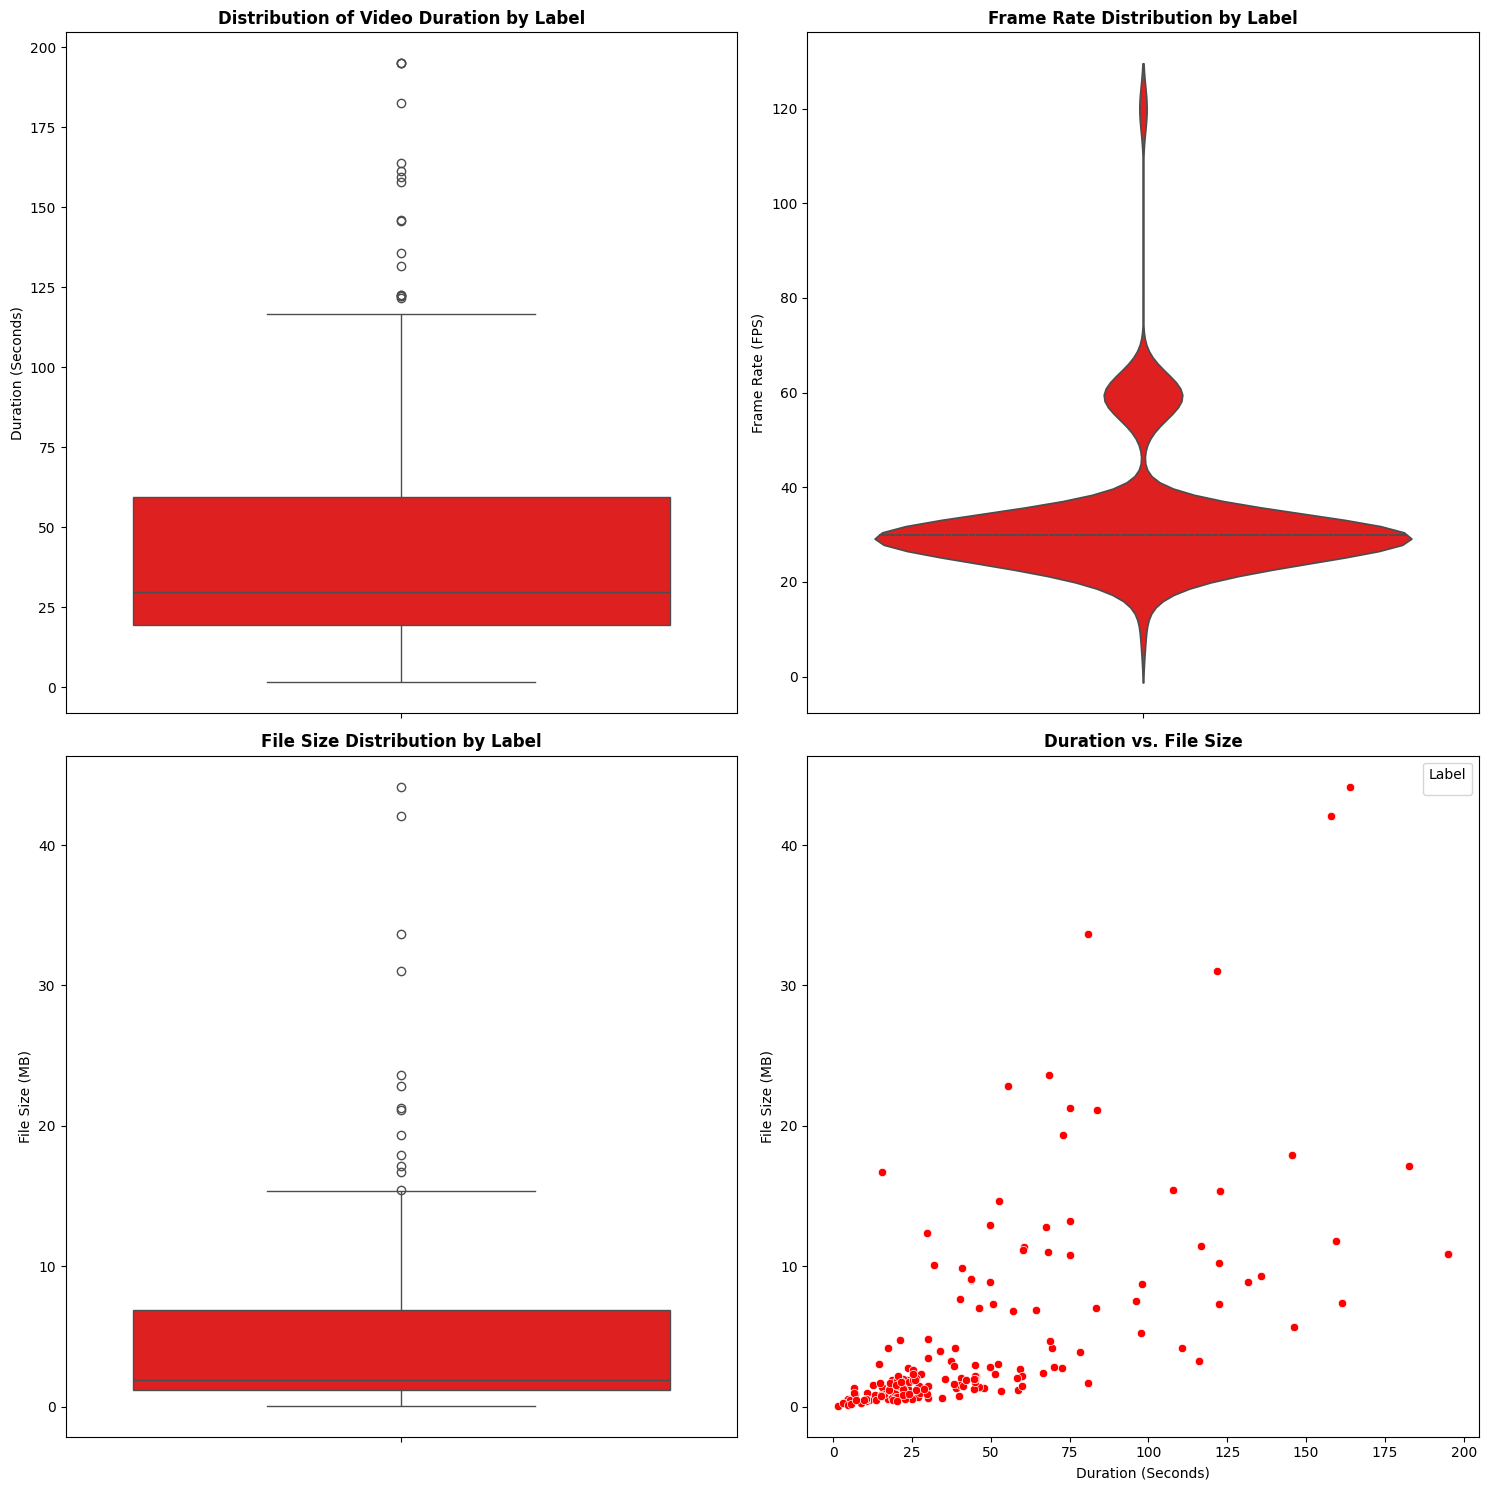

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# 1. Distribution of Video Durations
sns.boxplot(y="duration_SEC", data=df_new, ax=axes[0, 0], color='red')
axes[0, 0].set_title("Distribution of Video Duration by Label", fontweight='bold')
axes[0, 0].set_ylabel("Duration (Seconds)")

# 2. Frame Rate Distribution
sns.violinplot(y="frame_rate", data=df_new, ax=axes[0, 1], inner="quartile", color='red')
axes[0, 1].set_title("Frame Rate Distribution by Label", fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel("Frame Rate (FPS)", fontsize=10)

# 3. File Size Comparison
sns.boxplot(y="file_size_MB", data=df_new, ax=axes[1, 0], color='red')
axes[1, 0].set_title("File Size Distribution by Label", fontweight='bold')
axes[1, 0].set_ylabel("File Size (MB)")

# 4. Scatter Plot: Duration vs. File Size
sns.scatterplot(x="duration_SEC", y="file_size_MB", data=df_new, ax=axes[1, 1], color='red')
axes[1, 1].set_title("Duration vs. File Size", fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel("Duration (Seconds)", fontsize=10)
axes[1, 1].set_ylabel("File Size (MB)", fontsize=10)
axes[1, 1].legend(title="Label")

plt.tight_layout()
plt.show()